# Aitoff Projection of Spiders

In [5]:
import math as m
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord

data = pd.read_csv("D:\Black Widow Pulsars\Master's Thesis\GL & GB of spiders..csv")
dd1 = pd.DataFrame(data)
pd.set_option('display.max_rows', None)
dd1

Name Type Eclipsing  GL (deg)  GB (deg)  \
0   J0024-7204ad   RB       Yes   305.898   -44.902   
1    J0024-7204V   RB       Yes   305.895   -44.889   
2    J0024-7204W   RB       Yes   305.894   -44.890   
3    J1701-3006B   RB       Yes   353.574     7.319   
4    J1717+4308A   RB       Yes    68.336    34.861   
5    J1737-0314D   RB       Yes    21.324    14.805   
6    J1737-0314E   RB       Yes    21.324    14.805   
7    J1740−5340A   RB       Yes   338.165   -11.967   
8    J1740−5340B   RB       Yes   338.165   -11.967   
9    J1748-2021D   RB       Yes     7.734     3.809   
10   J1748-2446A   RB       Yes     3.836     1.696   
11  J1748-2446ad   RB       Yes     3.839     1.687   
12   J1748-2446P   RB       Yes     3.839     1.687   
13   J1823−3021F   RB       Yes     2.789    -7.914   
14   J1824-2452H   RB       Yes     7.798    -5.580   
15   J1824-2452I   RB       Yes     7.798    -5.579   
16   J2140-2310A   RB       Yes    27.179   -46.837   
17    J1227-4853   RB       Yes   298.965    13.796   
18    J1306-4035   RB       Yes   306.109    22.186   
19    J2129-0429   RB       Yes    48.912   -36.939   
20    J2215+5135   RB       Yes    99.868    -4.159   
21    J1431-4715   RB       Yes   320.051    12.253   
22    J1957+2516   RB       Yes    62.769    -1.973   
23    J1048+2339   RB       Yes   213.172    62.139   
24    J1417-4402   RB       Yes   318.861    16.144   
25    J1628-3205   RB       Yes   347.428    11.482   
26    J1908+2105   RB       Yes    53.692     5.775   
27    J1816+4510   RB       Yes    72.830    24.735   
28    J2039-5617   RB       Yes   341.265   -37.145   
29    J1023+0038   RB       Yes   243.490    45.782   
30    J1723-2837   RB       Yes   357.616     4.260   
31    J1803-6707   RB       Yes   346.800    -0.100   
32    J1622-0315   RB         *    10.708    30.676   
33    J2339-0533   RB         *    81.349   -62.476   
34    J2333-5527   RB       NaN       NaN       NaN   
35           NaN  NaN       NaN       NaN       NaN   
36   J0024-7204P   BW        No   305.872   -44.904   
37   J1748-2021H   BW        No     5.700    -0.300   
38   J1807-2459A   BW        No     5.837    -2.203   
39   J1911+0102A   BW        No    45.200    -0.100   
40   J1824-2452M   BW       Yes   358.788   -10.092   
41   J1824-2452N   BW       Yes     6.905    -6.041   
42   J1853-0842A   BW       Yes    25.352    -4.318   
43   J1953+1846A   BW       Yes    56.746    -4.564   
44   J0024-7204O   BW       Yes   305.897   -44.889   
45   J0024-7204R   BW       Yes   305.892   -44.890   
46   J1701-3006E   BW       Yes   353.576     7.317   
47   J1518+0204C   BW       Yes     3.856    46.797   
48   J1641+3627E   BW       Yes    59.008    40.910   
49   J1748-2446O   BW       Yes     3.839     1.687   
50  J0024-7204ac   BW       Yes   305.898   -44.902   
51   J1326-4728B   BW       Yes   309.107    14.957   
52   J1701-3006F   BW       Yes   353.573     7.318   
53   J1836-2354A   BW       Yes     9.886    -7.561   
54   J1737-0314A   BW       Yes    21.326    14.807   
55   J0023-7203J   BW       Yes   302.000    -3.900   
56   J1953+1846E   BW         *    56.746    -4.564   
57   J0024-7204I   BW         *   305.892   -44.893   
58  J1748-2446ae   BW         *     3.839     1.687   
59   J1824-2452G   BW         *     7.798    -5.580   
60   J1824-2452J   BW         *     7.798    -5.580   
61   J1824-2452L   BW         *     7.798    -5.580   
62   J1342+2822A   BW         *    42.219    78.747   
63    J0610-2100   BW        No   227.747   -18.184   
64    J0952�0607   BW        No   243.652    35.380   
65    J1446-4701   BW        No   322.500    11.425   
66    J1311-3430   BW        No   307.681    28.176   
67    J0023+0923   BW        No   111.383   -52.849   
68    J1928+1245   BW        No    48.534    -2.290   
69    J1745+1017   BW        No    34.869    19.254   
70    J2214+3000   BW        No    86.855   -21.665   
71    J2234+0944   BW        No    76.280   -40.438 

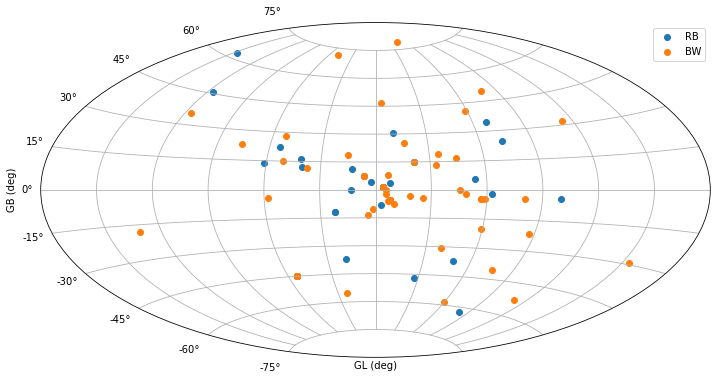

In [2]:
# GB and GL for all spiders

x1 = np.array(data.iloc[0:34,3])  # 34 RB
y1 = np.array(data.iloc[0:34,4])
x2 = np.array(data.iloc[36:90,3]) # 54 BW
y2 = np.array(data.iloc[36:90,4])


eq1 = SkyCoord(x1[:], y1[:], unit=u.deg)
gal1 = SkyCoord(x1[:], y1[:], frame='galactic', unit=u.deg)
eq2 = SkyCoord(x2[:], y2[:], unit=u.deg)
gal2 = SkyCoord(x2[:], y2[:], frame='galactic', unit=u.deg)

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection="aitoff")
plt.scatter(gal1.l.wrap_at('180d').radian, gal1.b.radian, label='RB')
plt.scatter(gal2.l.wrap_at('180d').radian, gal2.b.radian, label='BW')
ax.set_xticklabels([])
ax.grid(True)
plt.xlabel('GL (deg)')
plt.ylabel('GB (deg)')
plt.legend()

plt.show()

###### The above scatter plot is of spiders were the blue circles are redbacks (RB) and the orange circles are black widows (BW) pulsars. There are total 34 RB (the blue circles)and 54 BW (orange circles) here. Total 83 spiders.

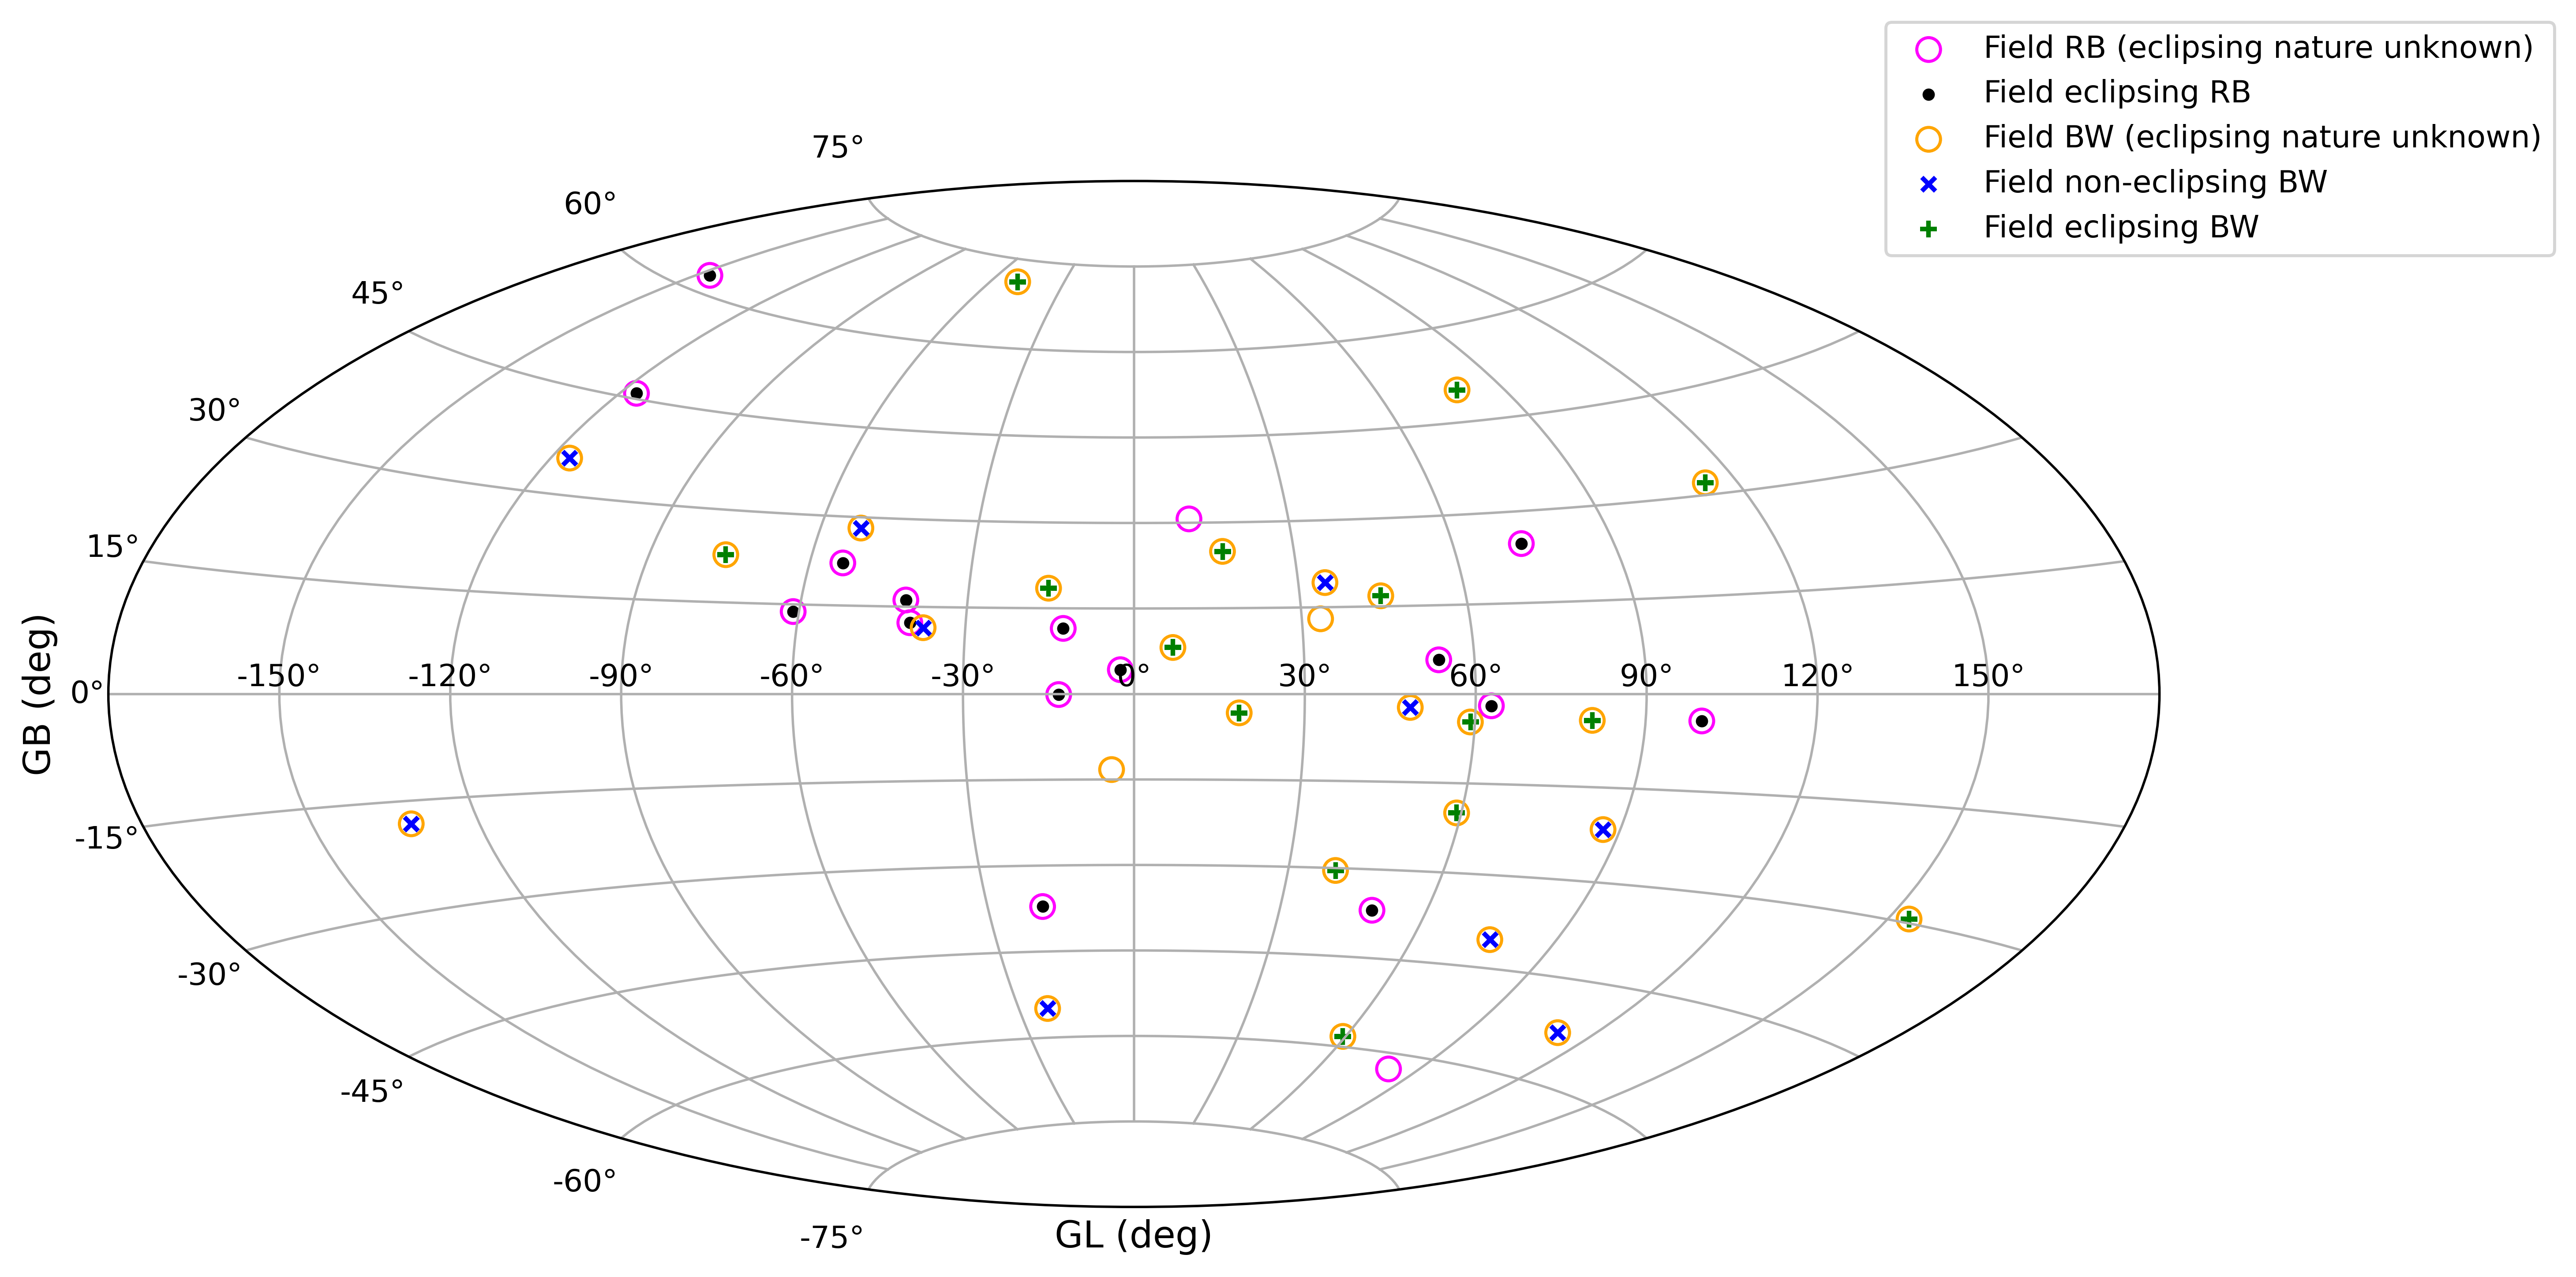

In [7]:
# GB and GL for non Gc spiders

x1 = np.array(data.iloc[17:34,3]) # 17 non GC RB
y1 = np.array(data.iloc[17:34,4])

x2 = np.array(data.iloc[17:32,3]) # 15 non GC eclipsing RB
y2 = np.array(data.iloc[17:32,4])

x3 = np.array(data.iloc[63:73,3]) # 10 non GC non-eclipsing BW
y3 = np.array(data.iloc[63:73,4])

x4 = np.array(data.iloc[63:90,3]) # 27 non GC BW
y4 = np.array(data.iloc[63:90,4])

x5 = np.array(data.iloc[73:88,3]) # 15 non GC eclipsing BW
y5 = np.array(data.iloc[73:88,4])

eq1  = SkyCoord(x1[:], y1[:], unit=u.deg)
gal1 = SkyCoord(x1[:], y1[:], frame='galactic', unit=u.deg)

eq2  = SkyCoord(x2[:], y2[:], unit=u.deg)
gal2 = SkyCoord(x2[:], y2[:], frame='galactic', unit=u.deg)

eq3  = SkyCoord(x3[:], y3[:], unit=u.deg)
gal3 = SkyCoord(x3[:], y3[:], frame='galactic', unit=u.deg)

eq4  = SkyCoord(x4[:], y4[:], unit=u.deg)
gal4 = SkyCoord(x4[:], y4[:], frame='galactic', unit=u.deg)

eq5  = SkyCoord(x5[:], y5[:], unit=u.deg)
gal5 = SkyCoord(x5[:], y5[:], frame='galactic', unit=u.deg)

fig = plt.figure(figsize=(12,7), dpi = 500)
ax = fig.add_subplot(111, projection="aitoff")
plt.scatter(gal1.l.wrap_at('180d').radian, gal1.b.radian, facecolors='none', edgecolors='magenta', s=60, label= 'Field RB (eclipsing nature unknown)')
plt.scatter(gal2.l.wrap_at('180d').radian, gal2.b.radian, marker= '.', color= 'black', label= 'Field eclipsing RB')
plt.scatter(gal4.l.wrap_at('180d').radian, gal4.b.radian, facecolors='none', edgecolors='orange', s=60, label= 'Field BW (eclipsing nature unknown)')
plt.scatter(gal3.l.wrap_at('180d').radian, gal3.b.radian, marker= 'x', edgecolors='none', color='blue', label= 'Field non-eclipsing BW',s=20)
plt.scatter(gal5.l.wrap_at('180d').radian, gal5.b.radian, marker= '+', edgecolors='none', color='green', label= 'Field eclipsing BW',s=30)
# ax.set_xticklabels([])
ax.grid(True)
plt.xlabel('GL (deg)', fontsize = 12)
plt.ylabel('GB (deg)', fontsize = 12)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.17))

plt.show()

###### The above scatter plot is of non-GC spiders. Here there are total 42 non-GC spiders, from which 16 are RB(all magenta unfilled symbol), 14 eclipsing RB(magenta unfilled with black dots inside). 25 BW(all orange unfilled circles), from which 9 are eclipsing BW(orange unfilled circles with green '+' inside), 6 are non-eclipsing BW(orange unfilled circles with blue 'x' inside).

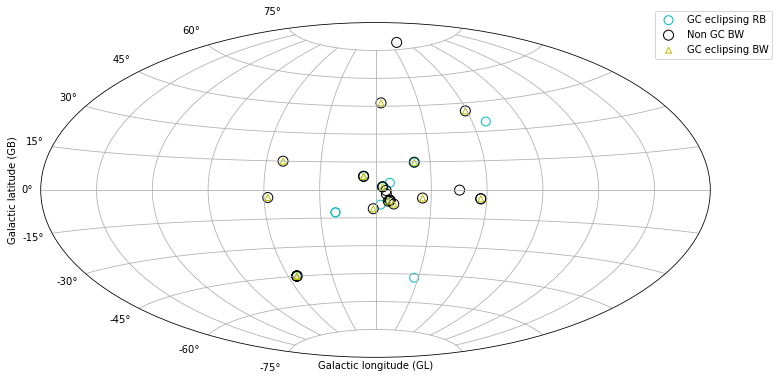

In [7]:
# GB and GL for spiders in GCs

x1 = np.array(data.iloc[0:17,3])  # 17 RB in GCs and all are eclipsing
y1 = np.array(data.iloc[0:17,4])

x2 = np.array(data.iloc[36:63,3]) # 30 BW in GCs
y2 = np.array(data.iloc[36:63,4])

x3 = np.array(data.iloc[40:56,3]) # 16 eclipsing BW in GCs
y3 = np.array(data.iloc[40:56,4])

eq1  = SkyCoord(x1[:], y1[:], unit=u.deg)
gal1 = SkyCoord(x1[:], y1[:], frame='galactic', unit=u.deg)

eq2  = SkyCoord(x2[:], y2[:], unit=u.deg)
gal2 = SkyCoord(x2[:], y2[:], frame='galactic', unit=u.deg)

eq3  = SkyCoord(x3[:], y3[:], unit=u.deg)
gal3 = SkyCoord(x3[:], y3[:], frame='galactic', unit=u.deg)

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection="aitoff")
plt.scatter(gal1.l.wrap_at('180d').radian, gal1.b.radian, facecolors='none', edgecolors= 'c', s=80, label= 'GC eclipsing RB')
plt.scatter(gal2.l.wrap_at('180d').radian, gal2.b.radian, facecolors='none', edgecolors= 'k', s=100, label= 'Non GC BW')
plt.scatter(gal3.l.wrap_at('180d').radian, gal3.b.radian, marker= '^', facecolors='none', edgecolors= 'y', label= 'GC eclipsing BW')
ax.set_xticklabels([])
ax.grid(True)
plt.xlabel('Galactic longitude (GL)')
plt.ylabel('Galactic latitude (GB)')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))

plt.show()

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dd1 = pd.read_csv("D:\\Black Widow Pulsars\\Master's Thesis\\Updated GL & GB of spiders.csv")
dd1

Name  GL (deg)  GB (deg)  Assoc
0   J0024-7204ad   305.898   -44.902     GC
1    J0024-7204V   305.895   -44.889     GC
2    J0024-7204W   305.894   -44.890     GC
3    J1701-3006B   353.574     7.319     GC
4    J1717+4308A    68.336    34.861     GC
5    J1737-0314D    21.324    14.805     GC
6    J1737-0314E    21.324    14.805     GC
7    J1740−5340A   338.165   -11.967     GC
8    J1740−5340B   338.165   -11.967     GC
9    J1748-2021D     7.734     3.809     GC
10   J1748-2446A     3.836     1.696     GC
11  J1748-2446ad     3.839     1.687     GC
12   J1748-2446P     3.839     1.687     GC
13   J1823−3021F     2.789    -7.914     GC
14   J1824-2452H     7.798    -5.580     GC
15   J1824-2452I     7.798    -5.579     GC
16   J2140-2310A    27.179   -46.837     GC
17   J0024-7204P   305.872   -44.904     GC
18   J1748-2021H     5.700    -0.300     GC
19   J1807-2459A     5.837    -2.203     GC
20   J1911+0102A    45.200    -0.100     GC
21   J1824-2452M   358.788   -10.092     GC
22   J1824-2452N     6.905    -6.041     GC
23   J1853-0842A    25.352    -4.318     GC
24   J1953+1846A    56.746    -4.564     GC
25   J0024-7204O   305.897   -44.889     GC
26   J0024-7204R   305.892   -44.890     GC
27   J1701-3006E   353.576     7.317     GC
28   J1518+0204C     3.856    46.797     GC
29   J1641+3627E    59.008    40.910     GC
30   J1748-2446O     3.839     1.687     GC
31  J0024-7204ac   305.898   -44.902     GC
32   J1326-4728B   309.107    14.957     GC
33   J1701-3006F   353.573     7.318     GC
34   J1836-2354A     9.886    -7.561     GC
35   J1737-0314A    21.326    14.807     GC
36   J0023-7203J   302.000    -3.900     GC
37   J1953+1846E    56.746    -4.564     GC
38   J0024-7204I   305.892   -44.893     GC
39  J1748-2446ae     3.839     1.687     GC
40   J1824-2452G     7.798    -5.580     GC
41   J1824-2452J     7.798    -5.580     GC
42   J1824-2452L     7.798    -5.580     GC
43   J1342+2822A    42.219    78.747     GC
44    J1227-4853   298.965    13.796  Field
45    J1306-4035   306.109    22.186  Field
46    J2129-0429    48.912   -36.939  Field
47    J2215+5135    99.868    -4.159  Field
48    J1431-4715   320.051    12.253  Field
49    J1957+2516    62.769    -1.973  Field
50    J1048+2339   213.172    62.139  Field
51    J1417-4402   318.861    16.144  Field
52    J1628-3205   347.428    11.482  Field
53    J1908+2105    53.692     5.775  Field
54    J1816+4510    72.830    24.735  Field
55    J2039-5617   341.265   -37.145  Field
56    J1023+0038   243.490    45.782  Field
57    J1723-2837   357.616     4.260  Field
58    J1803-6707   346.800    -0.100  Field
59    J1622-0315    10.708    30.676  Field
60    J2339-0533    81.349   -62.476  Field
61    J2333-5527   336.400   -18.400  Field
62    J0610-2100   227.747   -18.184  Field
63    J0952�0607   243.652    35.380  Field
64    J1446-4701   322.500    11.425  Field
65    J1311-3430   307.681    28.176  Field
66    J0023+0923   111.383   -52.849  Field
67    J1928+1245    48.534    -2.290  Field
68    J1745+1017    34.869    19.254  Field
69    J2214+3000    86.855   -21.665  Field
70    J2234+0944    76.280   -40.438  Field
71    J2241-5236   337.457   -54.927  Field
72    J1653-0158    16.615    24.935  Field
73    J1959+2048    59.197    -4.697  Field
74    J1555-2908   344.477    18.503  Field
75    J1720-0533    18.503    -3.300  Field
76    J2051-0827    39.192   -30.411  Field
77    J2256-1024    59.231   -58.293  Field
78    J1810+1744    44.642    16.806  Field
79    J1124-3653   284.094    22.765  Field
80    J1544+4937    79.172    50.166  Field
81    J1731-1847     6.890     8.151  Field
82    J0251+2606   153.881   -29.486  Field
83    J1301+0833   310.811    71.282  Field
84    J1641+8049   113.840    31.763  Field
85    J2052+1219    59.145   -19.986  Field
86    J2055+3829    80.615    -4.259  Field
87    J1805+0615    33.351    13.005  Field
88    J1833-3840   356.011   -13.260  Field

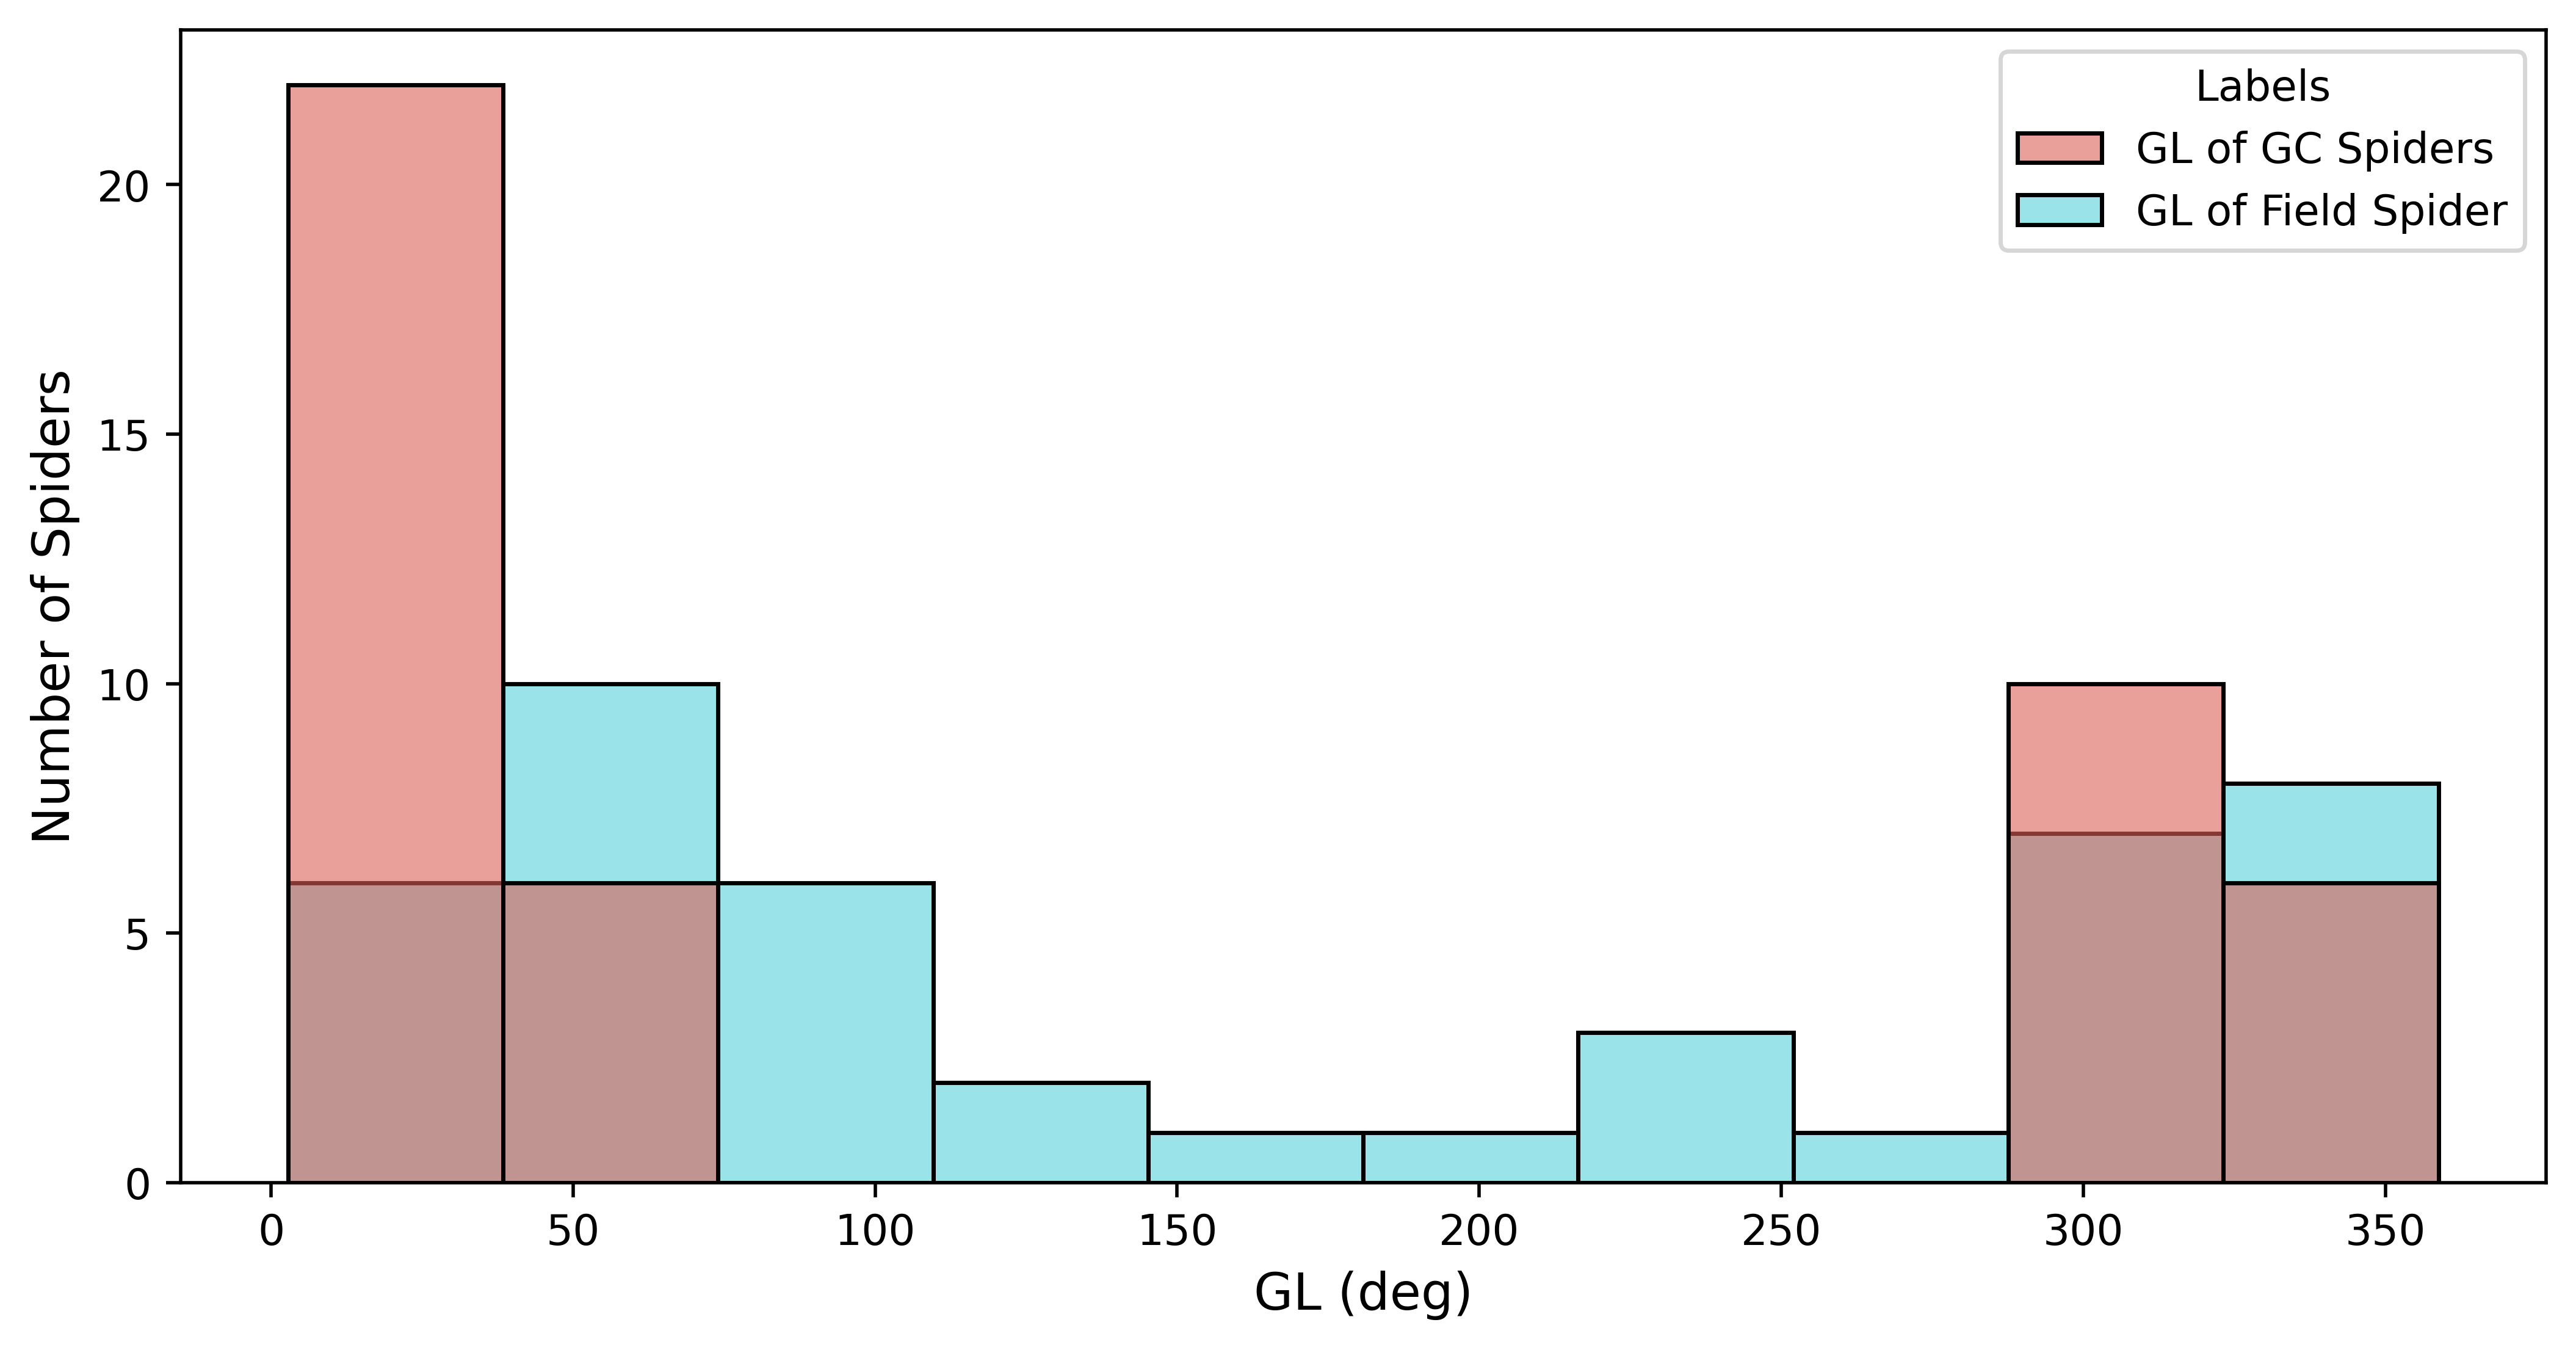

In [199]:
x1 = np.array(dd1.iloc[0:44,1]) # 44 GC 
x2 = np.array(dd1.iloc[44:89,1]) # 45 Field

data = np.concatenate([x1, x2])
labels = ['GL of GC Spiders'] * len(x1) + ['GL of Field Spider'] * len(x2) 


data_df = pd.DataFrame({'Values': data, 'Labels': labels})

plt.figure(figsize=(10,5), dpi=500)
sns.histplot(data=data_df, x='Values', hue='Labels', palette='hls', bins=10, edgecolor='black', alpha=0.6)
plt.xlabel('GL (deg)', fontsize = 12)
plt.ylabel('Number of Spiders', fontsize = 12)
plt.show()

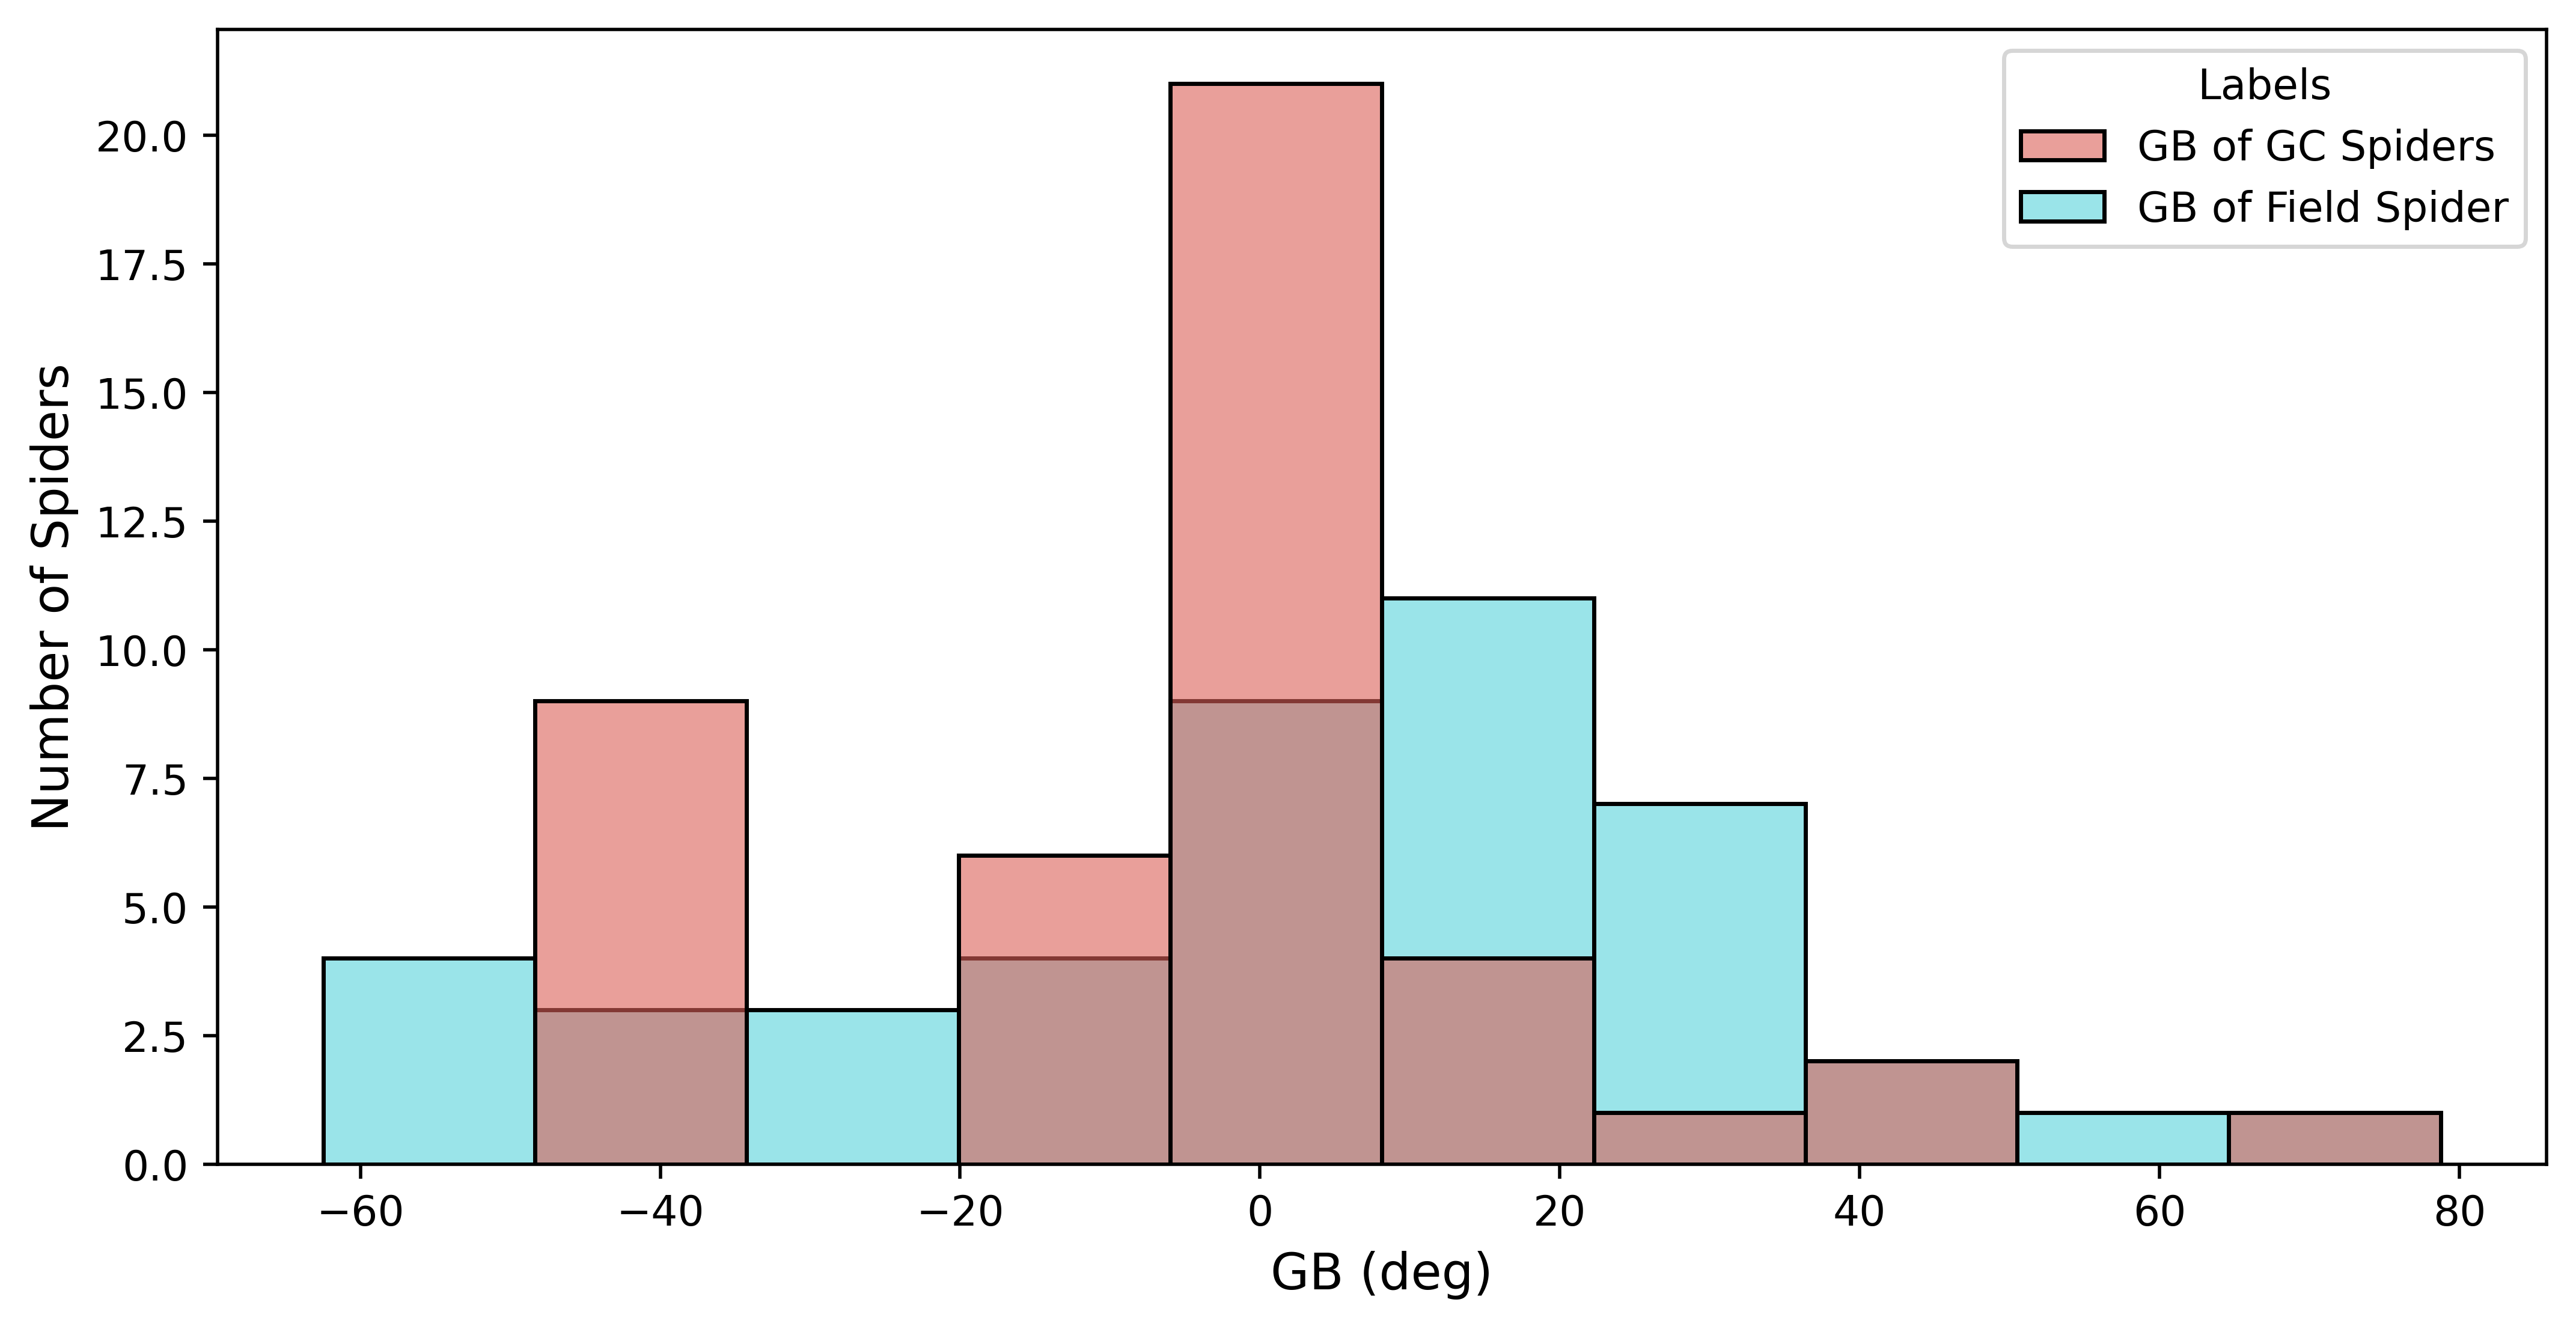

In [200]:
y1 = np.array(dd1.iloc[0:44,2]) # 44 GC 
y2 = np.array(dd1.iloc[44:89,2]) # 45 Field

data = np.concatenate([y1, y2])
labels = ['GB of GC Spiders'] * len(y1) + ['GB of Field Spider'] * len(y2) 


data_df = pd.DataFrame({'Values': data, 'Labels': labels})

plt.figure(figsize=(10,5), dpi=500)
sns.histplot(data=data_df, x='Values', hue='Labels', bins=10, edgecolor='black', alpha=0.6, palette='hls')
plt.xlabel('GB (deg)', fontsize = 12)
plt.ylabel('Number of Spiders', fontsize = 12)
plt.show()

###### The above scatter plot is of spiders in GCs. Here, there are total 41 spiders, from which 17 are eclipsing RB(all unfilled cyan circles) and 24 are BW(all unfilled black circles), from which 12 are eclipsing BW(black unfilled circles with yellow triangles inside).

# DM and Distance of Field Spiders

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord


In [3]:
# Formula to calculate angular distance(i.e. seperation in arcmin) between spider and its closest PSR.

c1 = SkyCoord('11h24m01s', '-36d53m19s', frame='icrs')
c2 = SkyCoord('11h20m23s', '-36d19m40s', frame='icrs')
sep = c1.separation(c2)
sep.arcminute

55.19270165778037

In the below table 'Final DM' is substraction of DM of spider and its closest PSR. 

In the below table 'Final Distance' is seperation between spider and its closest PSR.

In [5]:
data = pd.read_csv("D:\Black Widow Pulsars\Master's Thesis\DM Work for Non-GC Spiders.csv")
dd1 = pd.DataFrame(data)
pd.set_option('display.max_rows', None)
dd1

Name  Type Closest PSR  Final DM  Final Distance 
0   J1023+0038   eRB  J1038+0032     12.02       219.818749
1   J1048+2339   eRB  J1017+3011     10.50       571.269246
2   J1227-4853   eRB  J1232-4742     17.42        83.012567
3   J1306-4035   eRB  J1240-4124      9.10       305.450195
4   J1417-4402   eRB  J1421-4409      0.36        41.744840
5   J1431-4715   eRB  J1446-4701      3.52       152.146162
6   J1628-3205   eRB  J1619-3345     47.60       151.387104
7   J1723-2837   eRB  J1723-2852    152.31        16.758641
8   J1816+4510   eRB  J1821+4147      1.78       211.431871
9   J1908+2105   eRB  J1912+2104     26.69        52.721050
10  J1957+2516   eRB  J1955+2527    165.82        24.328088
11  J2039-5617   eRB  J2129-5721      7.28       413.201222
12  J2129-0429   eRB  J2133-0049     26.72       226.584822
13  J2215+5135   eRB    J2213+53     91.80        87.576041
14  J1622-0315    RB  J1625-0021      4.90       177.136639
15  J2339-0533    RB  J2346-0609     13.78       113.365760
16    J1803-67    RB         NaN       NaN              NaN
17  J2333-5527    RB         NaN       NaN              NaN
18  J1805+0615    BW  J1810+0705     14.54        90.912056
19  J1833-3840    BW    J1842-39     31.00       105.935936
20  J0023+0923  neBW    J0011+08     10.58       188.558637
21  J2214+3000  neBW  J2212+2933     51.98        40.367480
22  J2234+0944  neBW  J2234+0611      7.06       213.109496
23  J2241-5236  neBW  J2236-5527      8.68       176.423841
24  J0610-2100  neBW  J0633-2015     30.03       324.868301
25  J0952–0607  neBW    J0957-06      4.54        73.206925
26  J1311-3430  neBW  J1320-3512     21.42       112.139505
27  J1446-4701  neBW    J1456-48     77.17       111.787116
28  J1745+1017  neBW  J1740+1000      0.07        77.850043
29  J1928+1245  neBW  J1930+1316     28.07        35.504506
30  J0251+2606   eBW  J0302+2252      1.23       249.365835
31  J1124-3653   eBW  J1120-3618      0.22        55.192702
32  J1301+0833   eBW    J1304+12     13.20       212.610199
33  J1544+4937   eBW  J1552+5437      0.33       309.956034
34  J1555-2908   eBW  J1555-3134      2.86       145.951002
35  J1641+8049   eBW  J1713+7810      5.89       181.499635
36  J1731-1847   eBW  J1732-1930     34.04        45.046187
37  J1810+1744   eBW    J1809+17      7.62        46.058279
38  J1959+2048   eBW    J2007+20     37.89       107.204774
39  J2051-0827   eBW  J2046-0421     15.07       257.811880
40  J2052+1219   eBW  J2051+1248      1.49        34.166936
41  J2055+3829   eBW    J2102+38      5.53        85.737976
42  J2256-1024   eBW  J2310-0555      1.73       332.477104
43  J1653-0158   eBW  J1657-0406     43.60              NaN
44  J1720-0533   eBW         NaN       NaN              NaN

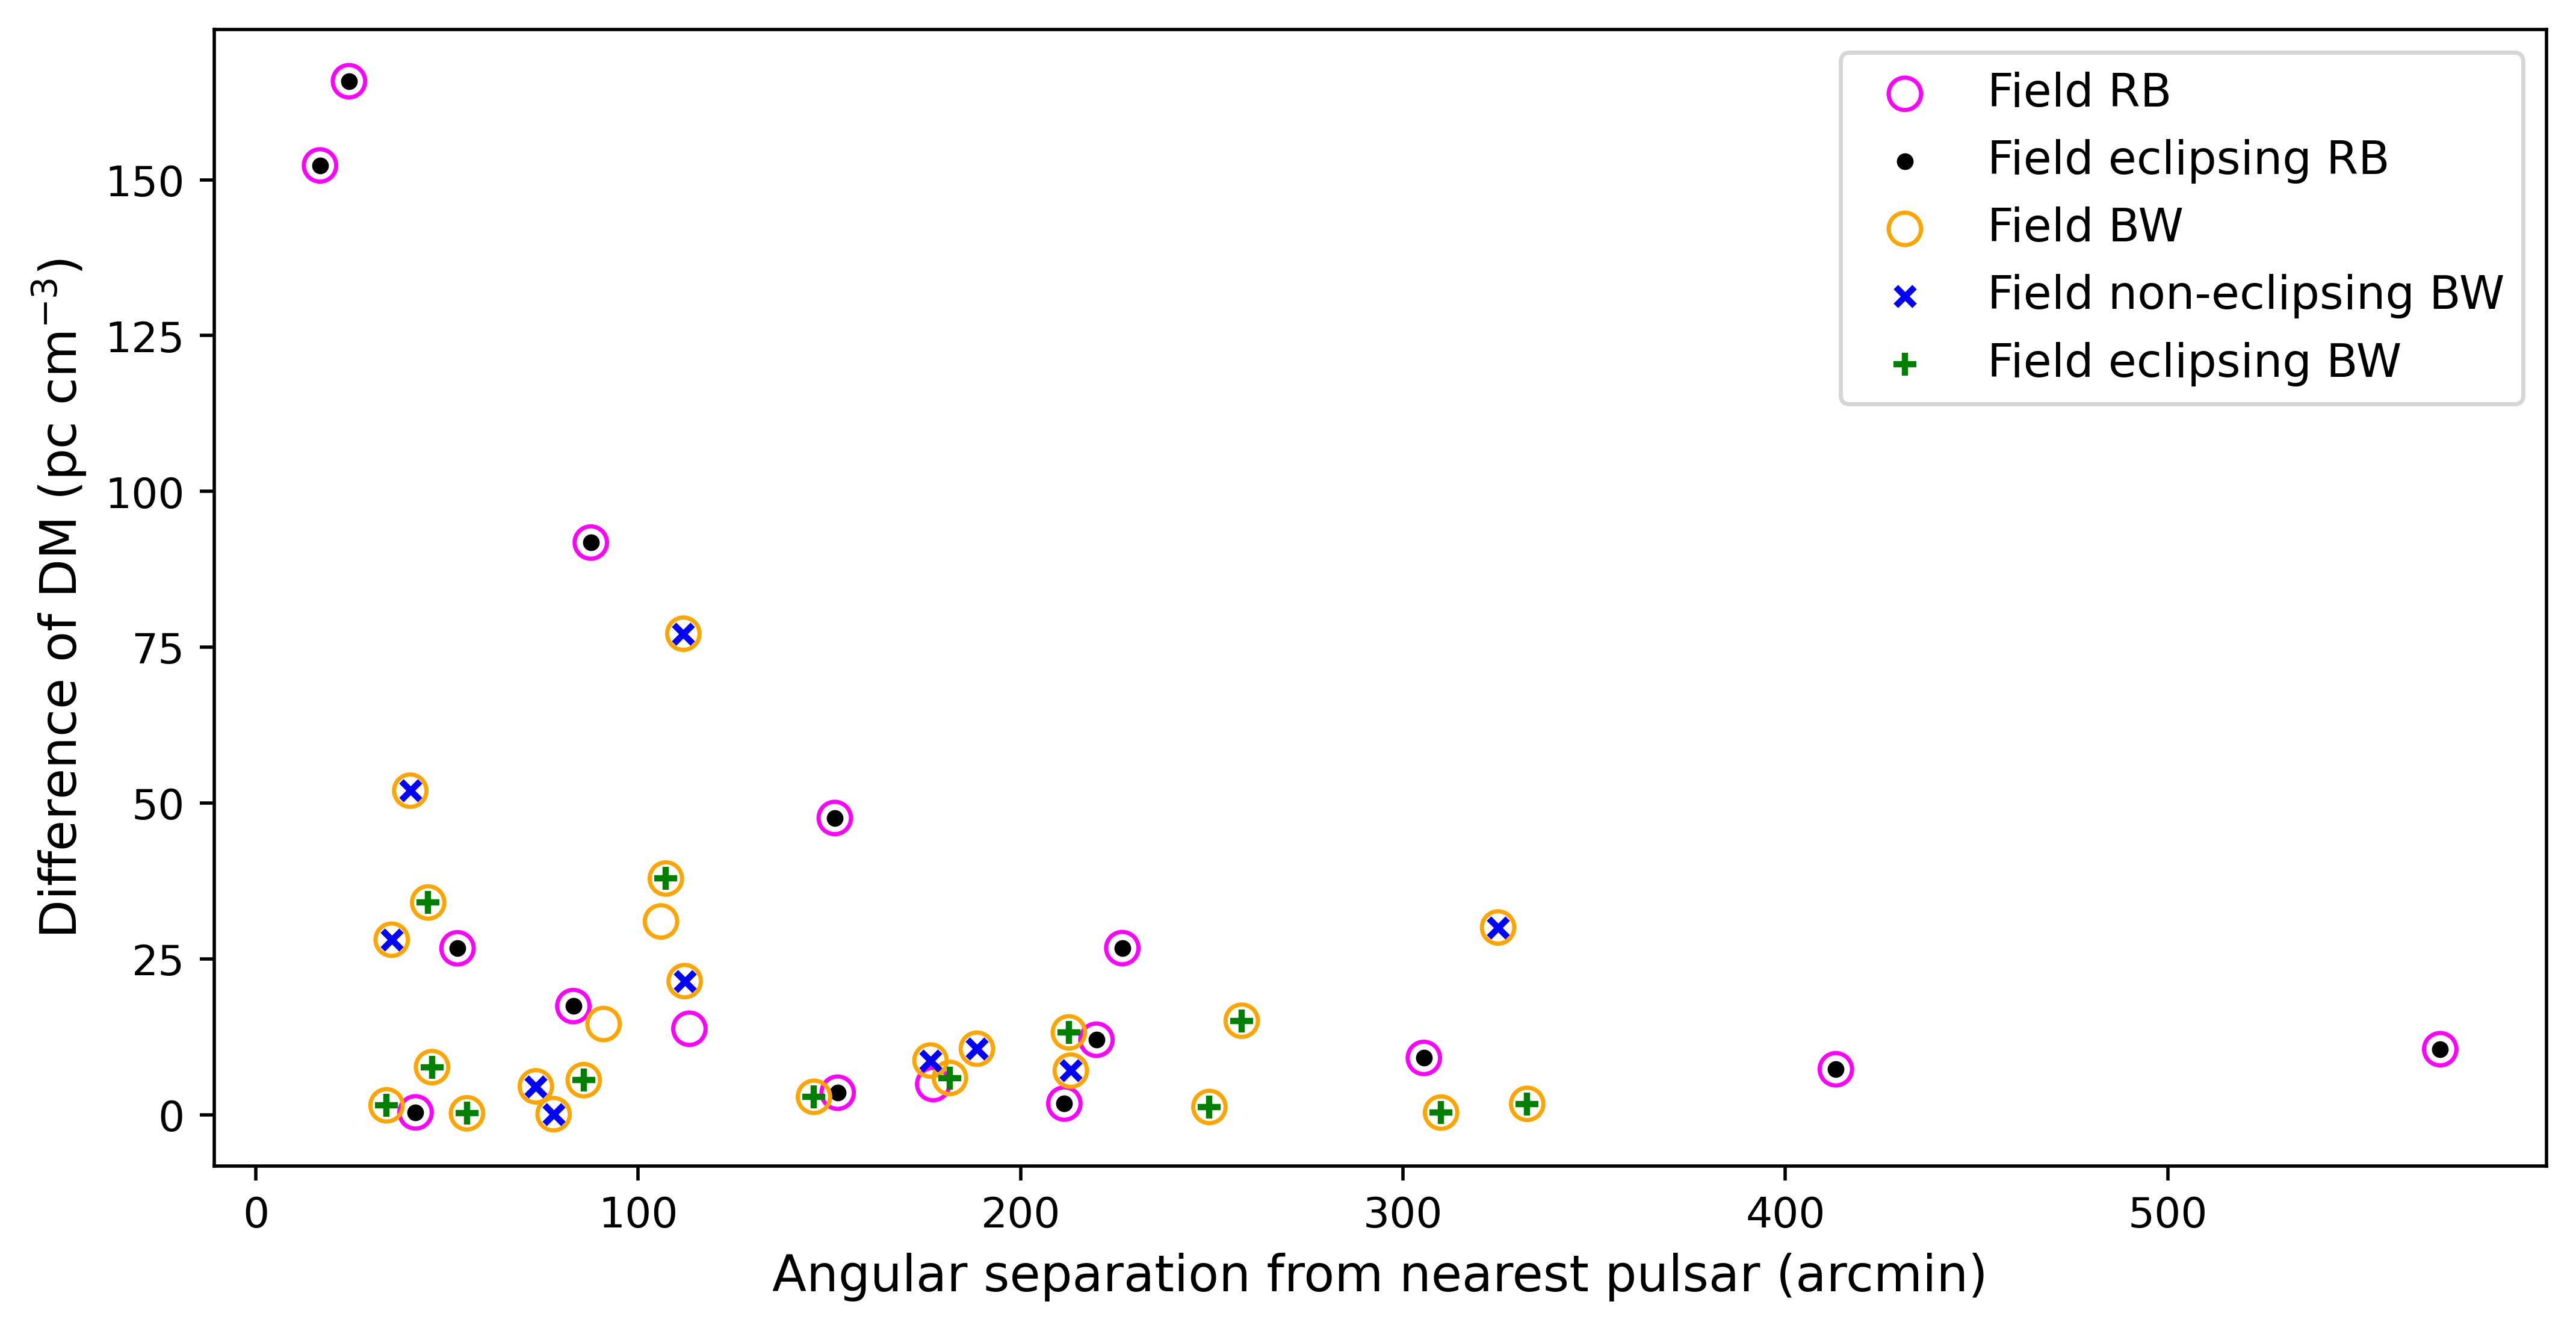

In [6]:
x1 = np.array(data.iloc[0:16,4]) # 16 non GC RB
y1 = np.array(data.iloc[0:16,3])

x2 = np.array(data.iloc[0:14,4]) # 14 non GC eclipsing RB
y2 = np.array(data.iloc[0:14,3])

x3 = np.array(data.iloc[18:44,4]) # 25 non GC BW
y3 = np.array(data.iloc[18:44,3])

x4 = np.array(data.iloc[20:30,4]) # 6 non GC non-eclipsing BW
y4 = np.array(data.iloc[20:30,3])

x5 = np.array(data.iloc[30:44,4]) # 9 non GC eclipsing BW
y5 = np.array(data.iloc[30:44,3])

fig = plt.figure(figsize=(10,5), dpi=500)

plt.scatter(x1,y1, facecolors='none', edgecolors='magenta', s=60, label= 'Field RB (eclipsing nature unknown)')
plt.scatter(x2,y2, marker= '.', color= 'black', label= 'Field eclipsing RB')
plt.scatter(x3,y3, facecolors='none', edgecolors='orange', s=60, label= 'Field BW (eclipsing nature unknown)')
plt.scatter(x4,y4, marker= 'x', edgecolors='none', color='blue', label= 'Field non-eclipsing BW',s=20)
plt.scatter(x5,y5, marker= '+', edgecolors='none', color='green', label= 'Field eclipsing BW',s=30)


# plt.title('Angular separation and Dispersion measure of non-GC spiders')
plt.xlabel('Angular separation from nearest pulsar (arcmin)', fontsize = 12)  # Distance between spider and its closest PSR.
plt.ylabel('Difference of DM (pc cm$^{-3}$)', fontsize = 12)  # DM of spider and it's closest PSR.
plt.legend([ 'Field RB', 'Field eclipsing RB', 'Field BW', 'Field non-eclipsing BW', 'Field eclipsing BW'], fontsize = 11)
plt.show()

## S1400 of Field Spiders

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("D:\Black Widow Pulsars\Master's Thesis\S1400 of Spiders.csv")
df1 = pd.DataFrame(df)
df1

Name  Type  S1400 (mJy)
0   J1048+2339   eRB      0.17000
1   J1227-4853   eRB      1.58980
2   J1306-4035   eRB      2.10000
3   J1431-4715   eRB      0.67000
4   J1723-2837   eRB      1.10000
5   J1816+4510   eRB      0.18280
6   J1908+2105   eRB      0.04510
7   J1957+2516   eRB      0.02000
8   J2039-5617   eRB      0.58000
9   J2129-0429   eRB      0.06090
10  J2215+5135   eRB      0.60940
11  J0251+2606   eBW      0.02250
12  J1124-3653   eBW      0.03657
13  J1544+4937   eBW      0.65820
14  J1555-2908   eBW      0.20000
15  J1641+8049   eBW      0.15580
16  J1731-1847   eBW      0.38000
17  J1810+1744   eBW      2.43780
18  J1959+2048   eBW      0.29000
19  J2051-0827   eBW      2.80000
20  J2256-1024   eBW      0.73000
21  J0023+0923  neBW      0.73000
22  J0610-2100  neBW      0.65000
23  J1311-3430  neBW      0.10920
24  J1446-4701  neBW      0.46000
25  J1745+1017  neBW      0.51000
26  J1928+1245  neBW      0.08000
27  J2214+3000  neBW      0.53000
28  J2234+0944  neBW      1.90000
29  J2241-5236  neBW      1.83000

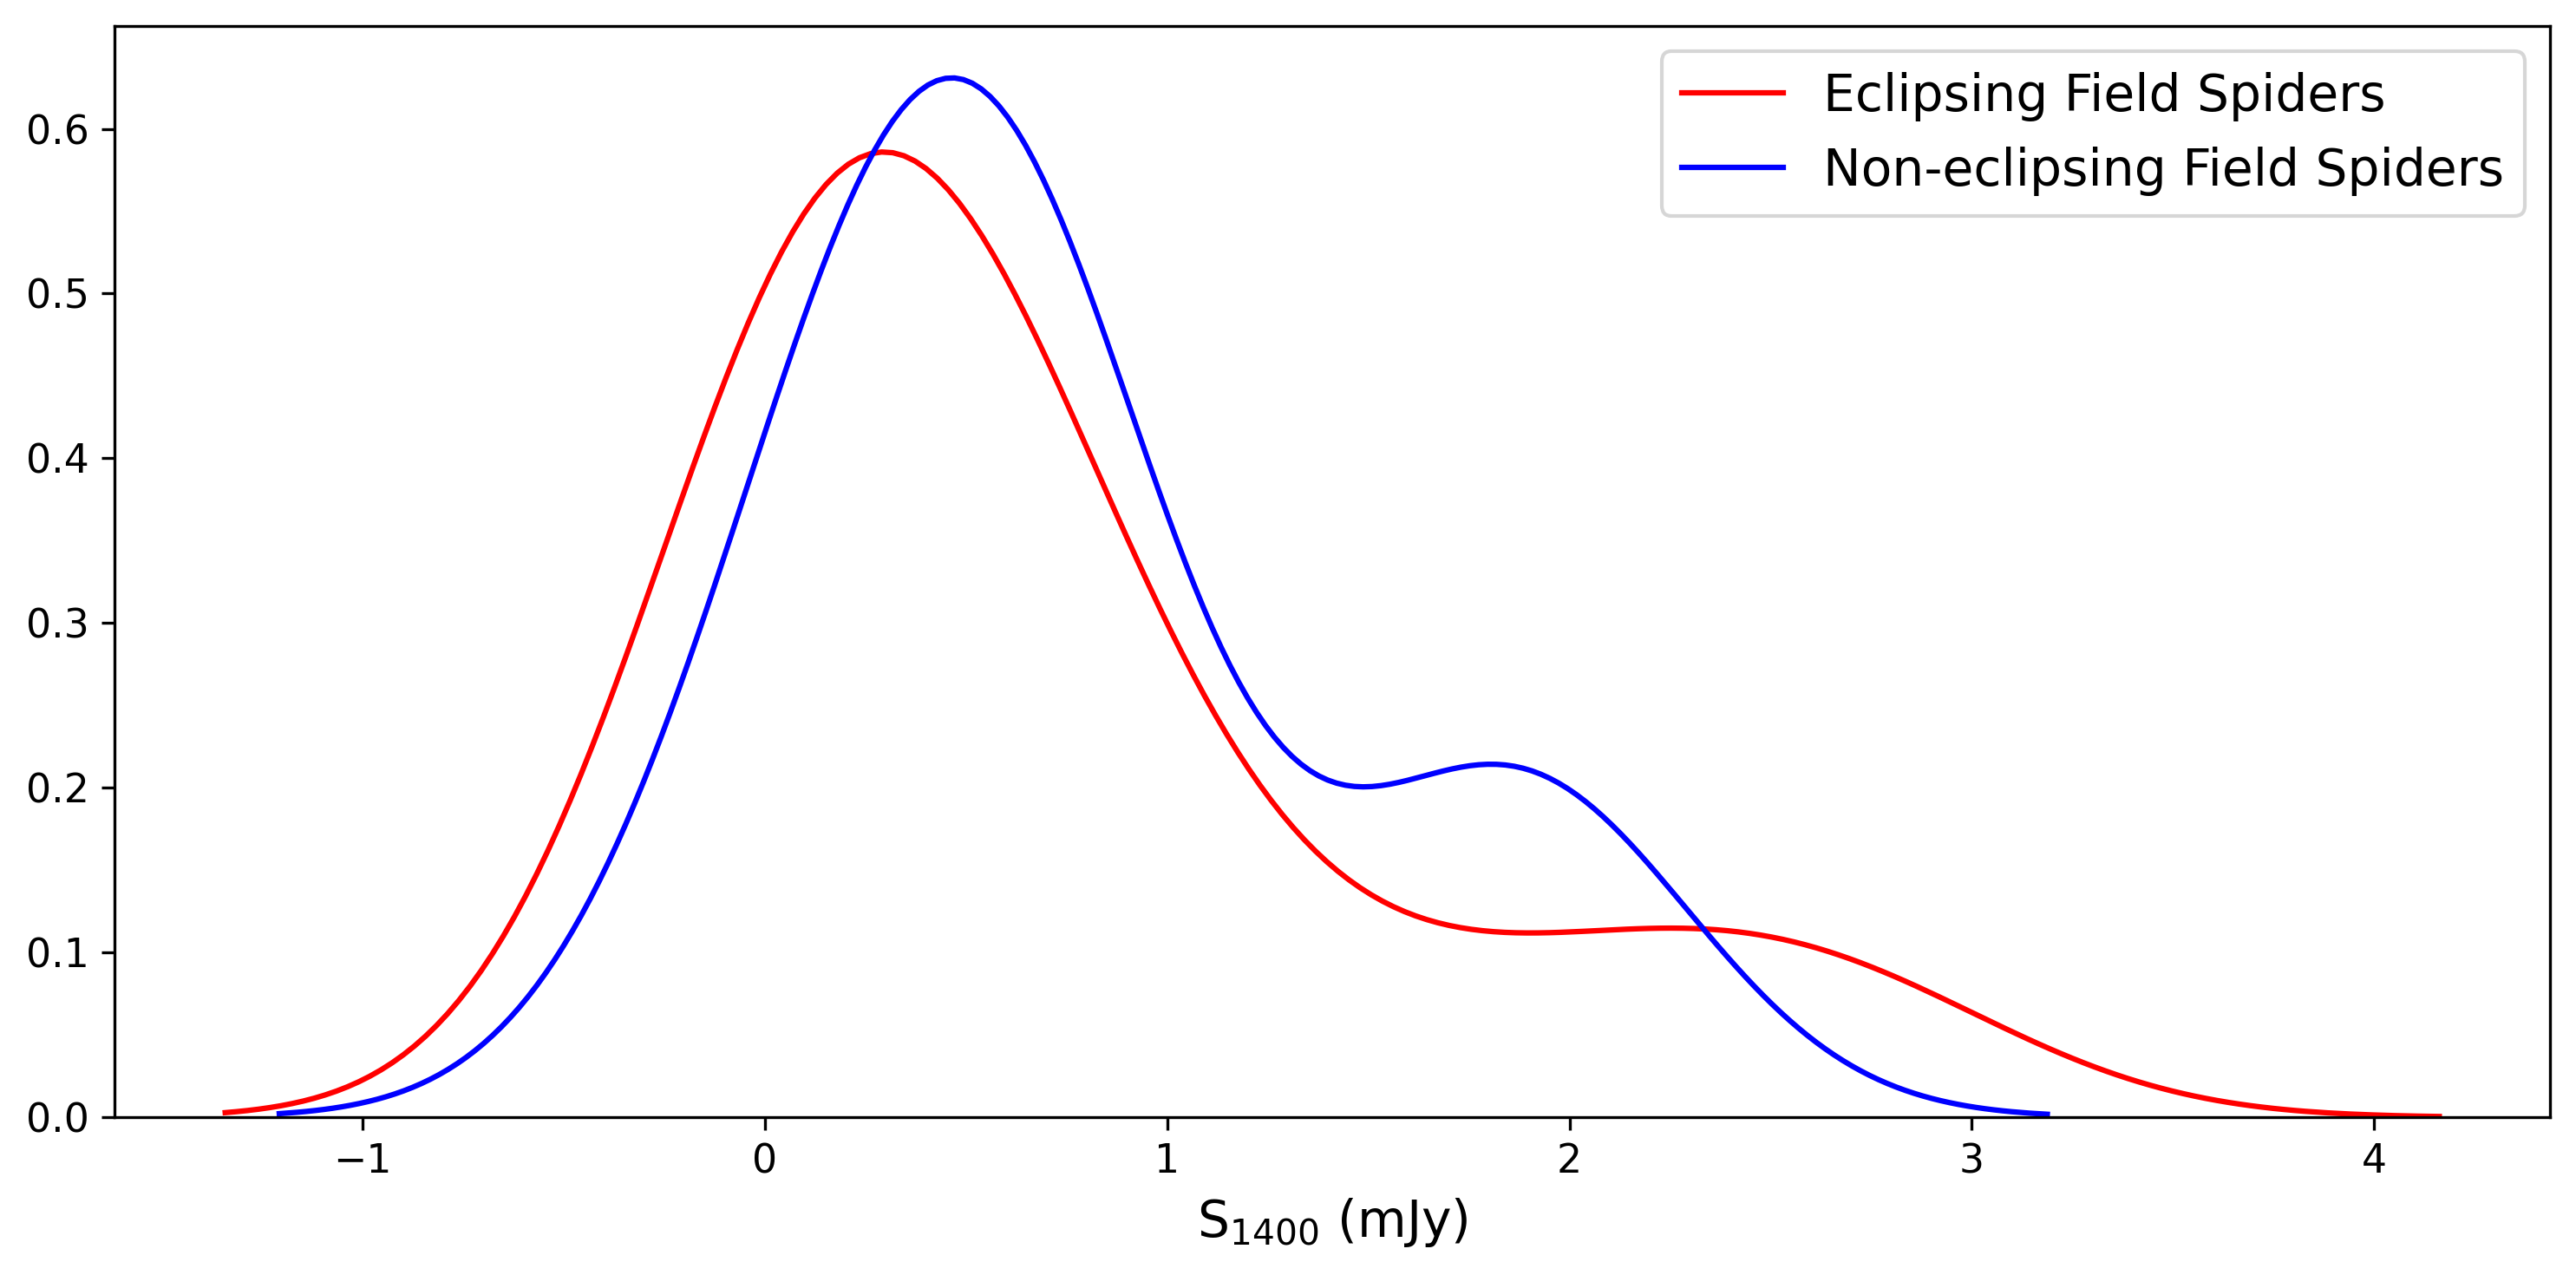

In [31]:
x1 = np.array(df1.iloc[0:21,2]) # Eclipsing Field Spiders >>> 21
y1 = np.array(df1.iloc[21:30,2]) # Non-eclipsing Field Spiders >>> 9

plt.figure(figsize=(10,5), dpi=300);
ax = sns.kdeplot(data=x1, label ='Eclipsing Field Spiders', color='red');
ax = sns.kdeplot(data=y1, label = 'Non-eclipsing Field Spiders', color='blue');
ax.set_xlabel('S$_{1400}$ (mJy)', fontsize = 14);
ax.set_ylabel('');
plt.xticks(fontsize=11);
plt.yticks(fontsize=11);
ax.legend( fontsize = 14);

plt.tight_layout()

plt.show()

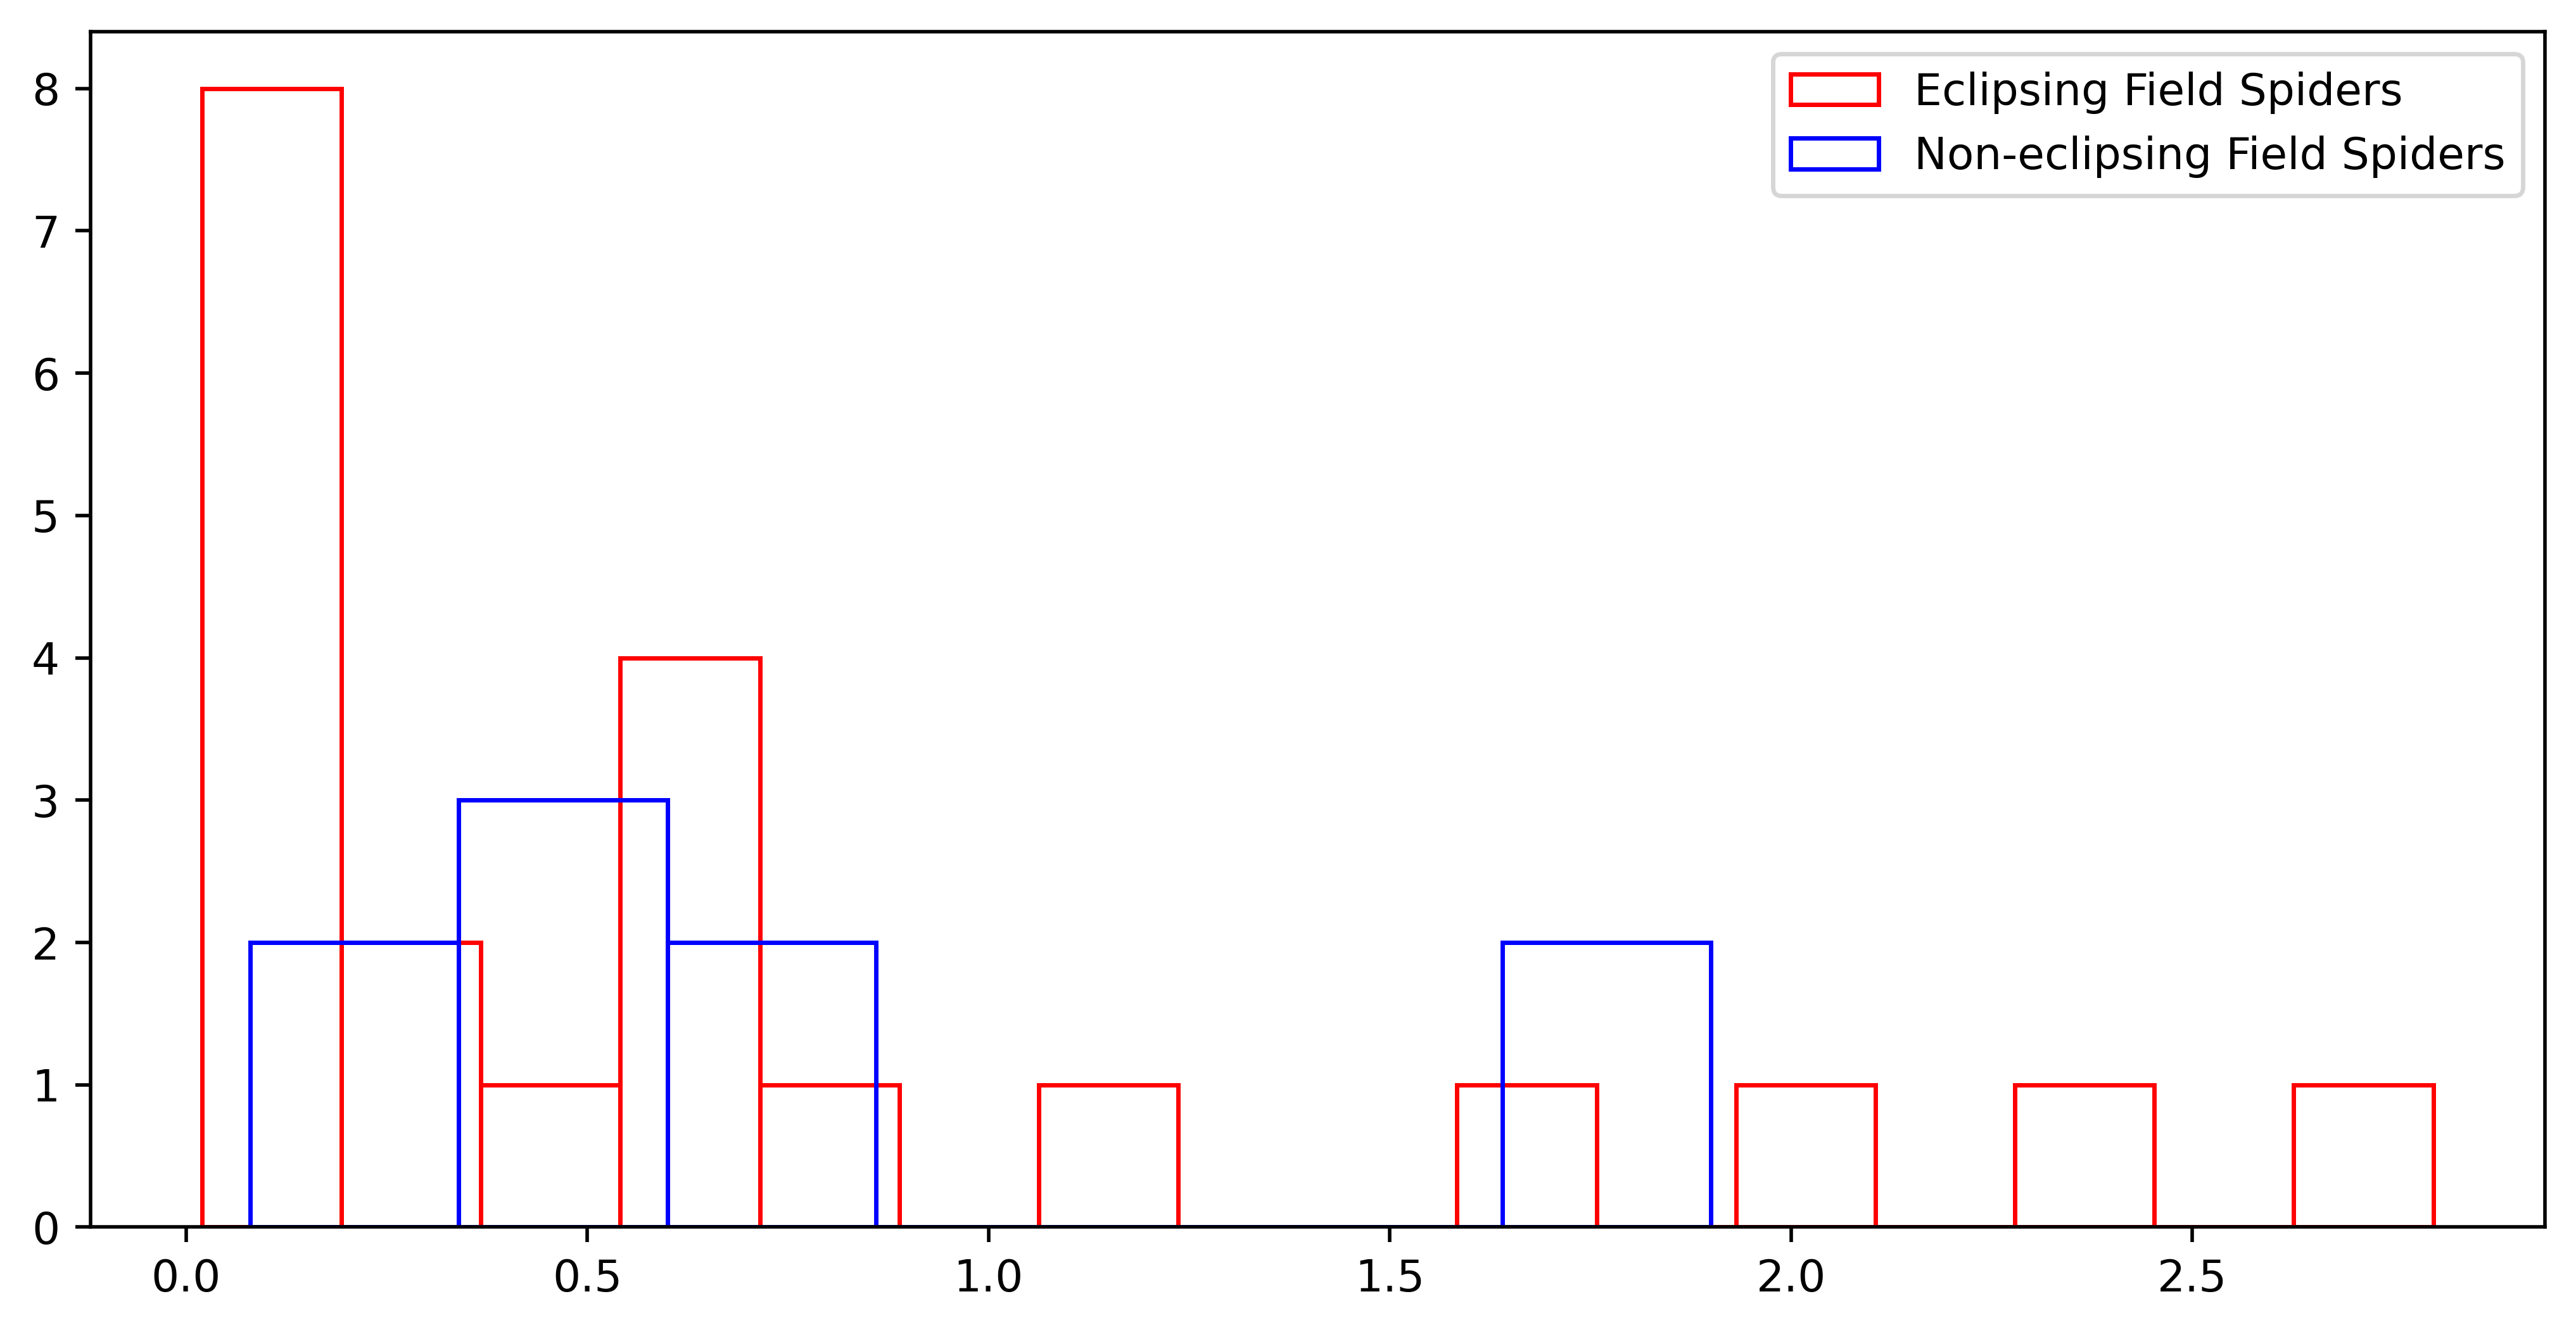

In [21]:
x1 = np.array(df1.iloc[0:21,2]) # Eclipsing Field Spiders >>> 21
y1 = np.array(df1.iloc[21:30,2]) # Non-eclipsing Field Spiders >>> 9

plt.figure(figsize=(10,5), dpi=500)
plt.hist(x1, edgecolor='r', bins=16, fill = False, label= 'Eclipsing Field Spiders')
plt.hist(y1, edgecolor='b', bins=7, fill = False, label= 'Non-eclipsing Field Spiders')
plt.legend()
plt.show()

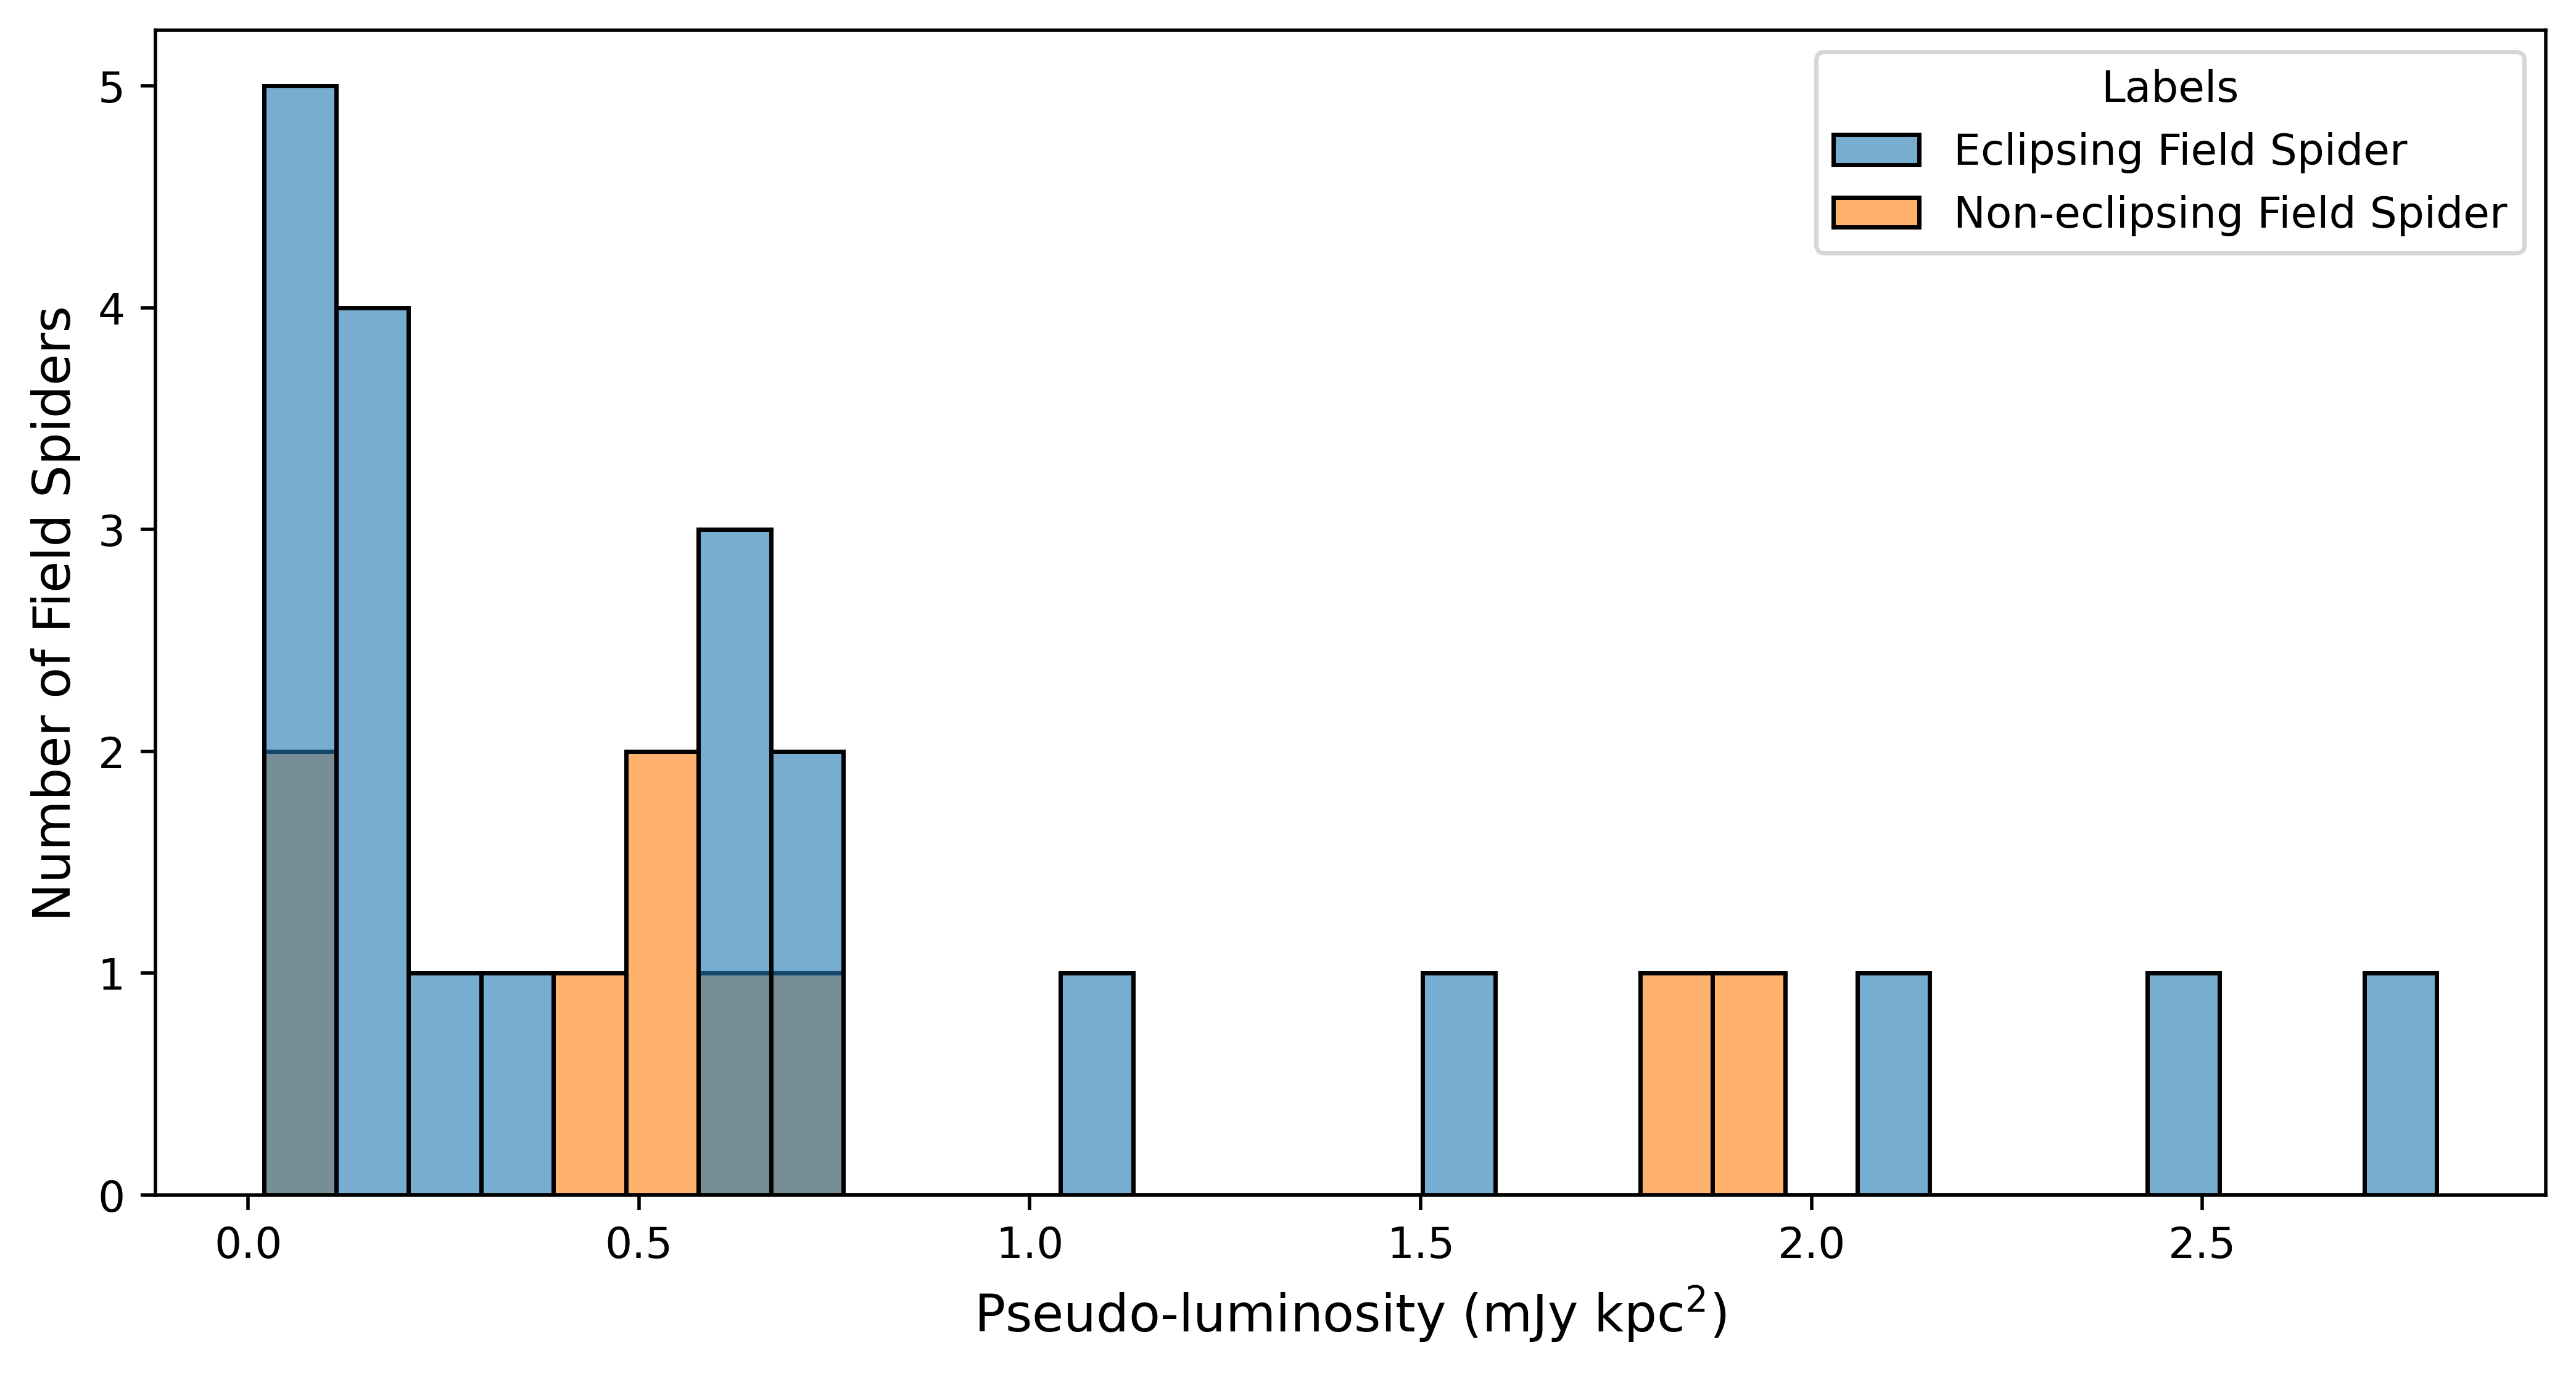

In [34]:
x1 = np.array(df1.iloc[0:21,2]) # Eclipsing Field Spiders >>> 21
y1 = np.array(df1.iloc[21:30,2]) # Non-eclipsing Field Spiders >>> 9

data = np.concatenate([x1, y1])
labels = ['Eclipsing Field Spider'] * len(x1) + ['Non-eclipsing Field Spider'] * len(y1) 


data_df = pd.DataFrame({'Values': data, 'Labels': labels})

plt.figure(figsize=(10,5), dpi=500)
sns.histplot(data=data_df, x='Values', hue='Labels', bins=30, edgecolor='black', alpha=0.6)
plt.xlabel('Pseudo-luminosity (mJy kpc$^2$)', fontsize = 12)
plt.ylabel('Number of Field Spiders', fontsize = 12)
# plt.xlim(-0.09, 9.2)
plt.show()

## Pseudoluminosity 

In [51]:
S = float(input('Enter the value of S: '))
d = float(input('Enter the value of d: '))

L = (S*d**2)
print(L)

Enter the value of S: 2.1
Enter the value of d: 4.7
46.38900000000001


In [56]:
# L = float(input('Enter the value of L: '))
# d = float(input('Enter the value of d: '))

# S = (L/d**2)
# print(S)

### Pseudoluminosity of GC & Field Spiders

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("D:\Black Widow Pulsars\Master's Thesis\Pseudolumonisities GC & Field Spiders.csv")
dff = pd.DataFrame(df)
dff

Name  Type  DIST (kpc)  DIST1 (kpc)  LUM (mJy kpc^2)  Unnamed: 5  \
0   J0024-7204ad   eRB       4.521        4.521            1.720         NaN   
1    J1701-3006B   eRB       6.410        6.410           12.300         NaN   
2    J1748-2446A   eRB       6.620        6.620           26.700         NaN   
3    J2140-2310A   eRB       8.460        8.460            5.730         NaN   
4   J0024-7204ac   eBW       4.521        4.521            3.110         NaN   
5    J1326-4728B   eBW       5.426        5.426            1.620         NaN   
6    J1518+0204C   eBW       7.480        7.480            2.180         NaN   
7    J1641+3627E   eBW       7.420        7.420            0.550         NaN   
8    J1748-2446O   eBW       6.620        6.620           13.600         NaN   
9    J1807-2459A  neBW       2.580        2.580            7.320         NaN   
10   J1836-2354A   eBW       3.303        3.303            2.180         NaN   
11   J1853-0842A   eBW       7.380        7.380            0.880         NaN   
12   J1953+1846A   eBW       4.000        4.000            0.940         NaN   
13    J1048+2339   eRB       2.002        0.704            0.700         NaN   
14    J1227-4853   eRB       1.613        1.613            4.140         NaN   
15    J1431-4715   eRB       1.562        1.562            1.640         NaN   
16    J1723-2837   eRB       0.928        0.928            0.950         NaN   
17    J1816+4510   eRB       4.356        2.418            3.470       1.070   
18    J1908+2105   eRB       2.601        3.180            0.310       0.470   
19    J1957+2516   eRB       2.659        3.067            0.140         NaN   
20    J2039-5617   eRB       1.800        1.800            1.900         NaN   
21    J2129-0429   eRB       1.830        1.830            0.200         NaN   
22    J2215+5135   eRB       2.773        3.009            4.690       5.520   
23    J0023+0923  neBW       1.818        1.818            2.410         NaN   
24    J0251+2606   eBW       1.170        0.819            0.031       0.015   
25    J0610-2100  neBW       3.259        3.541            6.900         NaN   
26    J1124-3653   eBW       0.990        1.717            0.036       0.110   
27    J1311-3430  neBW       2.430        1.408            0.640       1.408   
28    J1446-4701  neBW       1.569        1.461            1.130         NaN   
29    J1544+4937   eBW       2.991        2.000            5.890       2.630   
30    J1555-2908   eBW       7.559        2.653           11.400         NaN   
31    J1641+8049   eBW       3.035        1.651            1.440       0.420   
32    J1731-1847   eBW       4.782        2.553            8.690         NaN   
33    J1745+1017  neBW       1.214        1.264            0.750         NaN   
34    J1810+1744   eBW       2.361        2.004           13.590       2.004   
35    J1928+1245  neBW       6.079        6.080            2.960         NaN   
36    J1959+2048   eBW       1.400        1.400            0.570         NaN   
37    J2051-0827   eBW       1.469        1.044            6.040         NaN   
38    J2214+3000  neBW       0.600        0.600            0.190         NaN   
39    J2234+0944  neBW       0.704        0.704            0.940         NaN   
40    J2241-5236  neBW       1.042        1.042            1.990         NaN   
41    J2256-1024   eBW       2.083        2.083            3.170         NaN   
42           NaN   NaN         NaN          NaN              NaN         NaN   
43    J1306-4035   eRB       4.700        4.700           46.400         NaN   

    Assoc  
0      GC  
1      GC  
2      GC  
3      GC  
4      GC  
5      GC  
6      GC  
7      GC  
8      GC  
9      GC  
10     GC  
11     GC  
12     GC  
13  Field  
14  Field  
15  Field  
16  Field  
17  Field  
18  Field  
19  Field  
20  Field  
21  Field  
22  Field  
23  Field  
24  Field  
25  Field  
26  Field  
27  Field  
28  Field  
29  Field  
30  Field  
31  Field  
32  Field  
33 

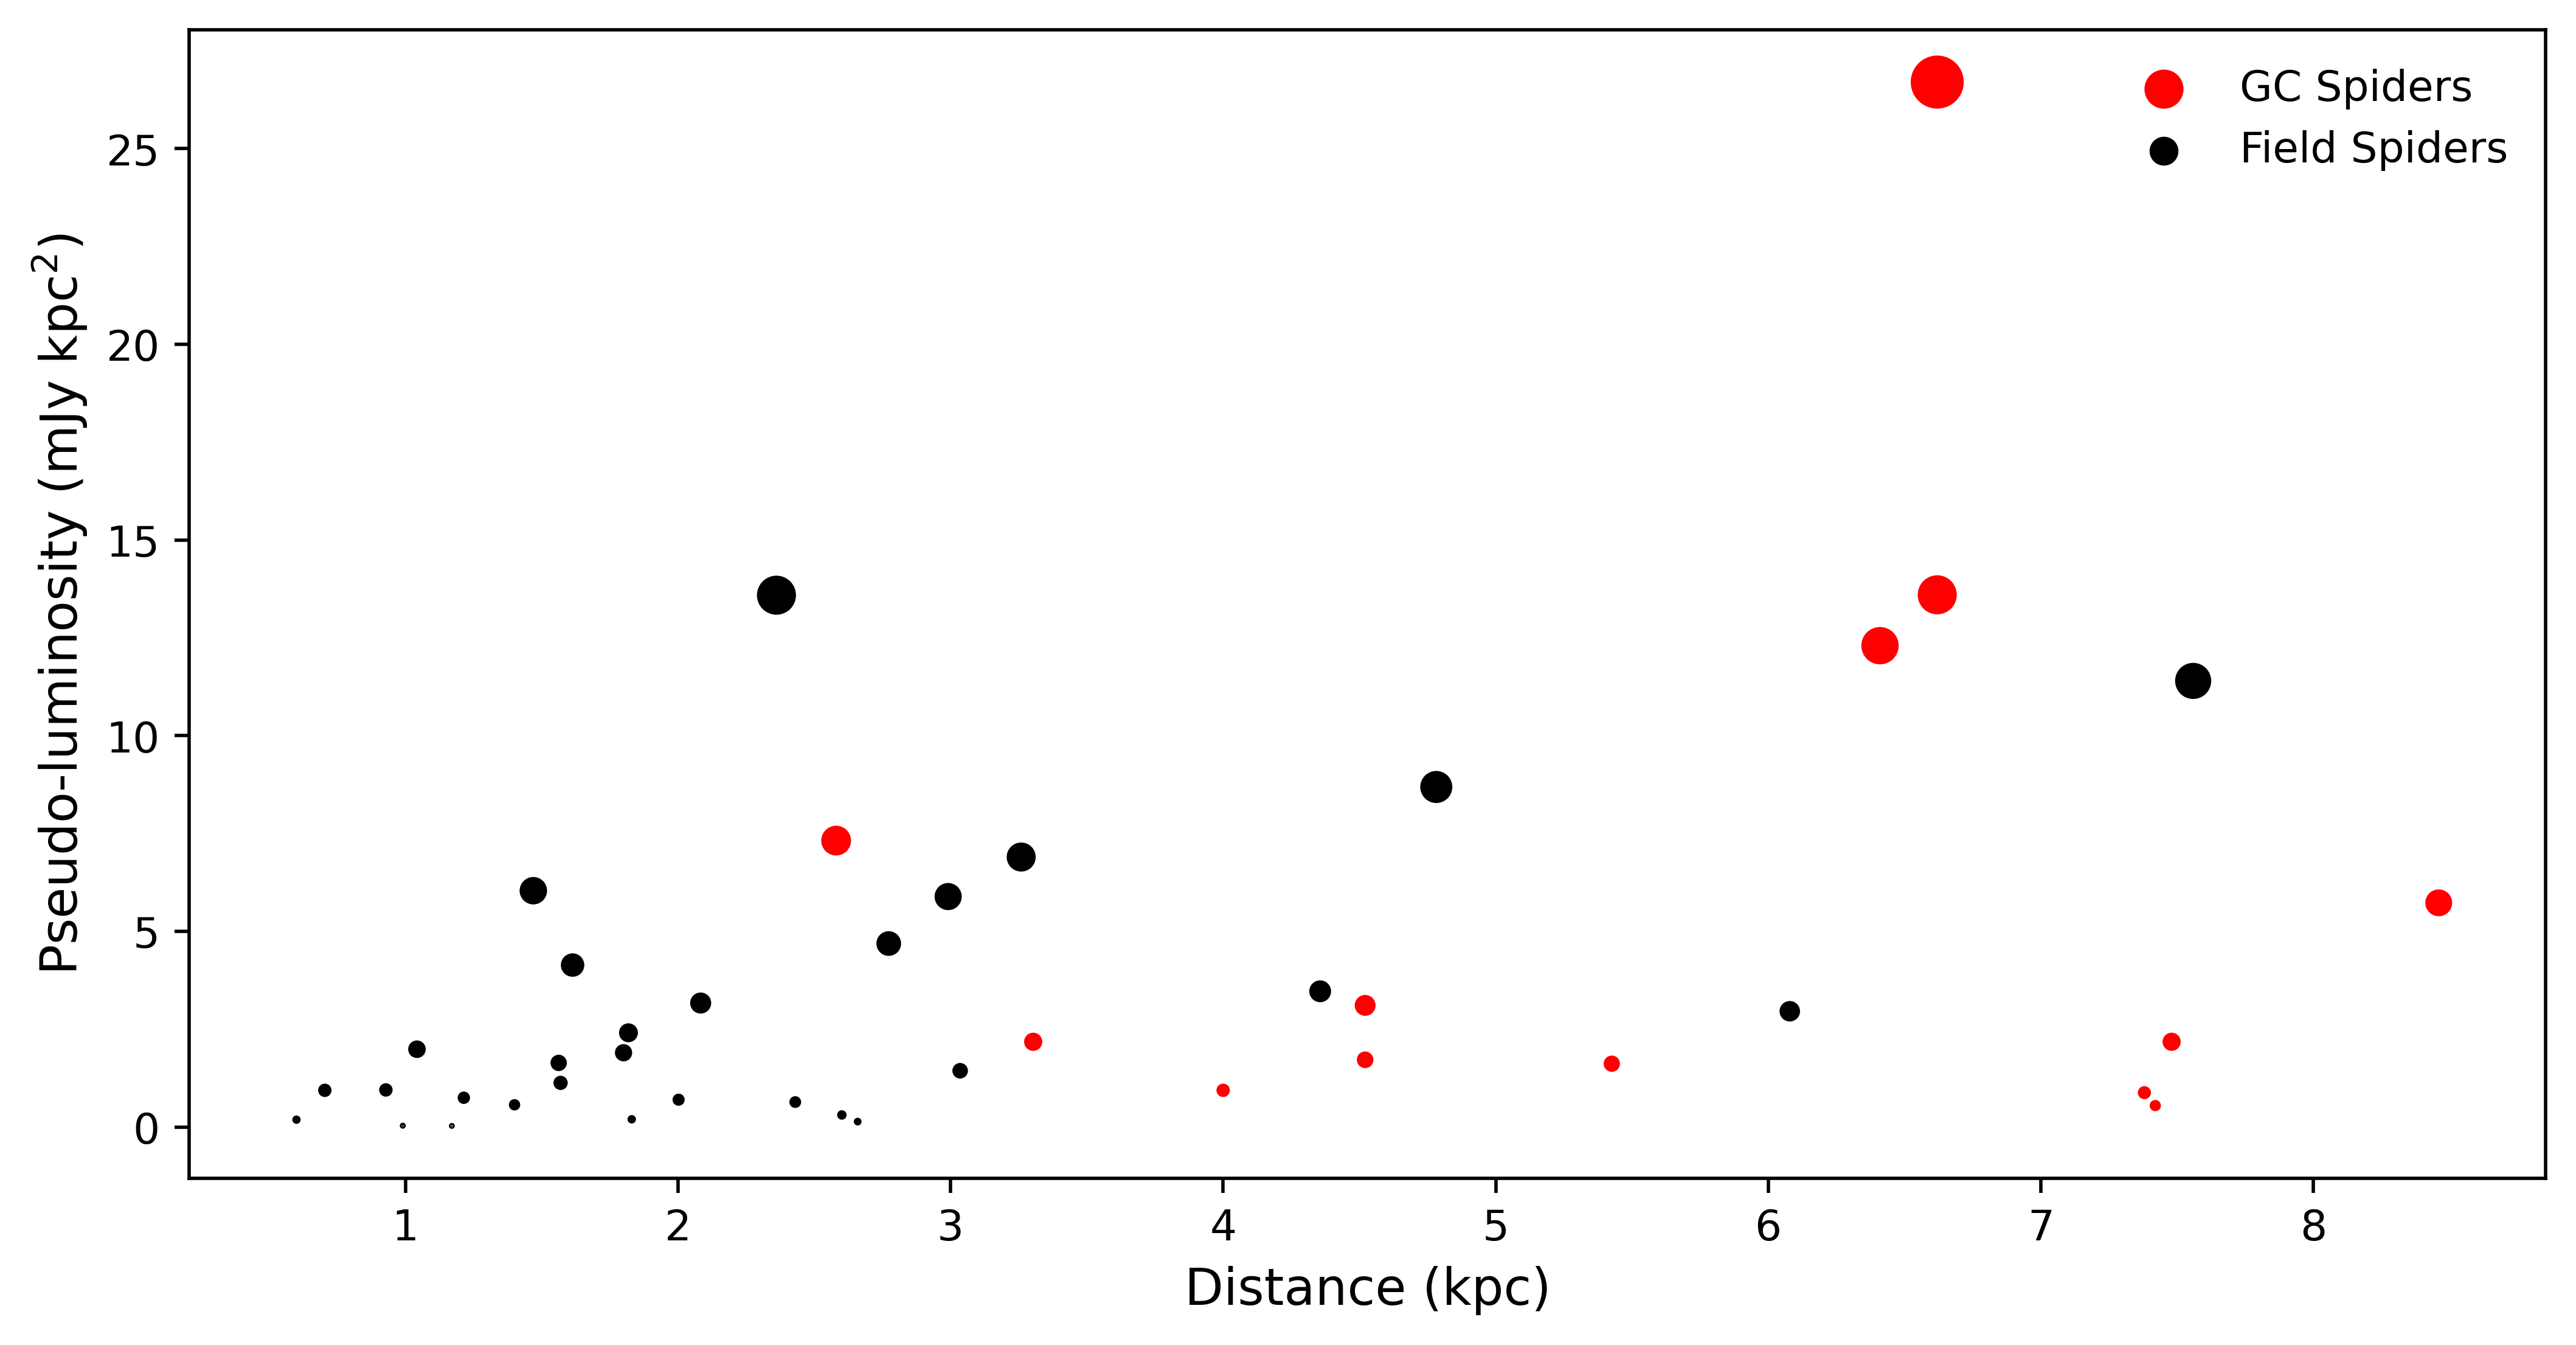

In [22]:
x1 = np.array(dff.iloc[0:13, 2])  # 13 GC Spiders
y1 = np.array(dff.iloc[0:13, 4])
luminosity1 = np.array(dff.iloc[0:13, 4])  

x2 = np.array(dff.iloc[13:42, 2])  # 29 Field Spiders
y2 = np.array(dff.iloc[13:42, 4])
luminosity2 = np.array(dff.iloc[13:42, 4])  

scaling_factor = 20  

plt.figure(figsize=(10, 5), dpi=500)
plt.scatter(x1, y1, marker='.', color='red', label='GC Spiders', s=luminosity1 * scaling_factor)
plt.scatter(x2, y2, marker='.', color='black', label='Field Spiders', s=luminosity2 * scaling_factor)

plt.xlabel('Distance (kpc)', fontsize=12)
plt.ylabel('Pseudo-luminosity (mJy kpc$^2$)', fontsize=12)
plt.legend(fontsize=10, frameon=False)
plt.show()


### Pseudoluminosity of e & ne Field Spiders

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("D:\Black Widow Pulsars\Master's Thesis\Pseudolumonisities e & ne Field Spiders.csv")
ddf = pd.DataFrame(df)
ddf

Name  Type  DIST (kpc)  DIST1 (kpc)  LUM (mJy kpc^2)  Unnamed: 5
0   J1048+2339   eRB       2.002        0.704            0.700         NaN
1   J1227-4853   eRB       1.613        1.613            4.140         NaN
2   J1431-4715   eRB       1.562        1.562            1.640         NaN
3   J1723-2837   eRB       0.928        0.928            0.950         NaN
4   J1816+4510   eRB       4.356        2.418            3.470       1.070
5   J1908+2105   eRB       2.601        3.180            0.310       0.470
6   J1957+2516   eRB       2.659        3.067            0.140         NaN
7   J2039-5617   eRB       1.800        1.800            1.900         NaN
8   J2129-0429   eRB       1.830        1.830            0.200         NaN
9   J2215+5135   eRB       2.773        3.009            4.690       5.520
10  J0251+2606   eBW       1.170        0.819            0.031       0.015
11  J1124-3653   eBW       0.990        1.717            0.036       0.110
12  J1544+4937   eBW       2.991        2.000            5.890       2.630
13  J1555-2908   eBW       7.559        2.653           11.400         NaN
14  J1641+8049   eBW       3.035        1.651            1.440       0.420
15  J1731-1847   eBW       4.782        2.553            8.690         NaN
16  J1810+1744   eBW       2.361        2.004           13.590       9.790
17  J1959+2048   eBW       1.400        1.400            0.570         NaN
18  J2051-0827   eBW       1.469        1.044            6.040         NaN
19  J2256-1024   eBW       2.083        2.083            3.170         NaN
20  J0023+0923  neBW       1.818        1.818            2.410         NaN
21  J0610-2100  neBW       3.259        3.541            6.900         NaN
22  J1311-3430  neBW       2.430        1.408            0.640       0.220
23  J1446-4701  neBW       1.569        1.461            1.130         NaN
24  J1745+1017  neBW       1.214        1.264            0.750         NaN
25  J1928+1245  neBW       6.079        6.080            2.960         NaN
26  J2214+3000  neBW       0.600        0.600            0.190         NaN
27  J2234+0944  neBW       0.704        0.704            0.940         NaN
28  J2241-5236  neBW       1.042        1.042            1.990         NaN
29         NaN   NaN         NaN          NaN              NaN         NaN
30  J1306-4035   eRB       4.700        4.700           46.400         NaN

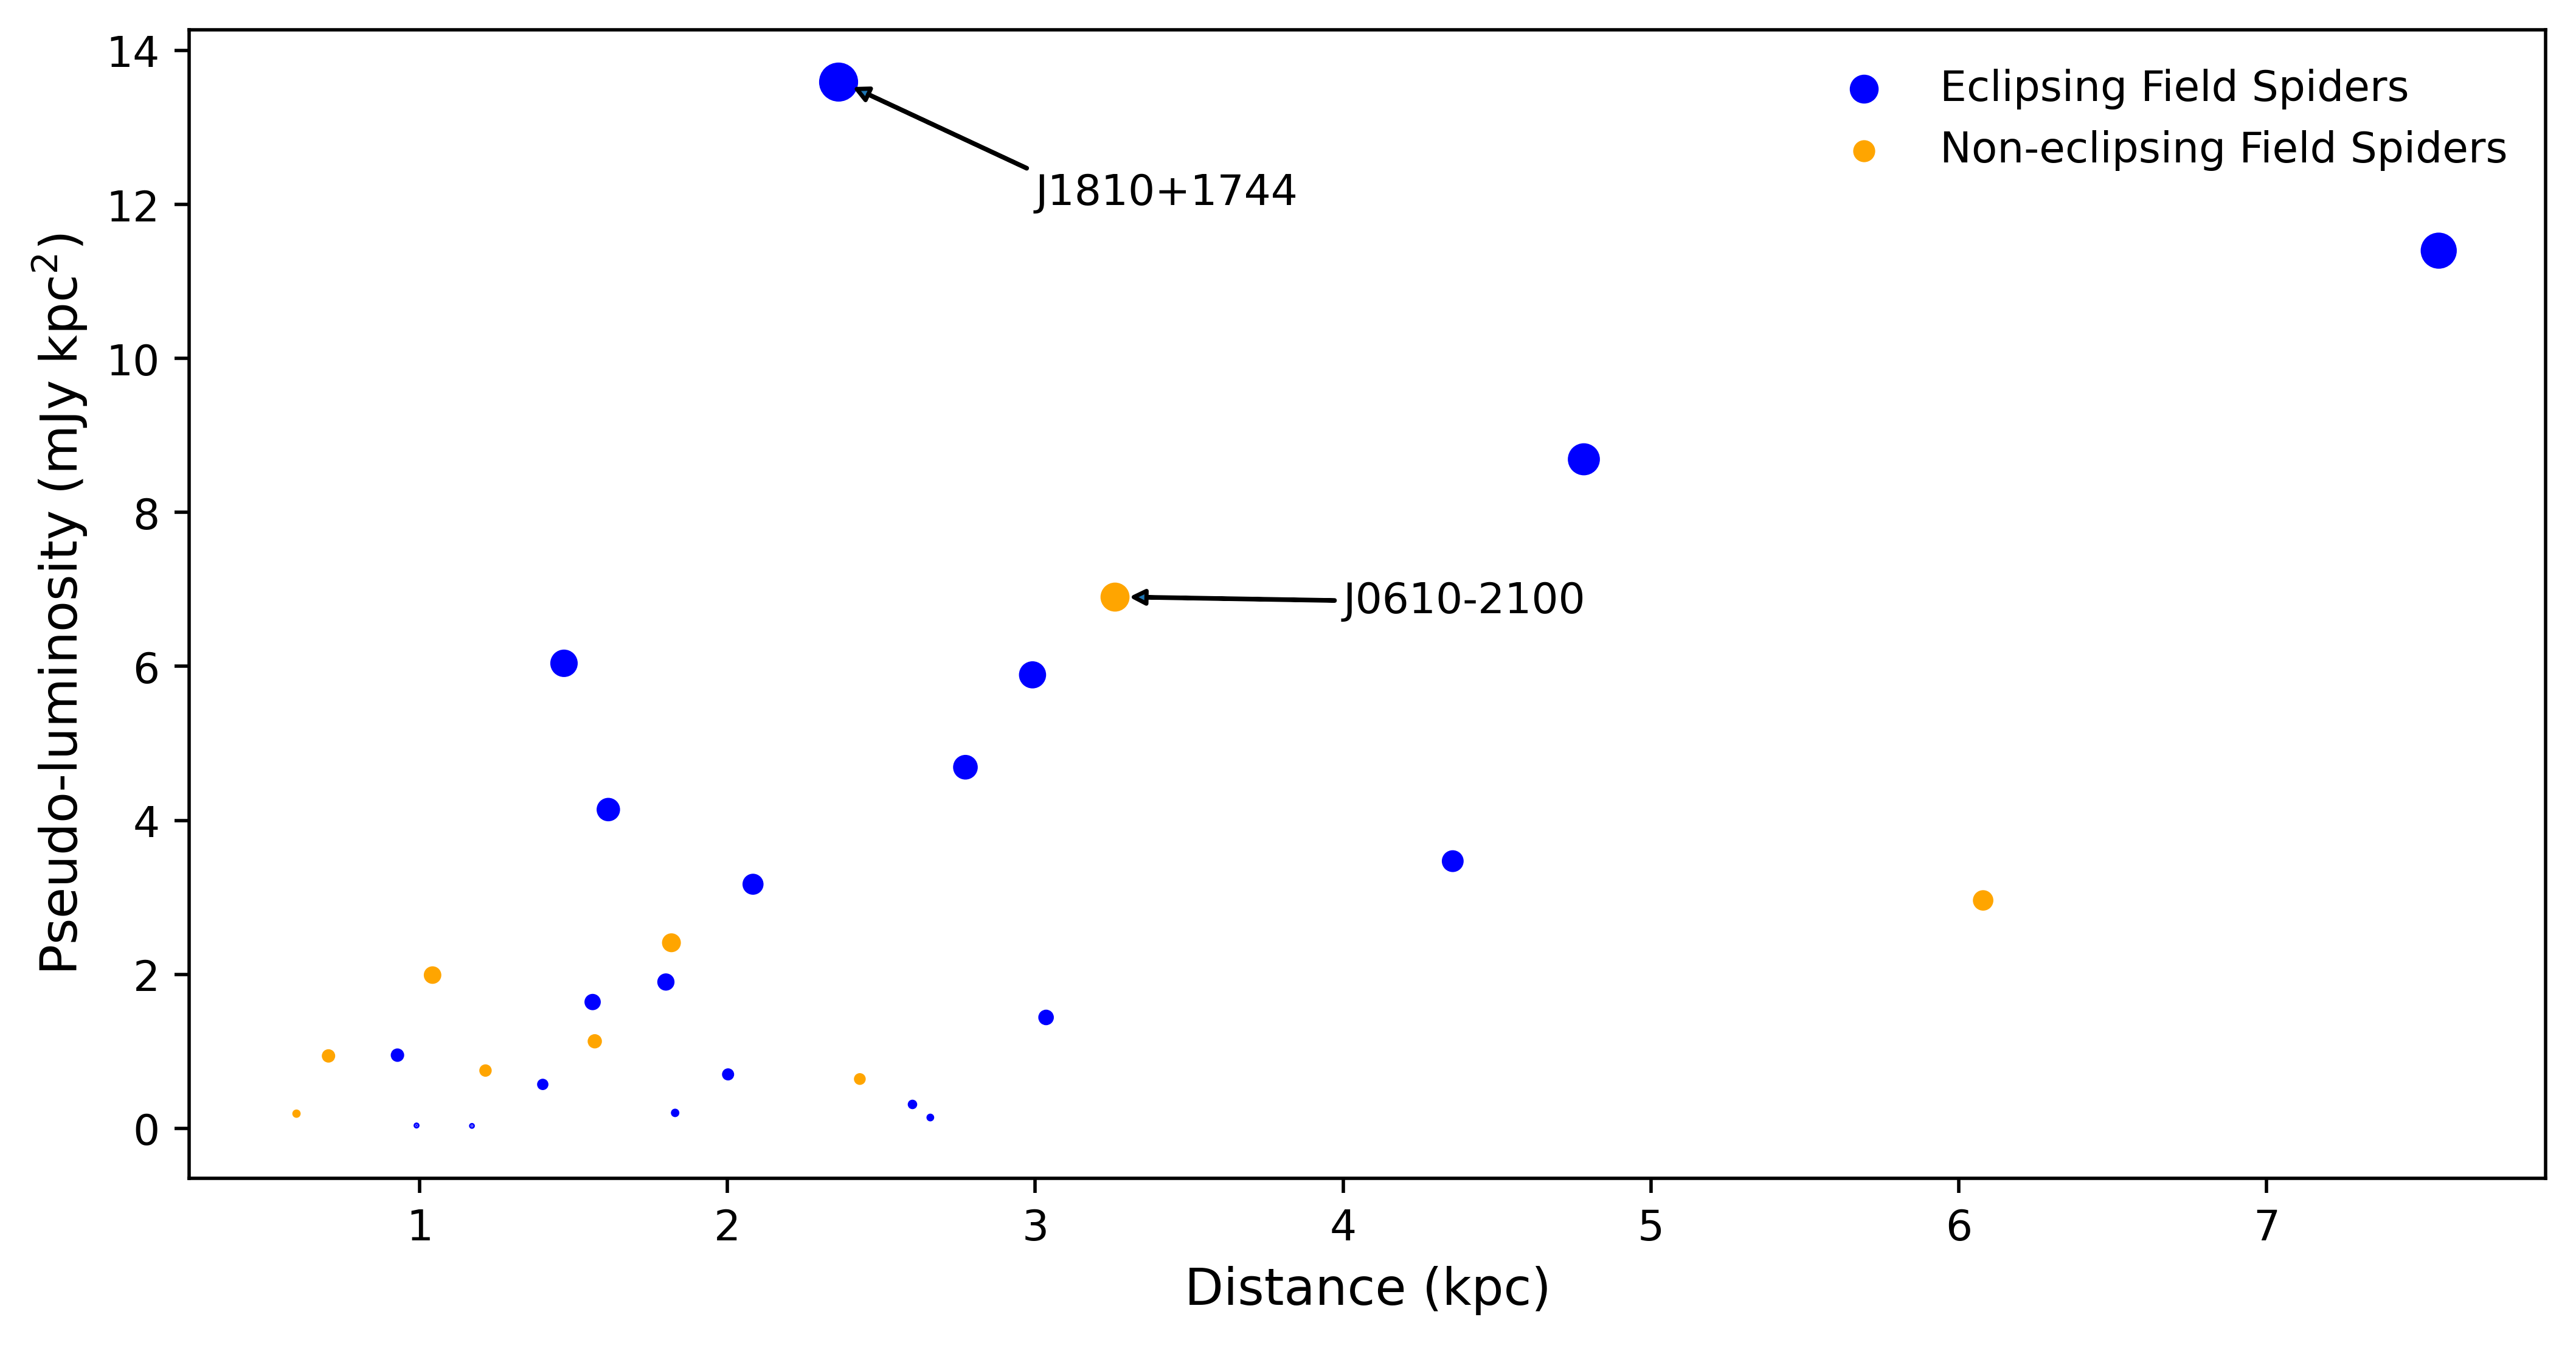

In [11]:
# Pseudoluminosities comparision of e & ne Field Spiders

xx1 = np.array(ddf.iloc[0:20,2]) # 20 Eclipsing Field Spiders
yy1 = np.array(ddf.iloc[0:20,4])
lum1 = np.array(ddf.iloc[0:20,4])

xx2 = np.array(ddf.iloc[20:29,2]) # 9 Non-eclipsing Field Spiders
yy2 = np.array(ddf.iloc[20:29,4])
lum2 = np.array(ddf.iloc[20:29,4])

sf= 20

plt.figure(figsize=(10,5), dpi=500)
plt.scatter(xx1,yy1, marker= '.', color= 'blue', s = lum1*sf, label= 'Eclipsing Field Spiders')
plt.scatter(xx2,yy2, marker= '.', color= 'orange', s = lum2*sf, label= 'Non-eclipsing Field Spiders')

plt.annotate('J1810+1744',xy=(2.42,13.5),xytext=(3,12),arrowprops={"width":0.1, "headwidth":3,'headlength':3})
plt.annotate('J0610-2100',xy=(3.32,6.9),xytext=(4,6.7),arrowprops={"width":0.1, "headwidth":3,'headlength':3})
plt.xlabel('Distance (kpc)', fontsize = 12)  
plt.ylabel('Pseudo-luminosity (mJy kpc$^2$)', fontsize = 12)  
plt.legend(fontsize = 10, frameon=False)
plt.show()

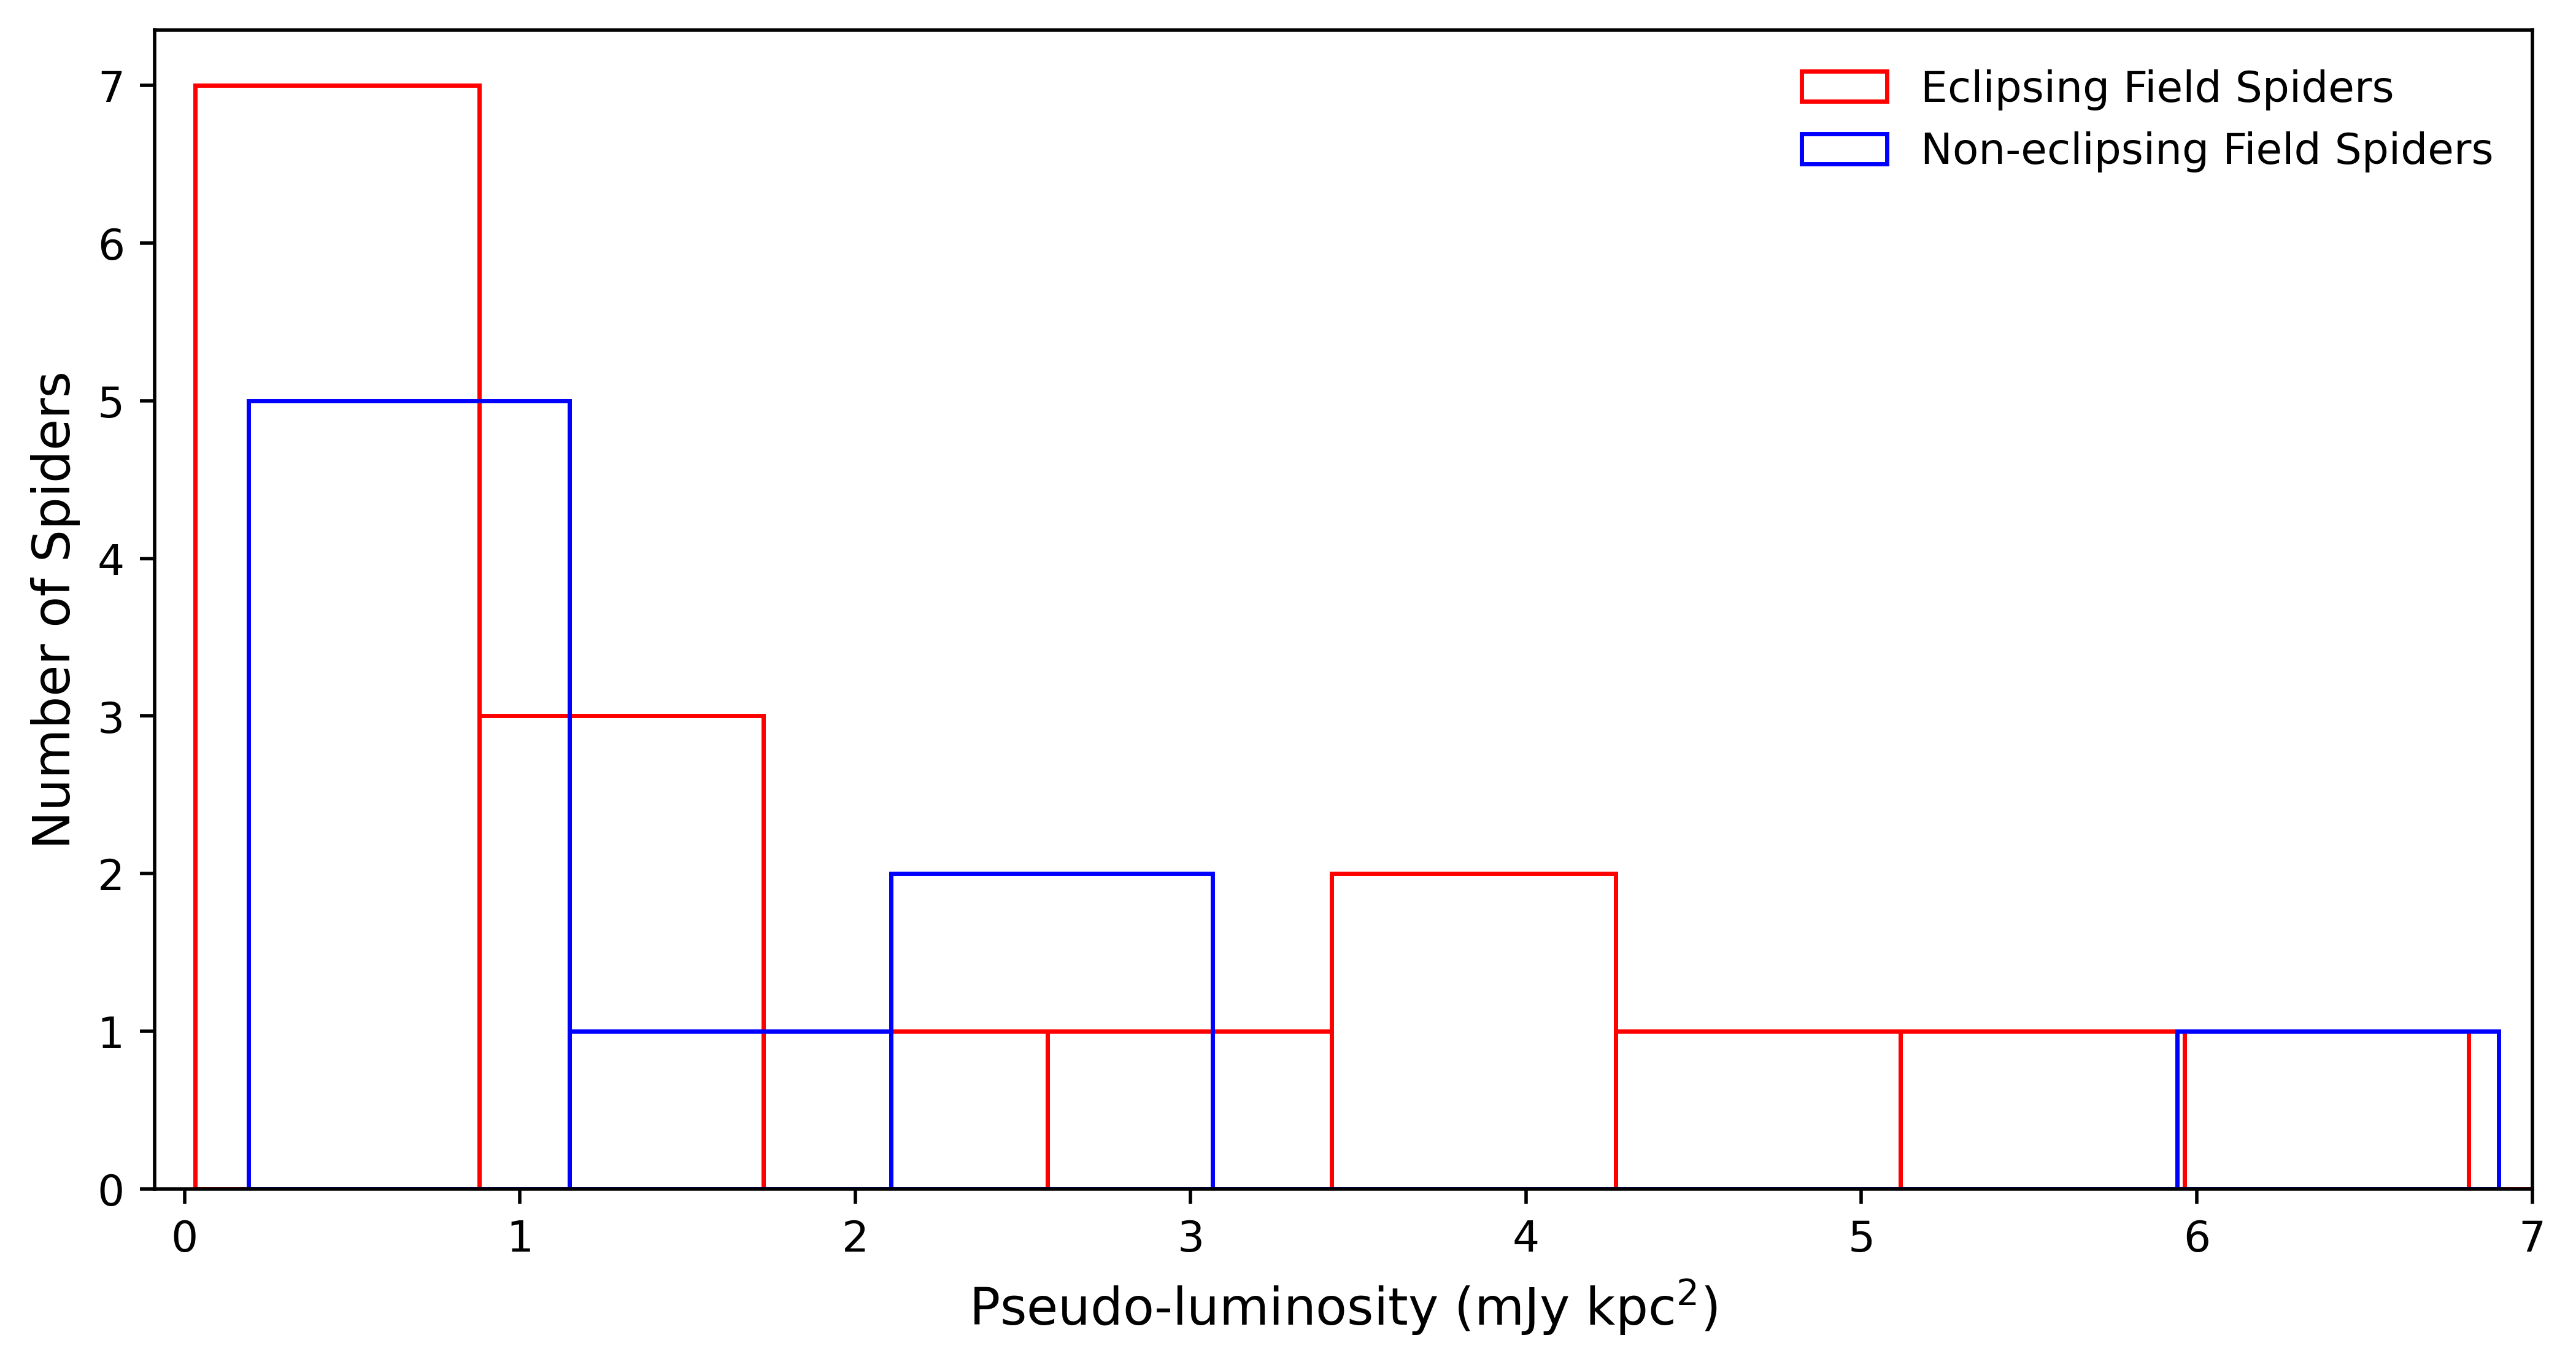

In [13]:
# Histogram pseudoluminosities comparision of e & ne Field Spiders

x1 = np.array(ddf.iloc[0:20,4]) # 20 Eclipsing Field Spiders

x2 = np.array(ddf.iloc[20:29,4]) # 9 Non-eclipsing Field Spiders

plt.figure(figsize=(10,5), dpi=500)
plt.hist(x1, edgecolor='r', bins=16, fill = False, label= 'Eclipsing Field Spiders')
plt.hist(x2, edgecolor='b', bins=7, fill = False, label= 'Non-eclipsing Field Spiders')
 
plt.xlabel('Pseudo-luminosity (mJy kpc$^2$)', fontsize = 12)
plt.ylabel('Number of Spiders', fontsize = 12)
plt.xlim(-0.09, 7)
plt.legend(fontsize = 10, frameon=False)
plt.show()

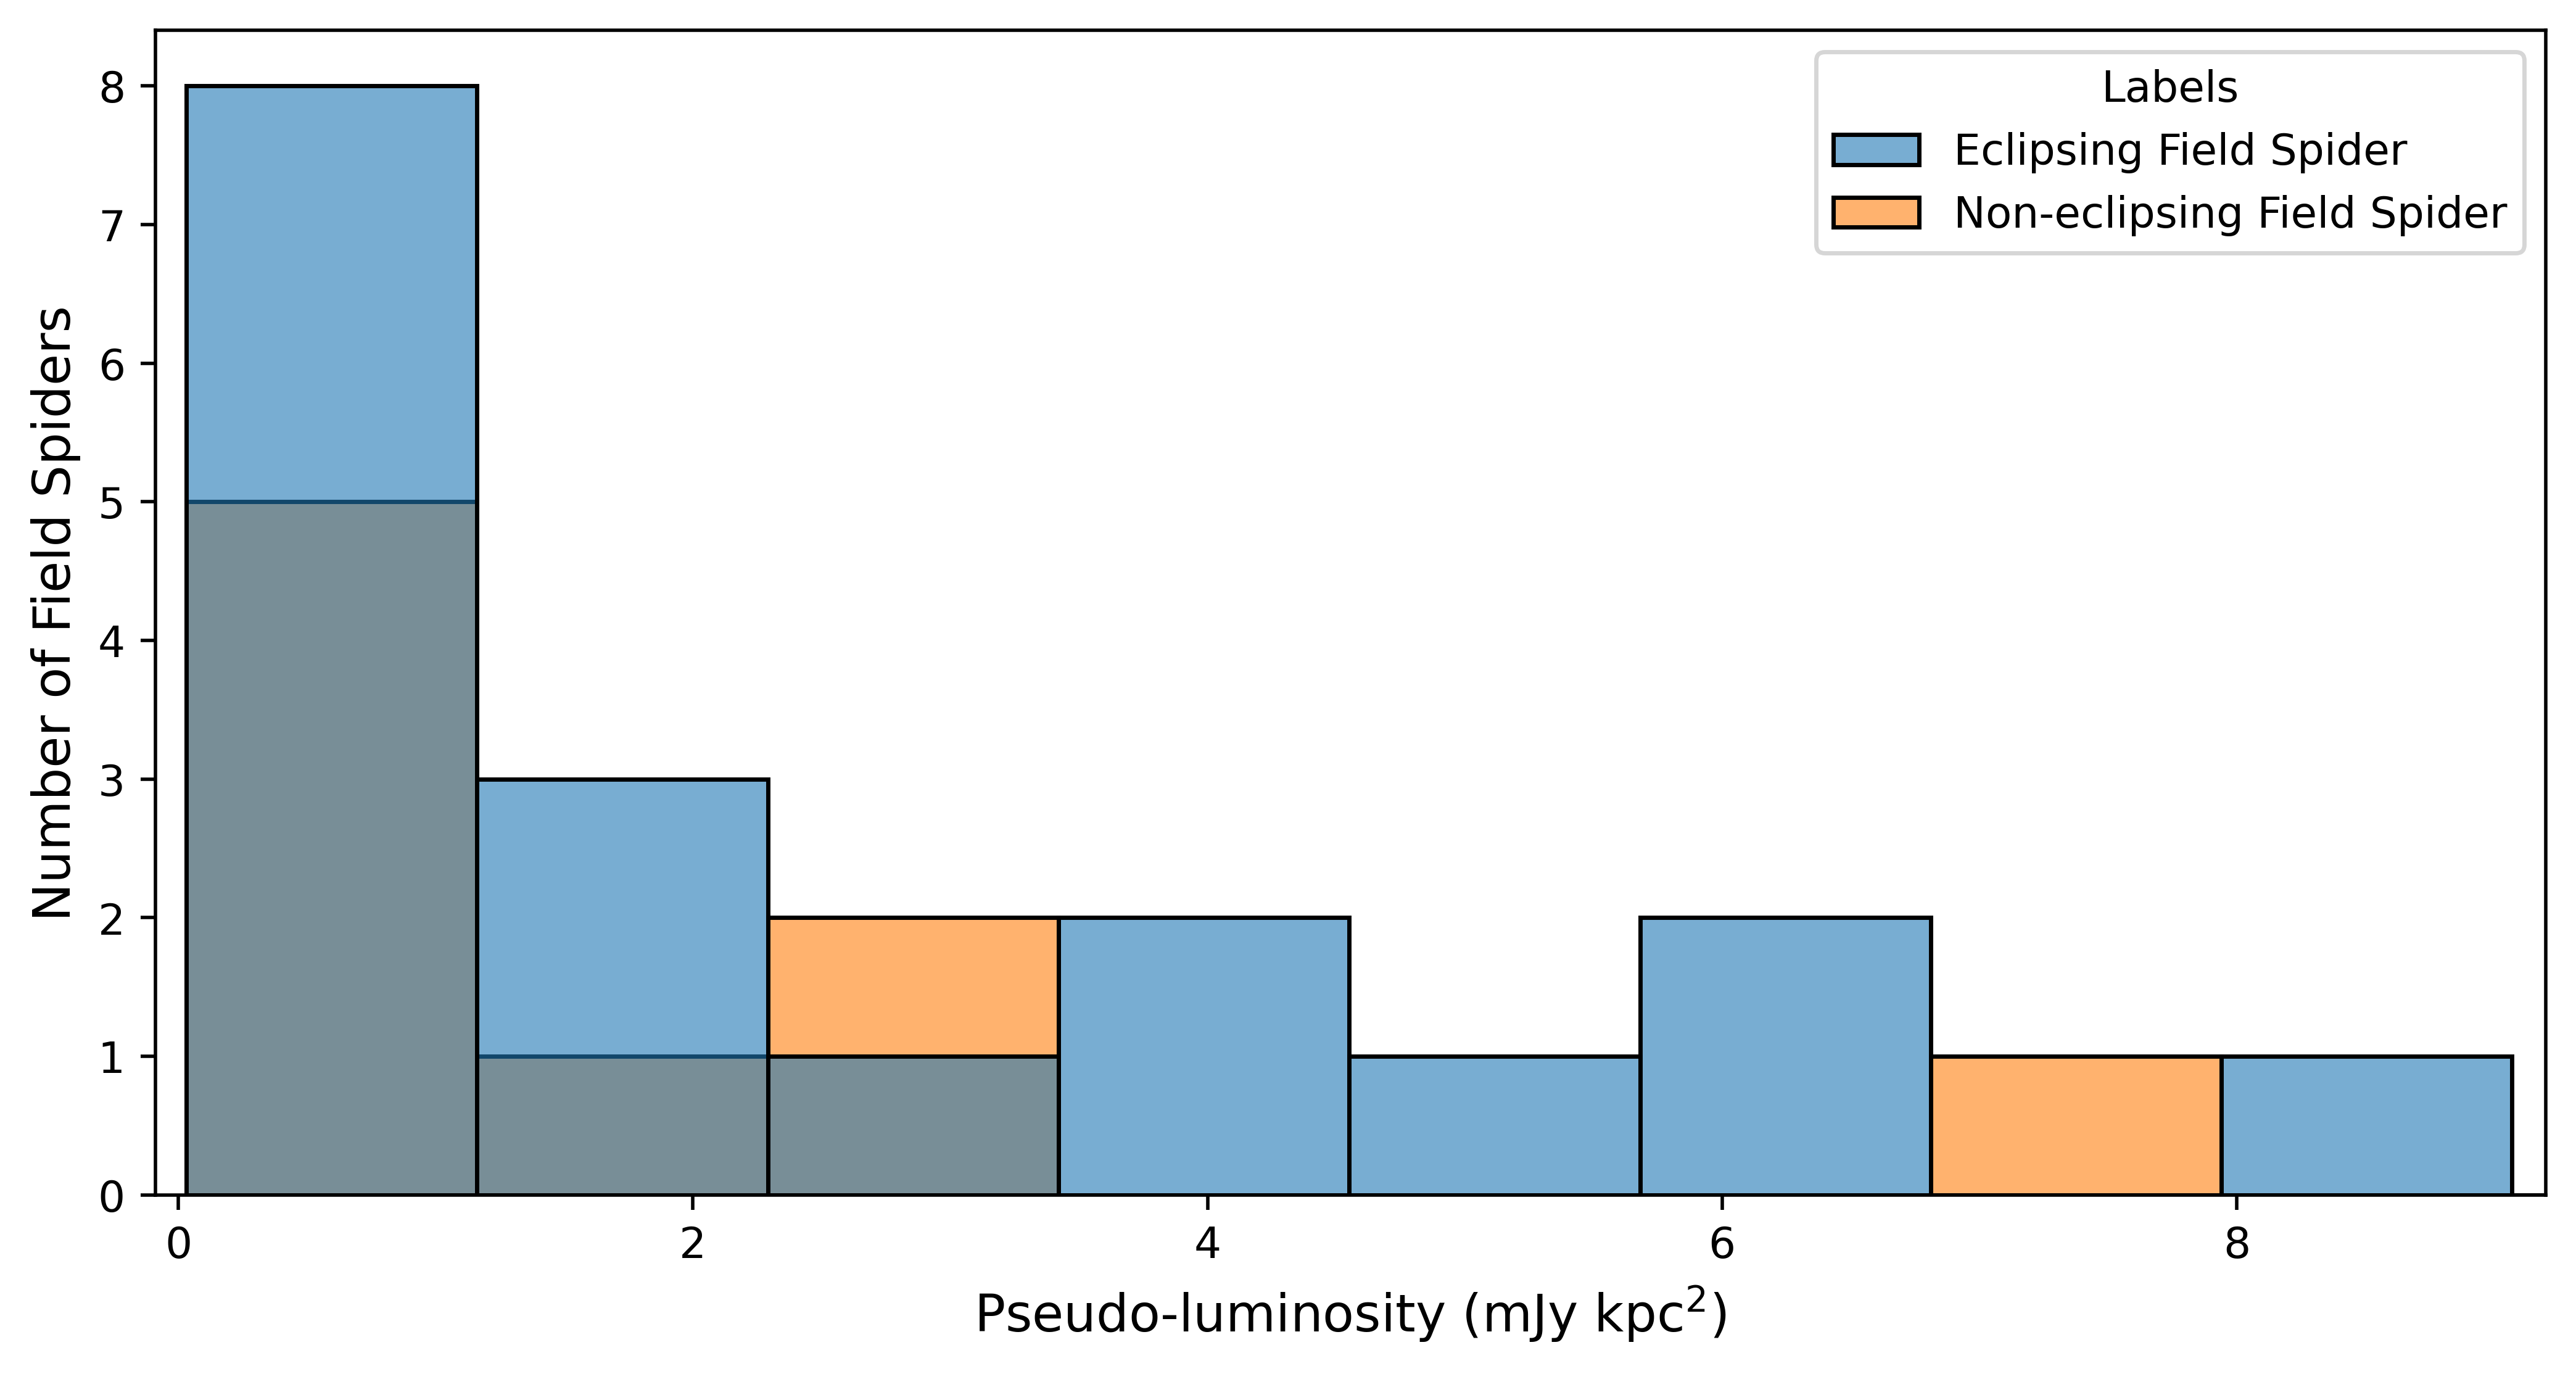

In [14]:
data = np.concatenate([x1, x2])
labels = ['Eclipsing Field Spider'] * len(x1) + ['Non-eclipsing Field Spider'] * len(x2) 


data_df = pd.DataFrame({'Values': data, 'Labels': labels})

plt.figure(figsize=(10,5), dpi=500)
sns.histplot(data=data_df, x='Values', hue='Labels', bins=12, edgecolor='black', alpha=0.6)
plt.xlabel('Pseudo-luminosity (mJy kpc$^2$)', fontsize = 12)
plt.ylabel('Number of Field Spiders', fontsize = 12)
plt.xlim(-0.09, 9.2)
plt.show()

## Inclination Angle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("D:\Black Widow Pulsars\Master's Thesis\Inclination angle Data for Field Spiders.csv")
ddf = pd.DataFrame(df)
ddf

Name  Type      i
0   J1023+0038   eRB  46.00
1   J1048+2339   eRB  83.00
2   J1227-4853   eRB  55.00
3   J1306-4035   eRB  70.40
4   J1417-4402   eRB  58.00
5   J1628-3205   eRB  55.00
6   J1723-2837   eRB  35.00
7   J2039-5617   eRB  70.00
8   J2129-0429   eRB  80.50
9   J2215+5135   eRB  88.80
10  J1622-0315    RB  64.00
11  J2339-0533    RB  69.30
12  J0023+0923  neBW  58.00
13  J2214+3000  neBW  66.00
14  J0610-2100  neBW  54.00
15  J0952–0607  neBW  59.80
16  J1745+1017  neBW  26.00
17  J1928+1245  neBW  60.00
18  J1301+0833   eBW  21.46
19  J1544+4937   eBW  52.00
20  J1555-2908   eBW  75.00
21  J1653-0158   eBW  60.00
22  J1810+1744   eBW  48.00
23  J1959+2048   eBW  63.90
24  J2051-0827   eBW  55.90
25  J2052+1219   eBW  77.00
26  J2055+3829   eBW  26.00
27  J2256-1024   eBW  24.00

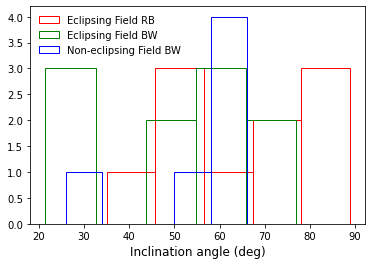

In [27]:
x = np.array(ddf.iloc[0:10,2]) # 10 eRB
y = np.array(ddf.iloc[18:28,2]) # 11 eBW
z = np.array(ddf.iloc[12:18,2]) # 6 neBW


# plt.figure(figsize=(10, 5), dpi = 500)
plt.hist(x, edgecolor='r', bins = 5, fill = False, label = 'Eclipsing Field RB');
plt.hist(y, edgecolor='g', bins = 5, fill = False, label = 'Eclipsing Field BW');
plt.hist(z, edgecolor='b', bins = 5, fill = False, label = 'Non-eclipsing Field BW');
plt.xlabel('Inclination angle (deg)', fontsize = 12);
plt.legend(fontsize = 10, frameon=False);

No handles with labels found to put in legend.


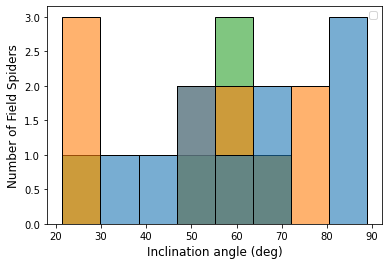

In [26]:
data = np.concatenate([x, y, z])
labels = ['Eclipsing Field RB'] * len(x) + ['Eclipsing Field BW'] * len(y) + ['Non-eclipsing Field BW'] * len(z)


data_df = pd.DataFrame({'Values': data, 'Labels': labels})

# plt.figure(figsize=(10,5), dpi=500)
sns.histplot(data=data_df, x='Values', hue='Labels', bins=8, edgecolor='black', alpha=0.6)
plt.xlabel('Inclination angle (deg)', fontsize = 12)
plt.ylabel('Number of Field Spiders', fontsize = 12)
plt.legend()
plt.show()

## Edot vs Age for Field Spiders

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("D:\Black Widow Pulsars\Master's Thesis\Edot vs Age for field spiders.csv")
dff = pd.DataFrame(df)
dff

PSRJ  Type      AGE (Yr)  EDOT (ergs/s)  Assoc
0   J1717+4308A   eRB  8.190000e+08   7.650000e+34     GC
1   J1740-5340A   eRB  3.440000e+08   1.360000e+35     GC
2   J1748-2021D   eRB  3.640000e+08   9.420000e+33     GC
3    J1023+0038   eRB  3.860000e+09   5.690000e+34  Field
4    J1048+2339   eRB  2.460000e+09   1.170000e+34  Field
5    J1227-4853   eRB  2.410000e+09   9.130000e+34  Field
6    J1431-4715   eRB  2.260000e+09   6.840000e+34  Field
7    J1723-2837   eRB  3.900000e+09   4.660000e+34  Field
8    J1816+4510   eRB  1.170000e+09   5.230000e+34  Field
9    J1908+2105   eRB  2.940000e+09   3.240000e+34  Field
10   J1957+2516   eRB  2.290000e+09   1.740000e+34  Field
11   J2039-5617   eRB  2.970000e+09   3.000000e+34  Field
12   J2215+5135   eRB  1.240000e+09   7.410000e+34  Field
13   J1622-0315     *  5.250000e+09   8.050000e+33  Field
14   J2339-0533     *  3.240000e+09   2.320000e+34  Field
15  J0024-7204O   eBW  1.380000e+09   6.490000e+34     GC
16  J0024-7204R   eBW  3.720000e+08   1.390000e+35     GC
17  J1326-4728B   eBW  2.760000e+09   9.890000e+33     GC
18  J1518+0204C   eBW  1.510000e+09   6.720000e+34     GC
19  J1641+3627E   eBW  2.260000e+09   4.480000e+34     GC
20  J1701-3006E   eBW  1.650000e+08   3.620000e+35     GC
21  J1701-3006F   eBW  1.640000e+08   7.260000e+35     GC
22  J1737-0314A   eBW  3.280000e+08   4.860000e+35     GC
23  J1824-2452M   eBW  6.170000e+08   4.430000e+34     GC
24  J1824-2452N   eBW  3.340000e+08   1.670000e+35     GC
25  J1836-2354A   eBW  2.290000e+10   2.420000e+33     GC
26  J0024-7204P  neBW  8.700000e+07   5.420000e+35     GC
27   J0023+0923  neBW  4.230000e+09   1.590000e+34  Field
28   J0610-2100  neBW  4.960000e+09   8.450000e+33  Field
29   J0952-0607  neBW  4.690000e+09   6.670000e+34  Field
30   J1311-3430  neBW  1.940000e+09   4.930000e+34  Field
31   J1446-4701  neBW  3.550000e+09   3.660000e+34  Field
32   J1745+1017  neBW  1.540000e+10   5.780000e+33  Field
33   J1928+1245  neBW  2.850000e+09   2.400000e+34  Field
34   J2214+3000  neBW  3.360000e+09   1.920000e+34  Field
35   J2234+0944  neBW  2.860000e+09   1.660000e+34  Field
36   J2241-5236  neBW  5.020000e+09   2.600000e+34  Field
37   J0251+2606   eBW  5.320000e+09   1.820000e+34  Field
38   J1124-3653   eBW  6.580000e+09   1.640000e+34  Field
39   J1544+4937   eBW  1.170000e+10   1.150000e+34  Field
40   J1555-2908   eBW  6.360000e+08   3.080000e+35  Field
41   J1641+8049   eBW  3.580000e+09   4.280000e+34  Field
42   J1653-0158   eBW  1.300000e+10   1.240000e+34  Field
43   J1731-1847   eBW  1.460000e+09   7.780000e+34  Field
44   J1810+1744   eBW  5.720000e+09   3.970000e+34  Field
45   J1959+2048   eBW  1.510000e+09   1.600000e+35  Field
46   J2051-0827   eBW  5.610000e+09   5.480000e+33  Field
47   J2052+1219   eBW  4.690000e+09   3.380000e+34  Field
48   J2055+3829   eBW  3.310000e+10   4.330000e+33  Field
49   J2256-1024   eBW  3.200000e+09   3.710000e+34  Field
50   J1805+0615     *  1.480000e+09   9.310000e+34  Field
51   J1833-3840     *  1.670000e+09   1.070000e+35  Field

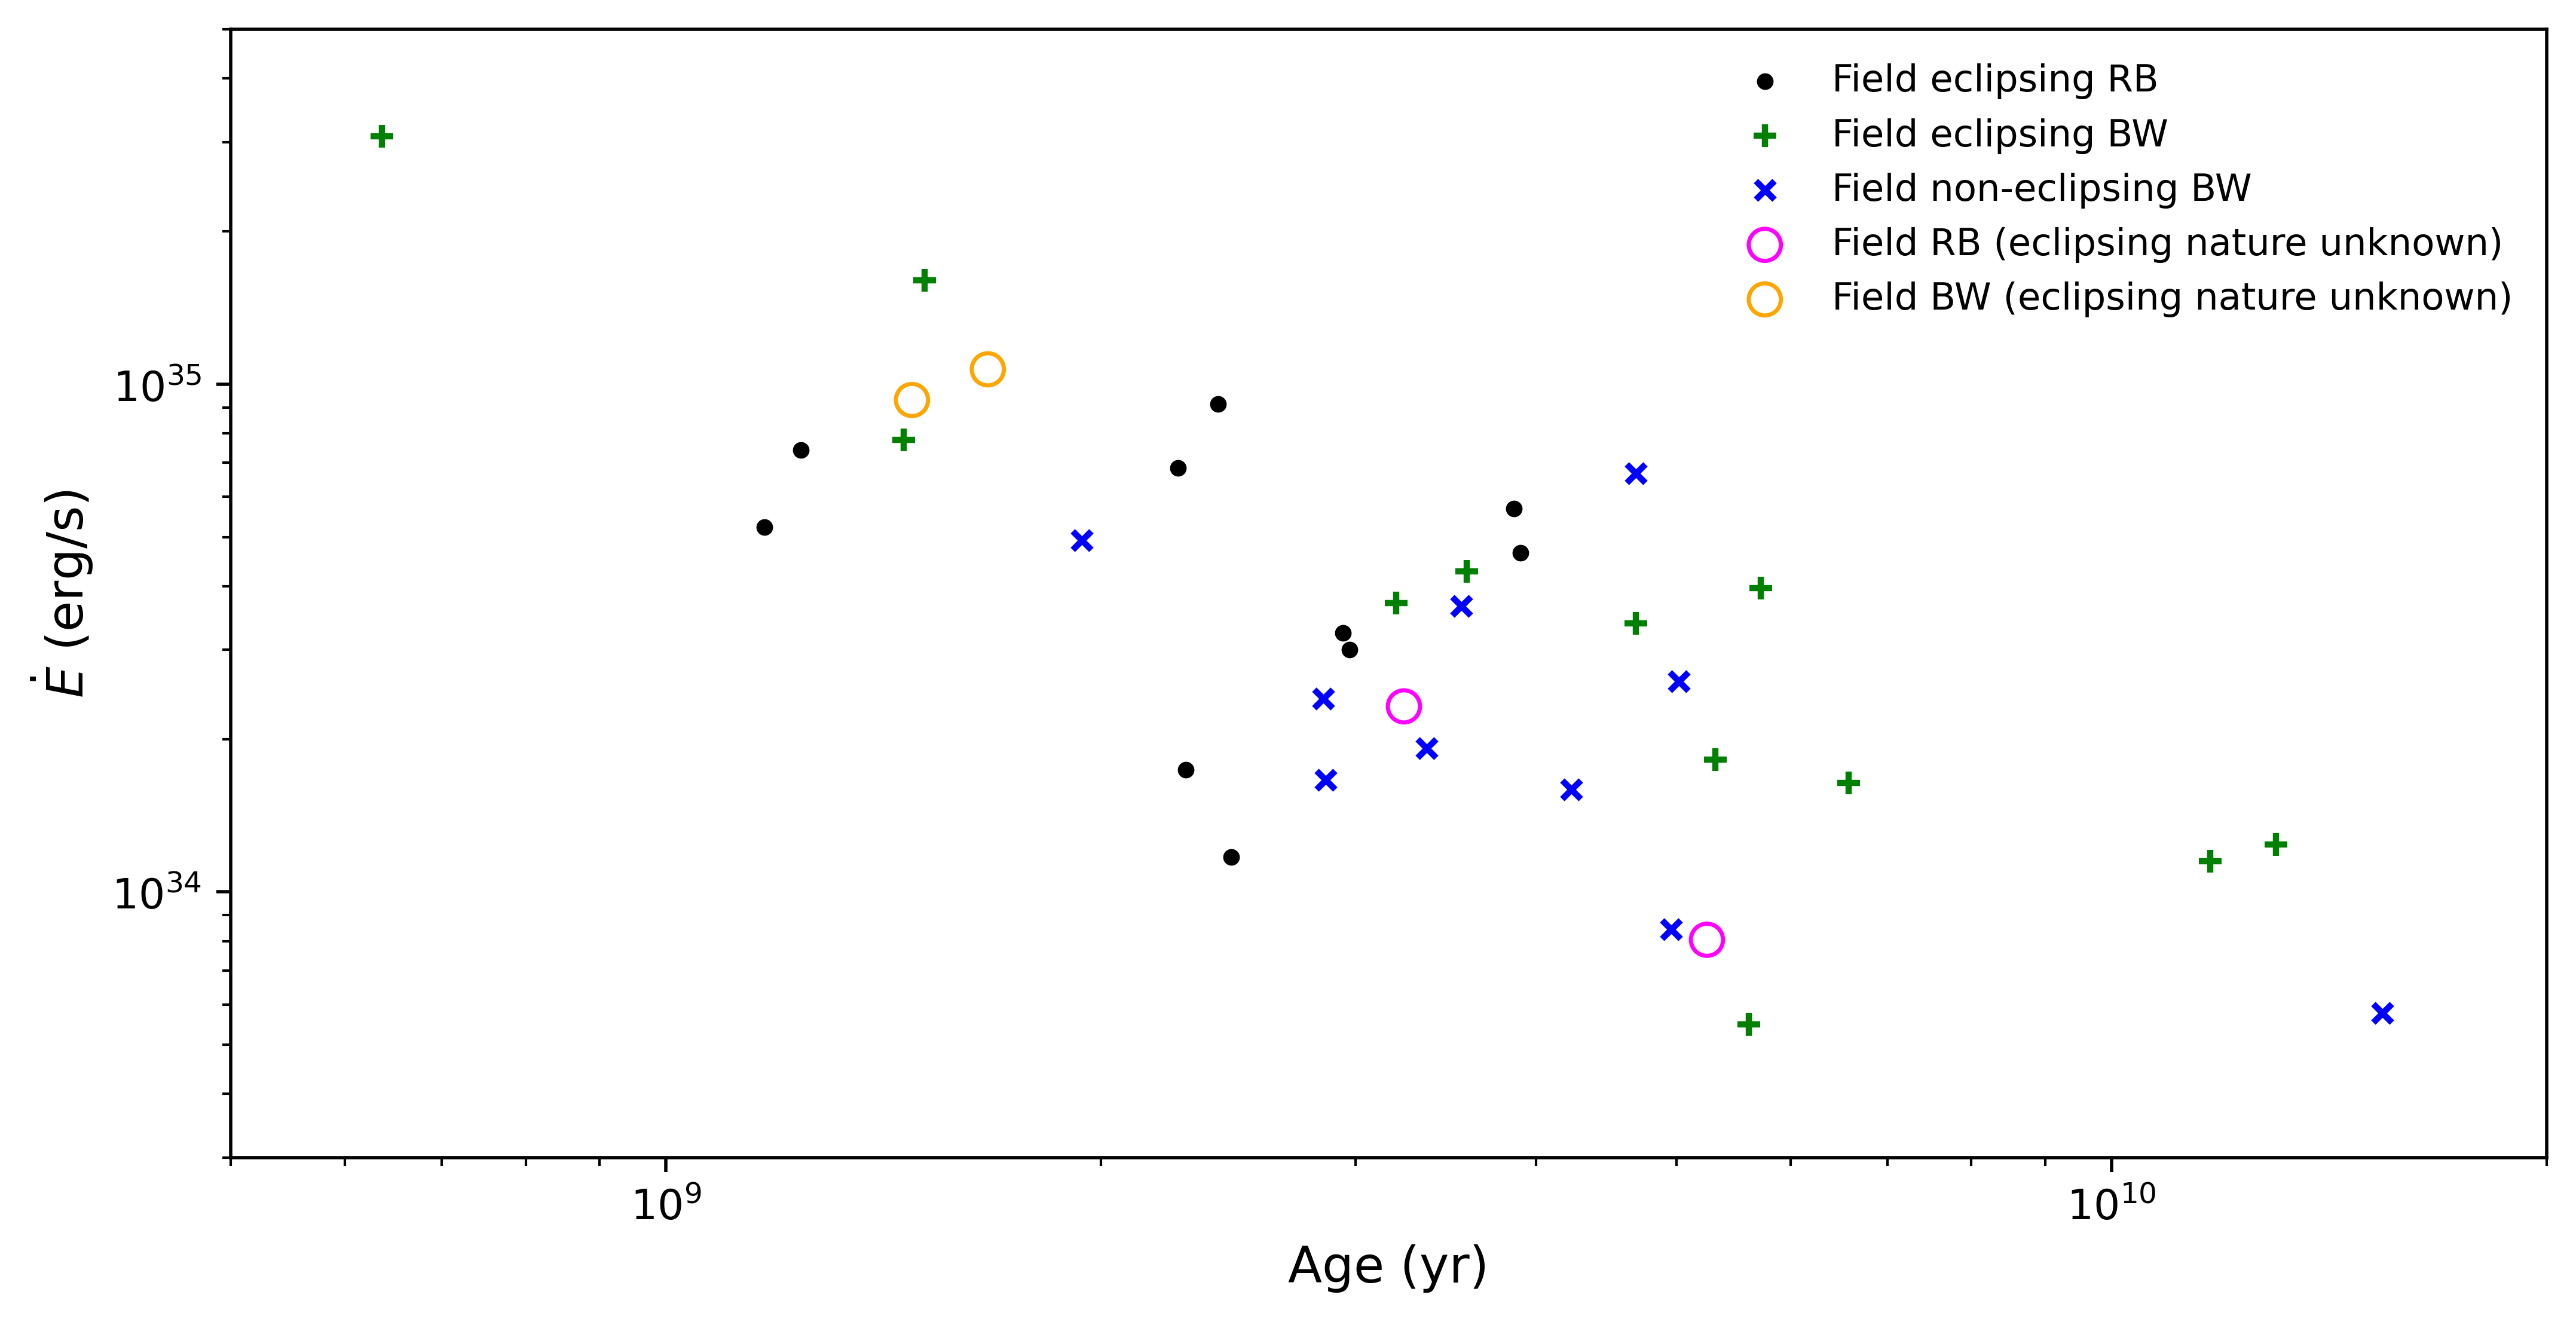

In [2]:
x1 = np.array(dff.iloc[3:13,2]) # 10 Field eclipsing RB
y1 = np.array(dff.iloc[3:13,3])

x2 = np.array(dff.iloc[13:15,2]) # 2 Field RB
y2 = np.array(dff.iloc[13:15,3])

x3 = np.array(dff.iloc[27:37,2]) # 10 Field non-eclipsing BW
y3 = np.array(dff.iloc[27:37,3])

x4 = np.array(dff.iloc[37:50,2]) # 13 Field eclipsing BW
y4 = np.array(dff.iloc[37:50,3])

x5 = np.array(dff.iloc[50:52,2]) # 2 Field BW
y5 = np.array(dff.iloc[50:52,3])

plt.figure(figsize=(10, 5), dpi=500)
plt.scatter(x1, y1, marker='.', color='black', label='Field eclipsing RB')
plt.scatter(x4, y4, marker='+', edgecolors='none', color='green', label='Field eclipsing BW', s=30)
plt.scatter(x3, y3, marker='x', edgecolors='none', color='blue', label='Field non-eclipsing BW', s=20)
plt.scatter(x2, y2, facecolors='none', edgecolors='magenta', s=60, label='Field RB (eclipsing nature unknown)')
plt.scatter(x5, y5, facecolors='none', edgecolors='orange', s=60, label='Field BW (eclipsing nature unknown)')

plt.xlabel('Age (yr)', fontsize=12)
plt.ylabel(r'$\dot{E}$ (erg/s)', fontsize=12)
plt.xlim(5e8, 2e10)  
plt.ylim(3e33, 5e35) 
plt.xscale('log') 
plt.yscale('log')  
plt.legend(fontsize=9, frameon=False)
plt.show()


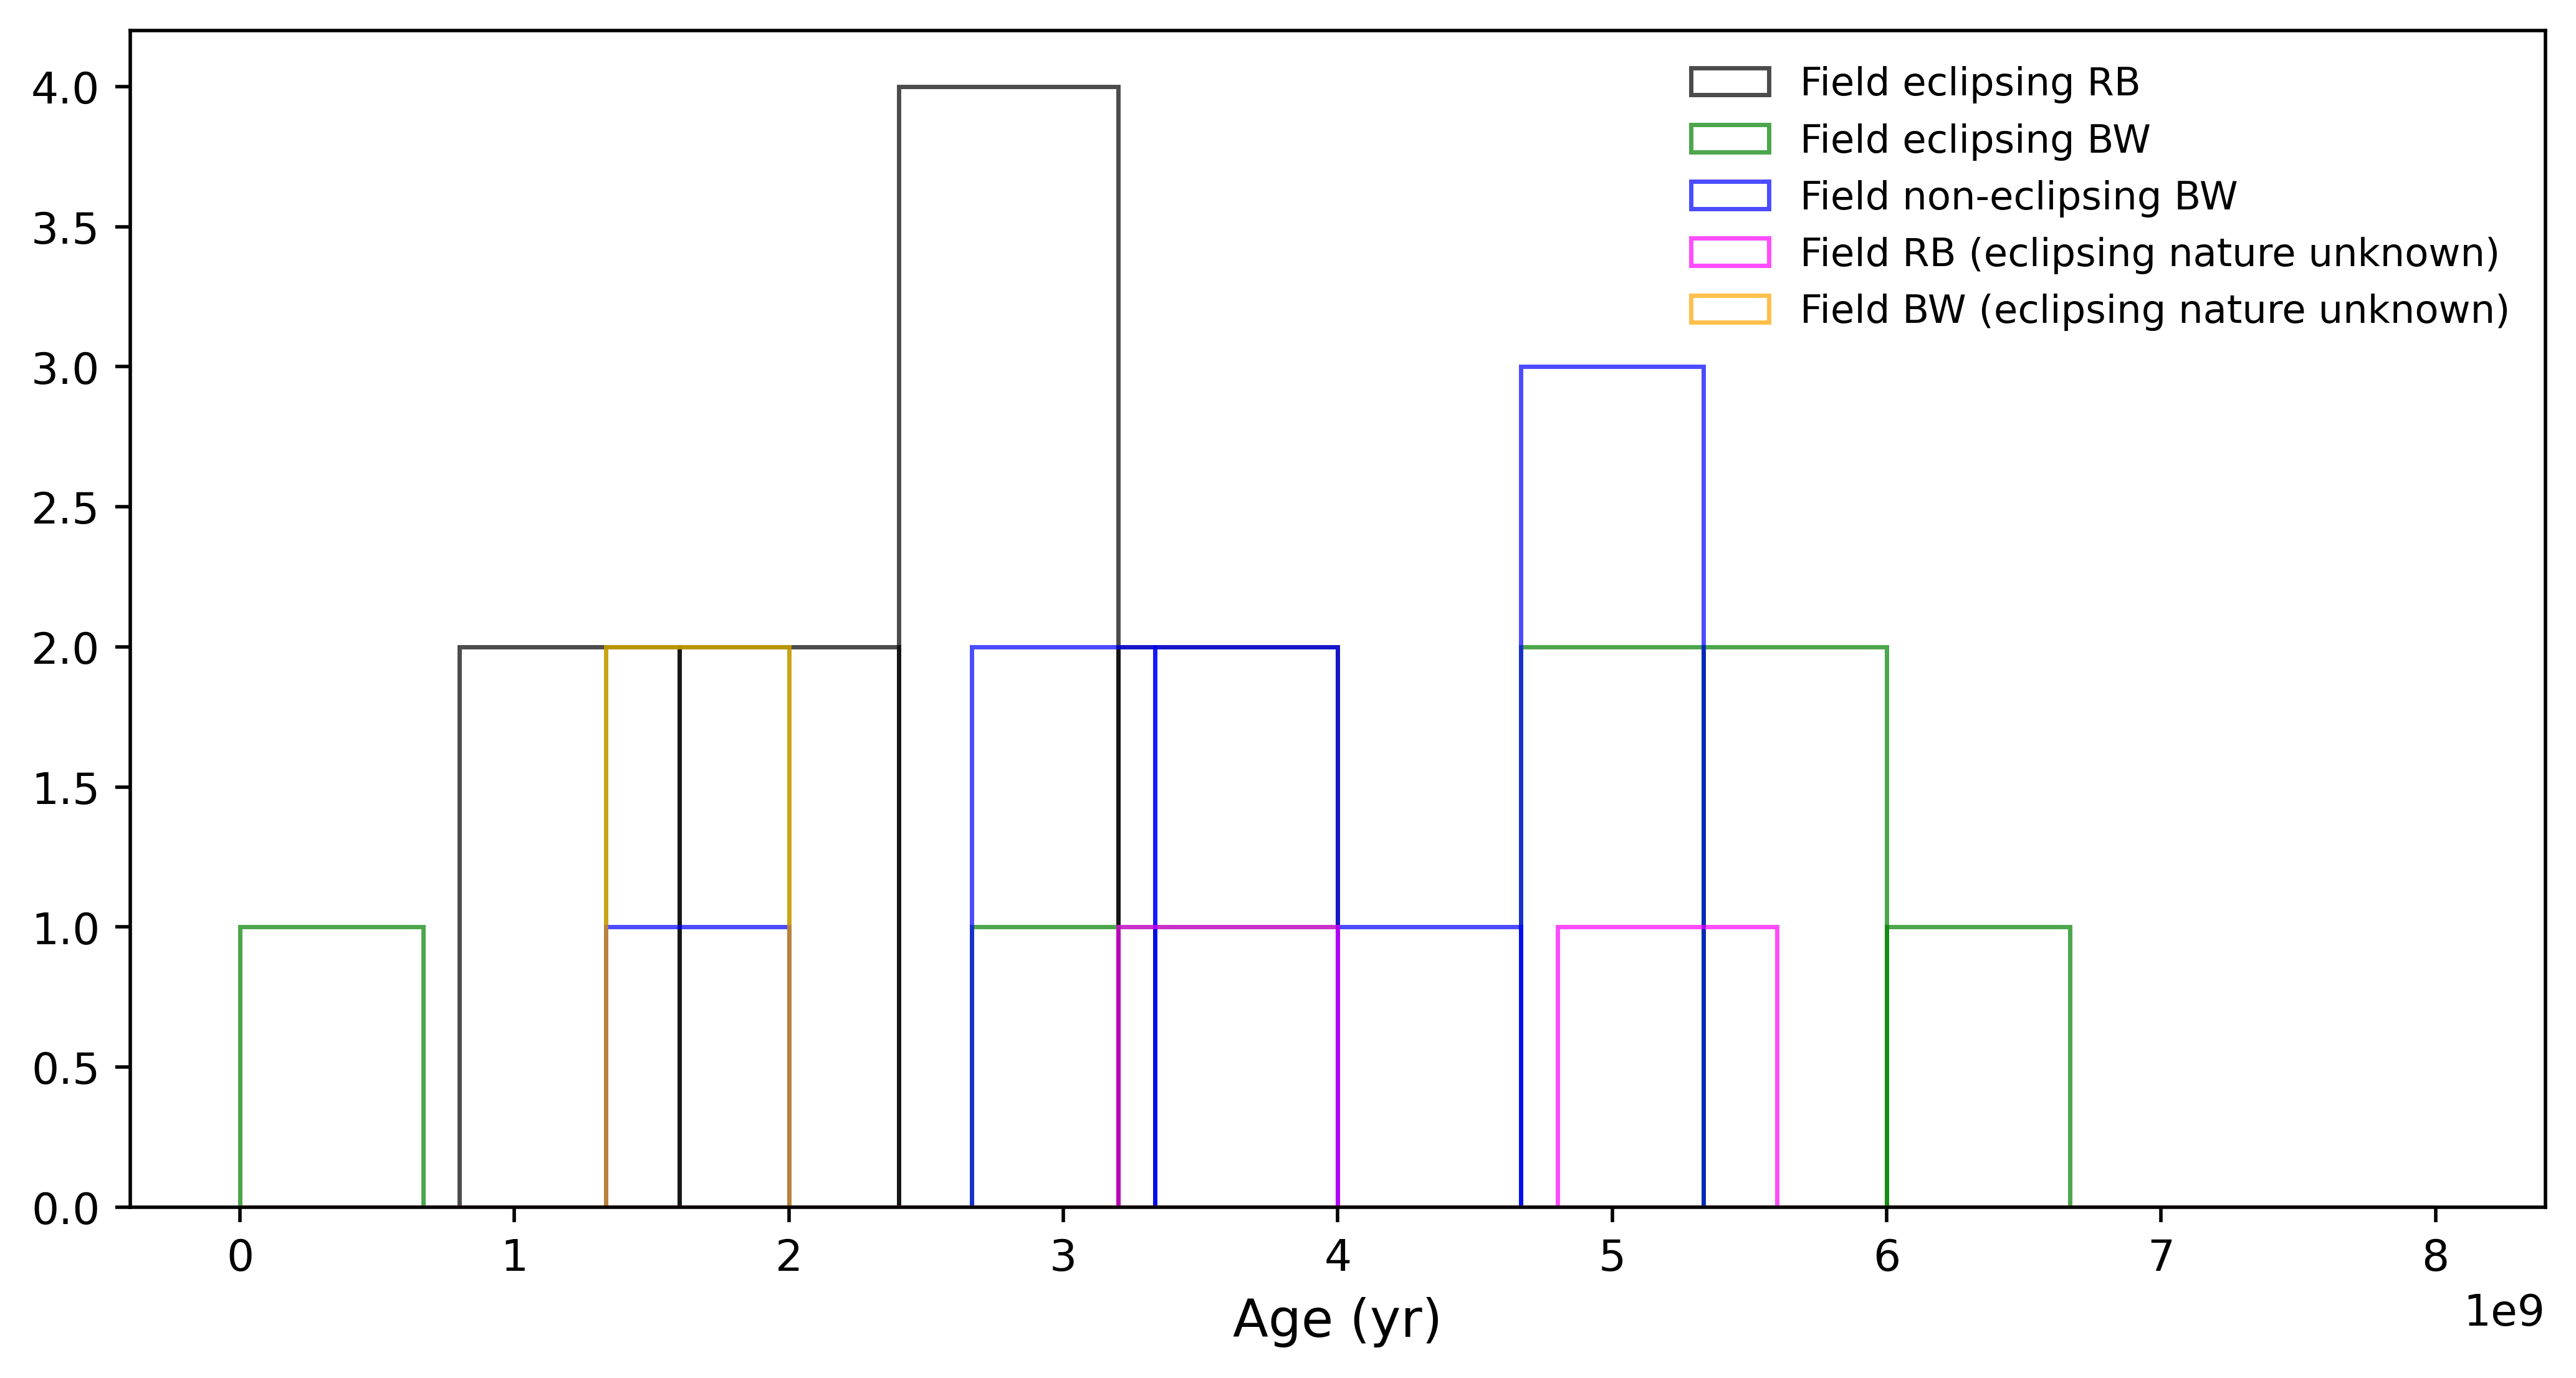

In [692]:
plt.figure(figsize=(10, 5), dpi=500)

plt.hist(x1, edgecolor='black',   fill=False, bins=10,   range=(0, 0.8e10), label='Field eclipsing RB', alpha=0.7)
plt.hist(x4, edgecolor='green',   fill=False, bins=12,   range=(0, 0.8e10), label='Field eclipsing BW', alpha=0.7)
plt.hist(x3, edgecolor='blue',    fill=False, bins=12,    range=(0, 0.8e10), label='Field non-eclipsing BW', alpha=0.7)
plt.hist(x2, edgecolor='magenta', fill=False, bins=10, range=(0, 0.8e10), label='Field RB (eclipsing nature unknown)', alpha=0.7)
plt.hist(x5, edgecolor='orange',  fill=False, bins=12,  range=(0, 0.8e10), label='Field BW (eclipsing nature unknown)', alpha=0.7)

plt.xlabel('Age (yr)', fontsize=12)
plt.legend(fontsize=9, frameon=False)
plt.show()


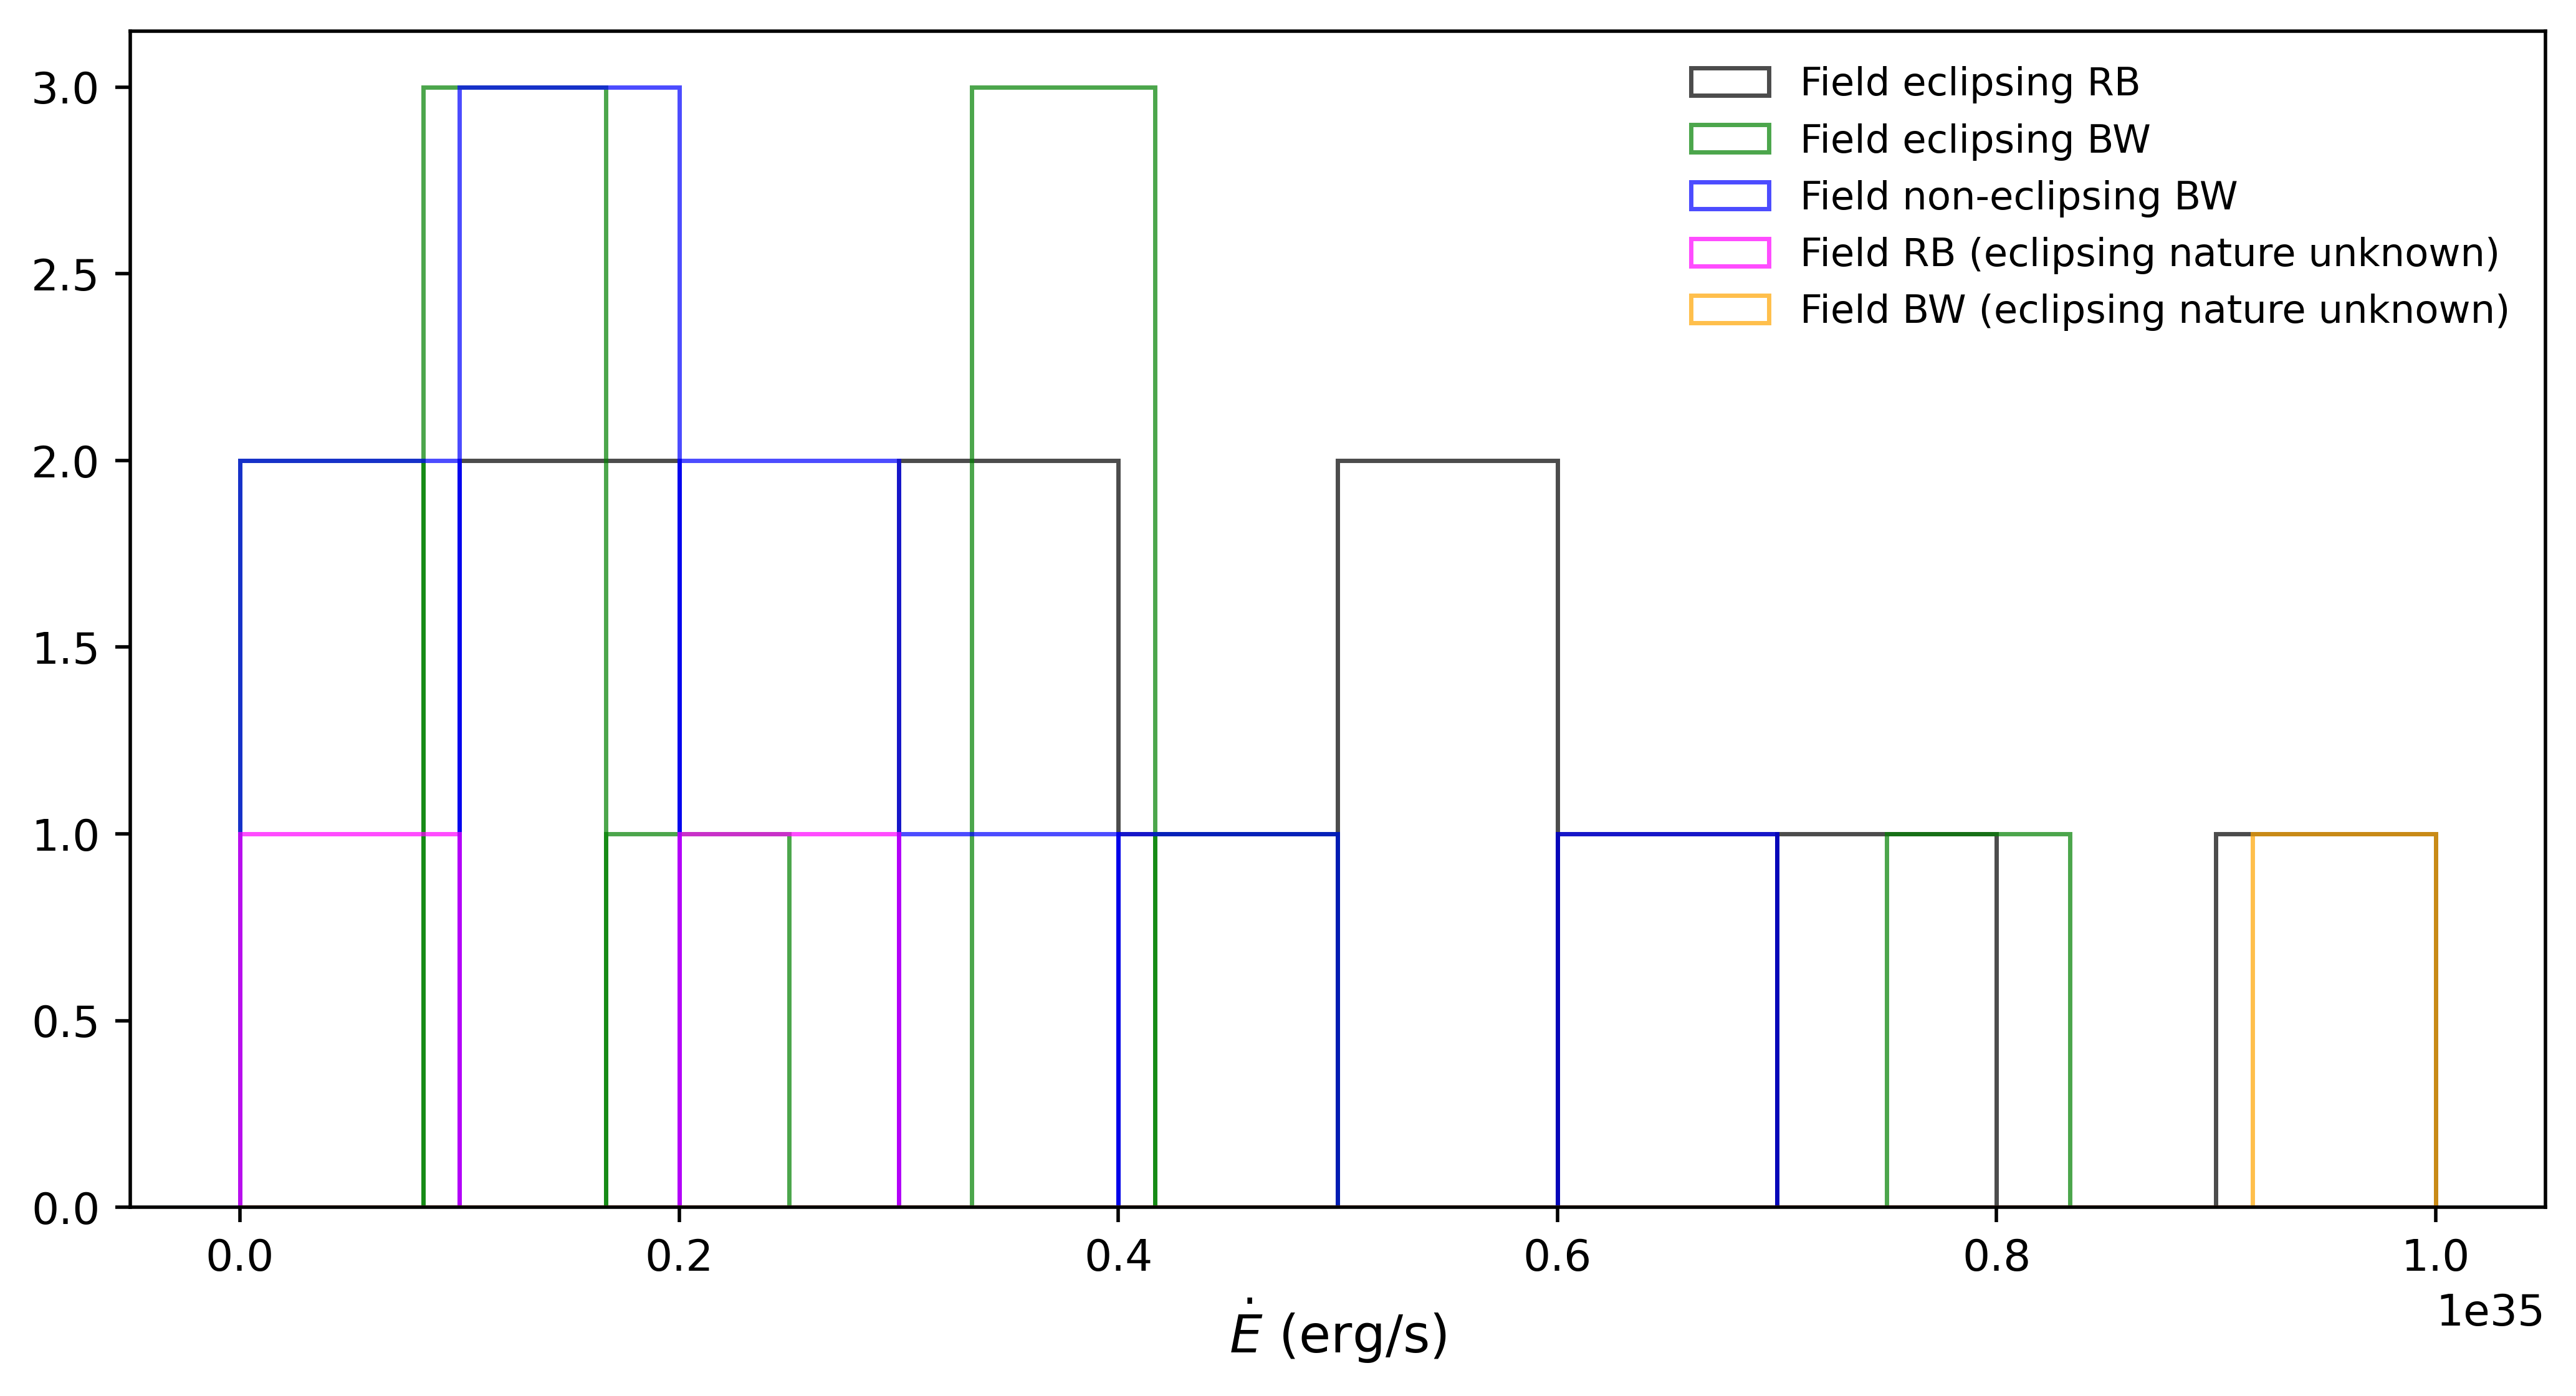

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=500)

# Adjusting bins with larger sizes
plt.hist(y1, edgecolor='black', fill=False, bins=10, range=(0, 1e35), label='Field eclipsing RB', alpha=0.7)
plt.hist(y4, edgecolor='green', fill=False, bins=12, range=(0, 1e35), label='Field eclipsing BW', alpha=0.7)
plt.hist(y3, edgecolor='blue', fill=False, bins=10, range=(0, 1e35), label='Field non-eclipsing BW', alpha=0.7)
plt.hist(y2, edgecolor='magenta', fill=False, bins=10, range=(0, 1e35), label='Field RB (eclipsing nature unknown)', alpha=0.7)
plt.hist(y5, edgecolor='orange', fill=False, bins=12, range=(0, 1e35), label='Field BW (eclipsing nature unknown)', alpha=0.7)

plt.xlabel(r'$\dot{E}$ (erg/s)', fontsize=12)
# plt.ylabel('Number of Pulsars', fontsize=12)
plt.legend(fontsize=9, frameon=False)
plt.show()


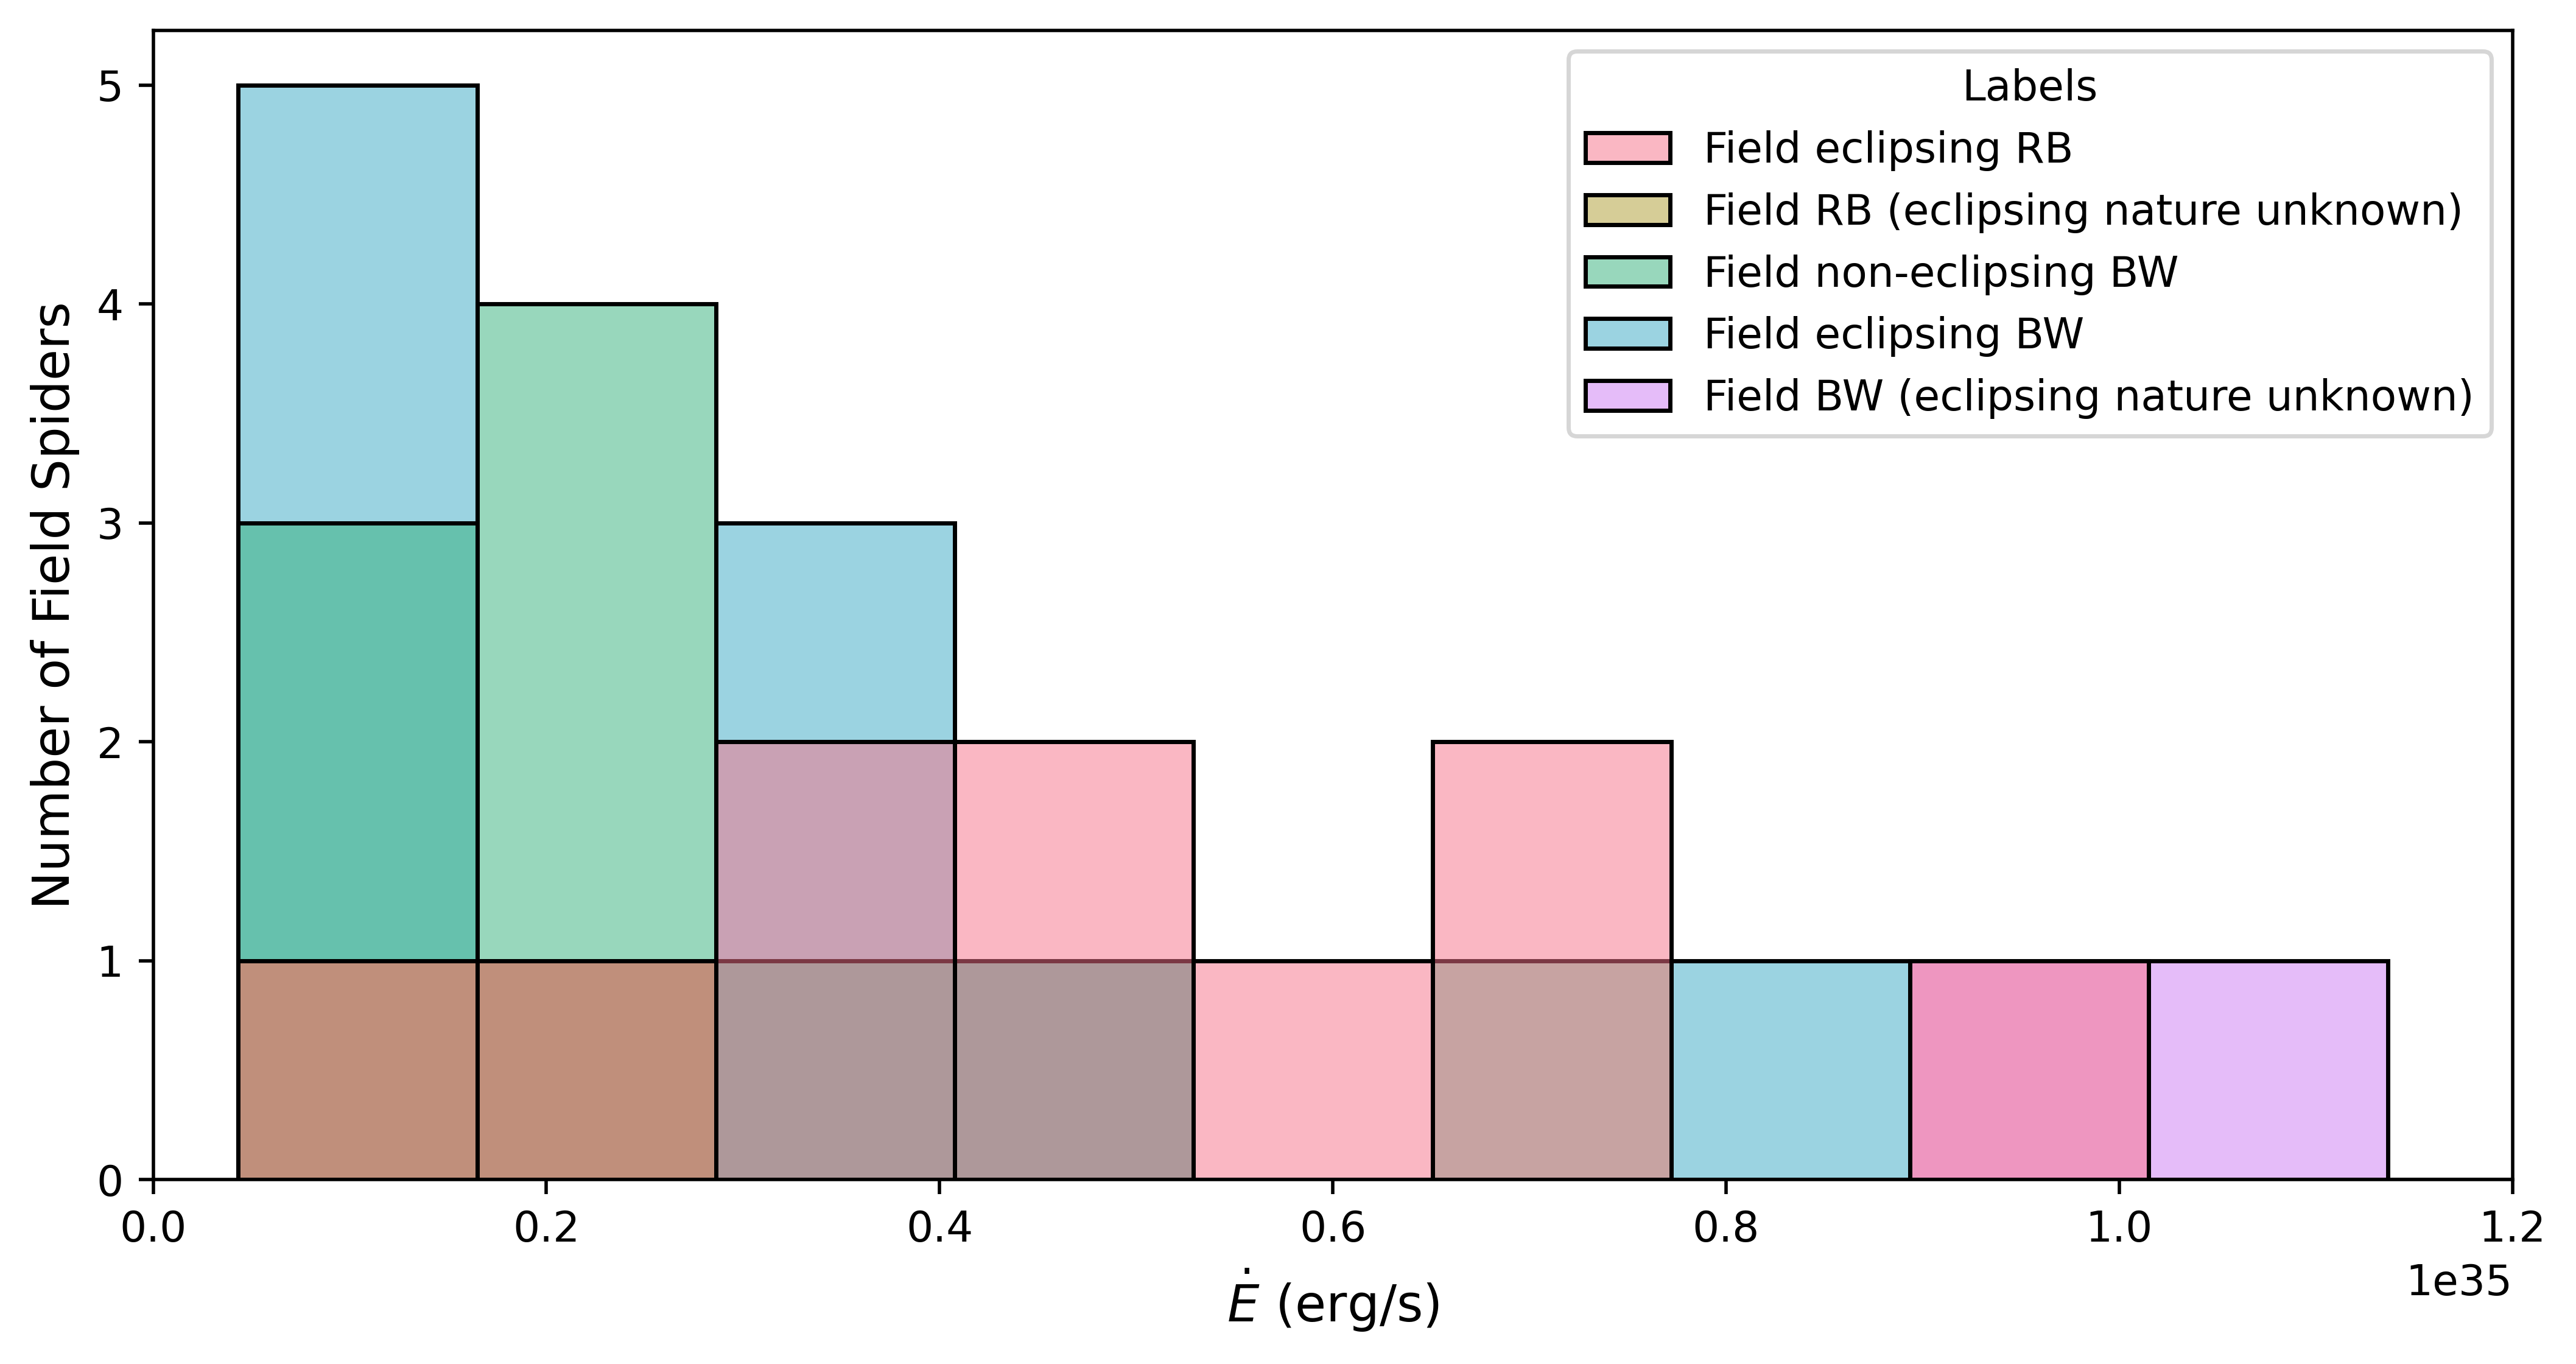

In [33]:
data = np.concatenate([y1, y2, y3, y4, y5])
labels = ['Field eclipsing RB'] * len(y1) + ['Field RB (eclipsing nature unknown)'] * len(y2) + ['Field non-eclipsing BW'] * len(y3) + ['Field eclipsing BW'] * len(y4) + ['Field BW (eclipsing nature unknown)'] * len(y5)


data_df = pd.DataFrame({'Values': data, 'Labels': labels})

plt.figure(figsize=(10, 5), dpi=500)
sns.histplot(data=data_df, x='Values', hue='Labels', bins=25, palette='husl', edgecolor='black', alpha=0.5, label='BW and RB')
plt.xlabel(r'$\dot{E}$ (erg/s)', fontsize=12)
plt.ylabel('Number of Field Spiders', fontsize=12)
plt.xlim(0, 1.2e35)
# plt.legend(fontsize=9, frameon=False)
plt.show()

## P Pdot Diagram

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd

df = pd.read_csv("D:\Black Widow Pulsars\Master's Thesis\P Pdot Sheet.csv")
dff = pd.DataFrame(df)
pd.set_option('display.max_rows', None)
dff

Name  Type        P           Pdot Assoc
0    J0024-7204W   eRB  0.002350 -8.660000e-20    GC
1    J1701-3006B   eRB  0.003590 -3.480000e-19    GC
2    J1717+4308A   eRB  0.003160  6.110000e-20    GC
3    J1740-5340A   eRB  0.003650  1.680000e-19    GC
4    J1740-5340B   eRB  0.005787 -5.930000e-21    GC
5    J1748-2021D   eRB  0.013500  5.870000e-19    GC
6    J1748-2446A   eRB  0.011563 -3.400000e-20    GC
7   J1748-2446ad   eRB  0.001396  0.000000e+00    GC
8    J2140-2310A   eRB  0.011000 -5.180000e-20    GC
9    J0024-7204O   eBW  0.002640  3.030000e-20    GC
10   J0024-7204R   eBW  0.003480  1.480000e-19    GC
11   J1326-4728B   eBW  0.004790  2.760000e-20    GC
12   J1518+0204C   eBW  0.002480  2.610000e-20    GC
13   J1641+3627E   eBW  0.002490  1.740000e-20    GC
14   J1701-3006E   eBW  0.003230  3.100000e-19    GC
15   J1701-3006F   eBW  0.002300  2.220000e-19    GC
16   J1737-0314A   eBW  0.001980  9.560000e-20    GC
17   J1824-2452M   eBW  0.004780  1.230000e-19    GC
18   J1824-2452N   eBW  0.003350  1.590000e-19    GC
19   J1836-2354A   eBW  0.003354  2.320000e-21    GC
20   J1853-0842A   eBW  0.002150 -2.390000e-21    GC
21   J0024-7204P  neBW  0.003640  6.640000e-19    GC
22   J1807-2459A  neBW  0.003059 -4.340000e-21    GC
23   J0024-7204I    BW  0.003490 -4.590000e-20    GC
24    J1023+0038   eRB  0.001690  6.930000e-21   GRS
25    J1048+2339   eRB  0.004670  3.010000e-20   GRS
26    J1227-4853   eRB  0.001690  1.110000e-20   GRS
27    J1431-4715   eRB  0.002010  1.410000e-20   GRS
28    J1628-3205   eRB  0.003210  1.200000e-20   GRS
29    J1723-2837   eRB  0.001860  7.540000e-21   GRS
30    J1803-6707   eRB  0.002135  1.850000e-20   GRS
31    J1816+4510   eRB  0.003190  4.310000e-20   GRS
32    J1908+2105   eRB  0.002560  1.380000e-20   GRS
33    J1957+2516   eRB  0.003960  2.740000e-20   GRS
34    J2039-5617   eRB  0.002650  1.420000e-20   GRS
35    J2215+5135   eRB  0.002610  3.340000e-20   GRS
36    J1622-0315    RB  0.003850  1.140000e-20   GRS
37    J2339-0533    RB  0.002884  1.410000e-20   GRS
38    J0251+2606   eBW  0.002542  7.570000e-21   GRS
39    J1124-3653   eBW  0.002410  6.010000e-21   GRS
40    J1301+0833   eBW  0.001840  1.060000e-20   GRS
41    J1544+4937   eBW  0.002160  2.930000e-21   GRS
42    J1555-2908   eBW  0.001790  4.450000e-20   GRS
43    J1641+8049   eBW  0.002020  8.950000e-21   GRS
44    J1653-0158   eBW  0.001970  2.400000e-21   GRS
45    J1731-1847   eBW  0.002345  2.540000e-20   GRS
46    J1810+1744   eBW  0.001660  4.600000e-21   GRS
47    J1959+2048   eBW  0.001610  1.690000e-20   GRS
48    J2051-0827   eBW  0.004510  1.270000e-20   GRS
49    J2052+1219   eBW  0.001990  6.700000e-21   GRS
50    J2055+3829   eBW  0.002089  1.000000e-21   GRS
51    J2256-1024   eBW  0.002295  1.140000e-20   GRS
52    J0023+0923  neBW  0.003050  1.140000e-20   GRS
53    J0610-2100  neBW  0.003860  1.230000e-20   GRS
54    J0952-0607  neBW  0.001414  4.770000e-21   GRS
55    J1311-3430  neBW  0.002560  2.100000e-20   GRS
56    J1446-4701  neBW  0.002200  9.810000e-21   GRS
57    J1745+1017  neBW  0.002650  2.730000e-21   GRS
58    J1928+1245  neBW  0.003022  1.680000e-20   GRS
59    J2214+3000  neBW  0.003120  1.470000e-20   GRS
60    J2234+0944  neBW  0.003630  2.010000e-20   GRS
61    J2241-5236  neBW  0.002190  6.900000e-21   GRS
62    J1805+0615    BW  0.002130  2.280000e-20   GRS
63    J1833-3840    BW  0.001870  1.770000e-20   GRS

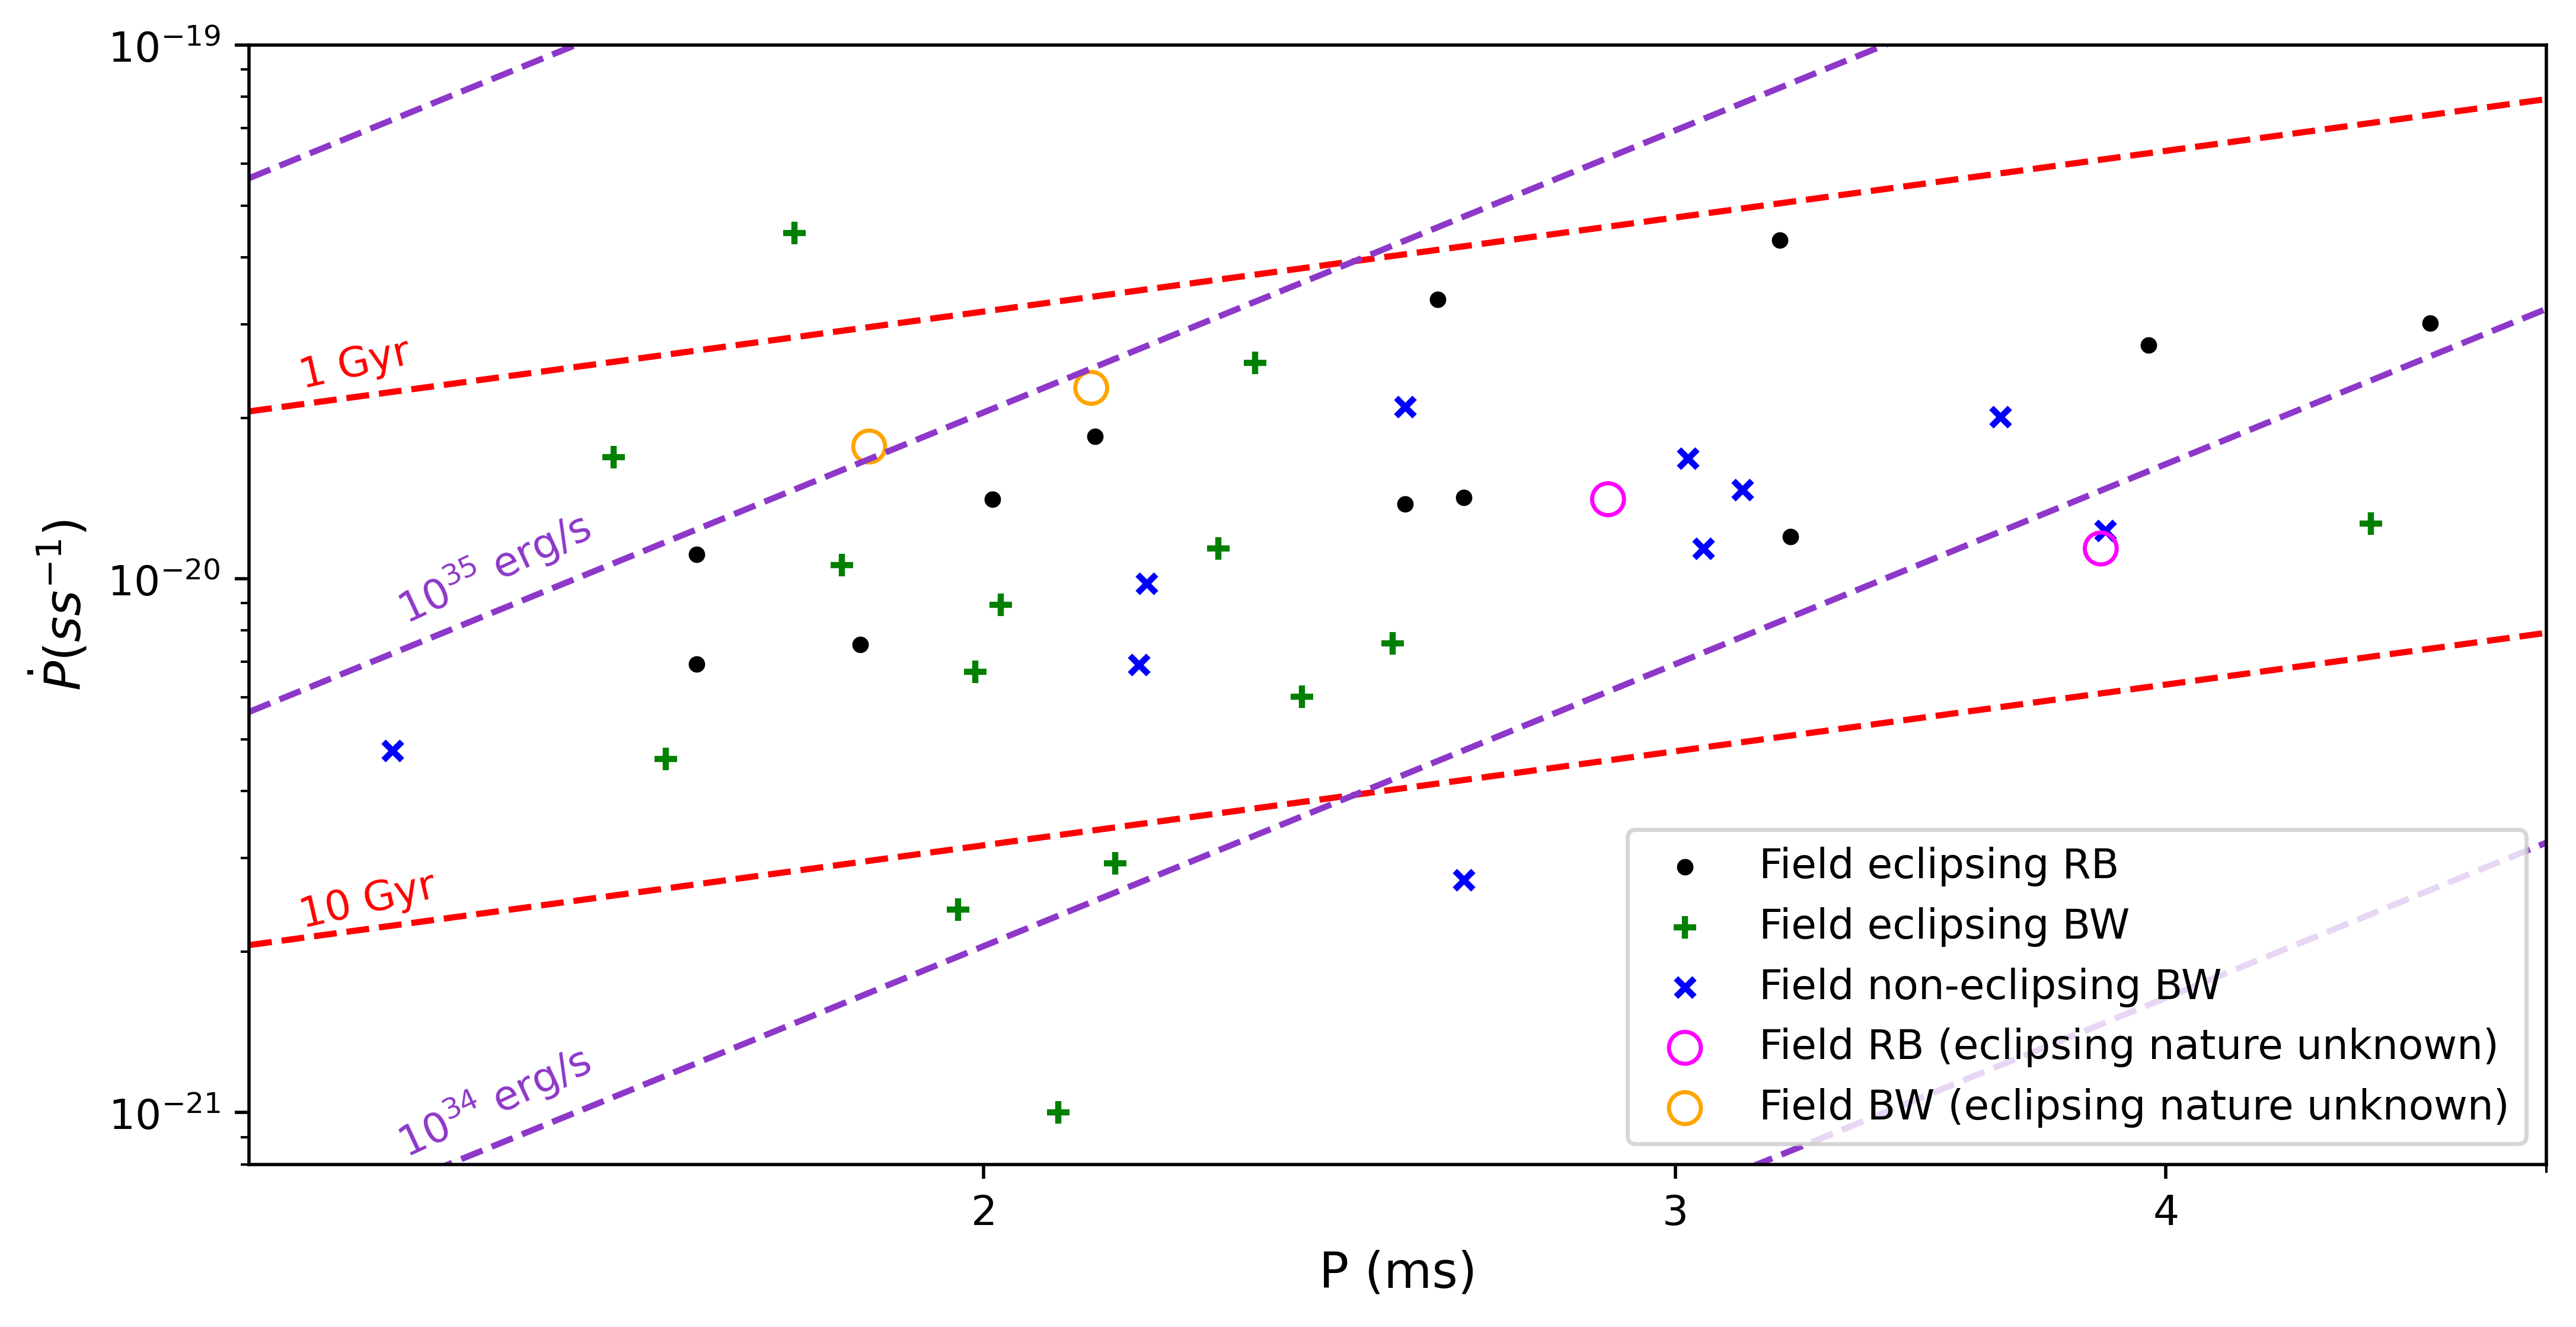

In [14]:
xmin = 1.3e-3
xmax = 5e-3
ymin = 8e-22
ymax = 1e-19

def plot_background(flag_landscape=False, flag_text=True):
    fig, ax = plt.subplots(figsize=(10, 5), dpi=500)
    
    p1 = np.array(dff.iloc[24:36,2]) # >>>>>>> Field eRB >>>> 12
    pdot1 = np.array(dff.iloc[24:36,3])

    p2 = np.array(dff.iloc[38:52,2]) # >>>>>>> Field eBW >>> 14
    pdot2 = np.array(dff.iloc[38:52,3])

    p3 = np.array(dff.iloc[52:62,2]) # >>>>>>> Field neBW >> 10
    pdot3 = np.array(dff.iloc[52:62,3])

    p4 = np.array(dff.iloc[36:38,2]) # >>>>>>> Field RB >>>> 2
    pdot4 = np.array(dff.iloc[36:38,3])

    p5 = np.array(dff.iloc[62:64,2]) # >>>>>>> Field BW >>>> 2
    pdot5 = np.array(dff.iloc[62:64,3])


    plt.scatter(p1, pdot1, marker='.', color='black', label='Field eclipsing RB')
    plt.scatter(p2, pdot2, marker='+', edgecolors='none', color='green', label='Field eclipsing BW', s=30)
    plt.scatter(p3, pdot3, marker='x', edgecolors='none', color='blue', label='Field non-eclipsing BW', s=20)
    plt.scatter(p4, pdot4, facecolors='none', edgecolors='magenta', s=60, label='Field RB (eclipsing nature unknown)')
    plt.scatter(p5, pdot5, facecolors='none', edgecolors='orange', s=60, label='Field BW (eclipsing nature unknown)')

    
    for age in [1e+9, 1e+10]:  
        x = np.logspace(np.log10(xmin), np.log10(xmax))
        y = 0.5 * x / (age * 365.25 * 24. * 60.0 ** 2)
        plt.plot(x, y, linestyle="--", c="red")
        
        label = f'{int(age / 1e9)} Gyr'
        plt.text(x[-49], y[-40], label, ha='left', va='center_baseline', color='red', rotation=13)
        
        
    for i, Edot in enumerate([1e+33, 1e+34, 1e+35, 1e+36]):
        x = np.logspace(np.log10(xmin), np.log10(xmax))
        y = (Edot / 3.9e+35) * x ** 3.0 * 1e-11
        plt.plot(x, y, linestyle="--", c="#8D38C9")
        
        if i > 0 and i < 3:
            label = r'$10^{%d}$ erg/s' % np.log10(Edot)
            plt.text(x[-47], y[-40], label, ha='left', va='center_baseline', color="#8D38C9", rotation=25)


    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([2e-3, 3e-3, 4e-3])
#     ax.set_xticks([1.5e-3, 2.5e-3, 3.5e-3, 4.5e-3], minor=True)
    ax.set_xticklabels(['2', '3', '4'])
    ax.set_xlabel('P (ms)', fontsize=12)
    ax.set_ylabel(r'$\dot{P } (ss^{-1})$', fontsize=12)
    ax.legend(loc='lower right')

    return fig, ax

fig, ax = plot_background()
plt.show()
